# Problem Statement

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()
os.chdir("C:/Users/AKHIL MOHANDAS/Documents/Study_Material/FORECASTING")

###### Read the Data

In [3]:
df = pd.read_csv('rose.csv')

###### Data Types

In [4]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

*YearMonth column is not seen as a date object*

In [5]:
df= pd.read_csv('rose.csv', parse_dates = ['YearMonth'],index_col = 'YearMonth')

In [6]:
df.dtypes

Rose    float64
dtype: object

*Now the time series reference is approprately identified.*

###### Top 5 Rows

In [7]:
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

###### Bottom 5 Rows

In [8]:
df.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

### Shape of the data

In [9]:
df.shape

(187, 1)

### Basic Info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


#### Description of data

In [11]:
round(df.describe(),3)

Rose
count  185.000
mean    90.395
std     39.175
min     28.000
25%     63.000
50%     86.000
75%    112.000
max    267.000

### EDA

#### Plot the Time Series

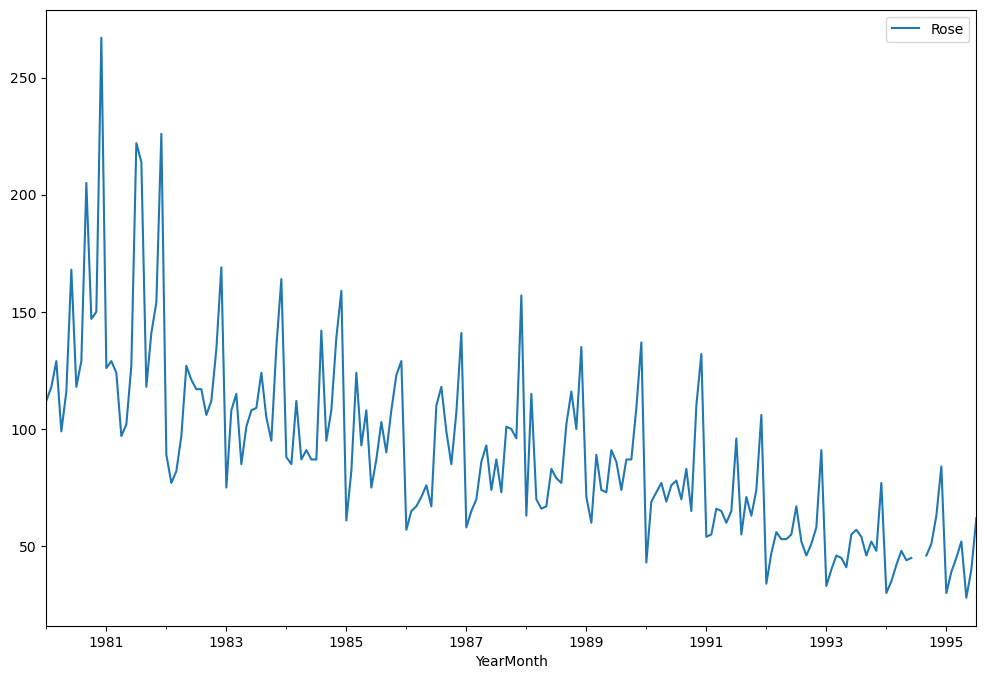

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

*We see an decreasing trend and seasonality which is not constant in nature.*

###### Yearly Boxplot

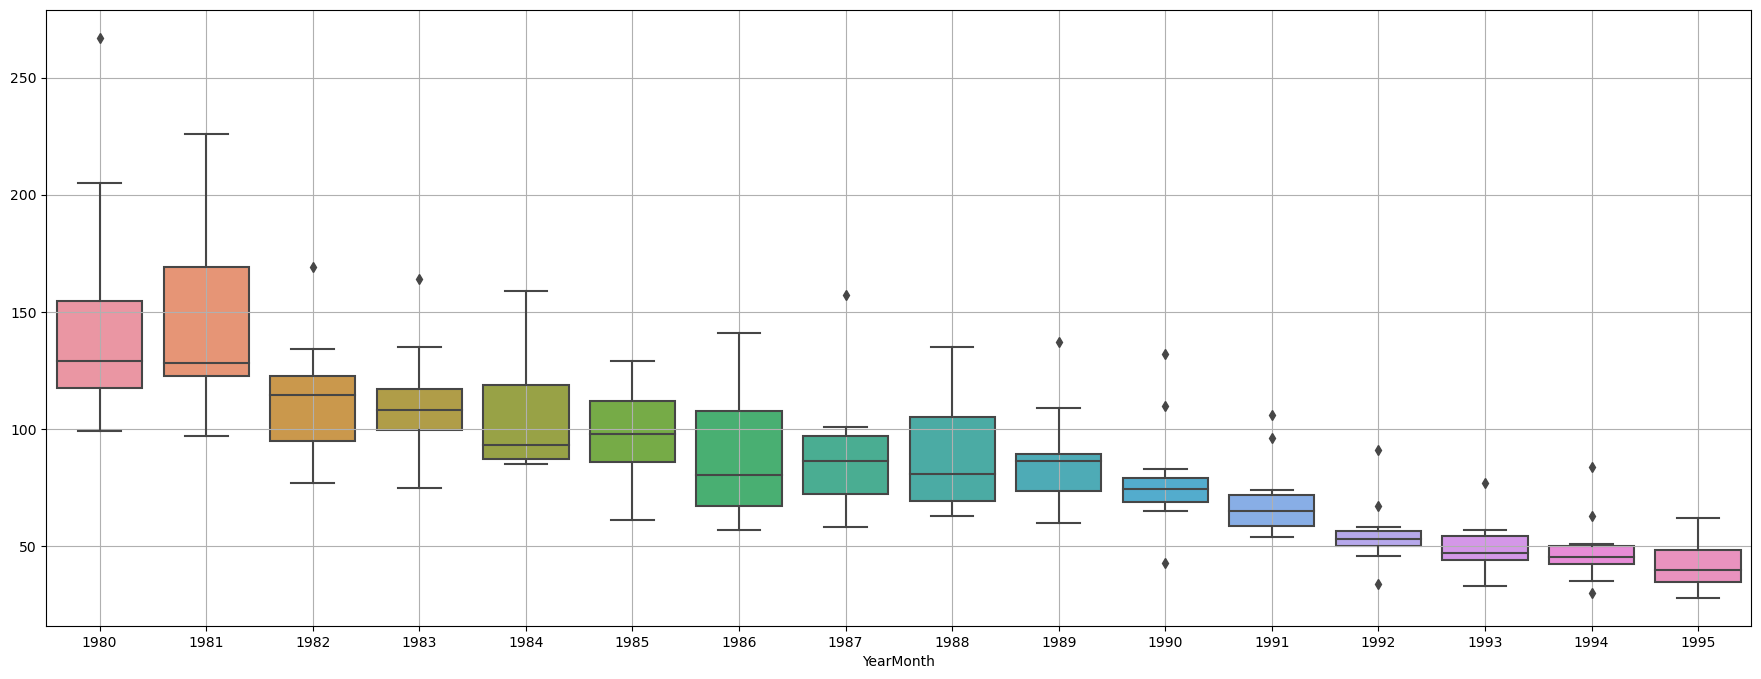

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

###### Monthly Boxplot

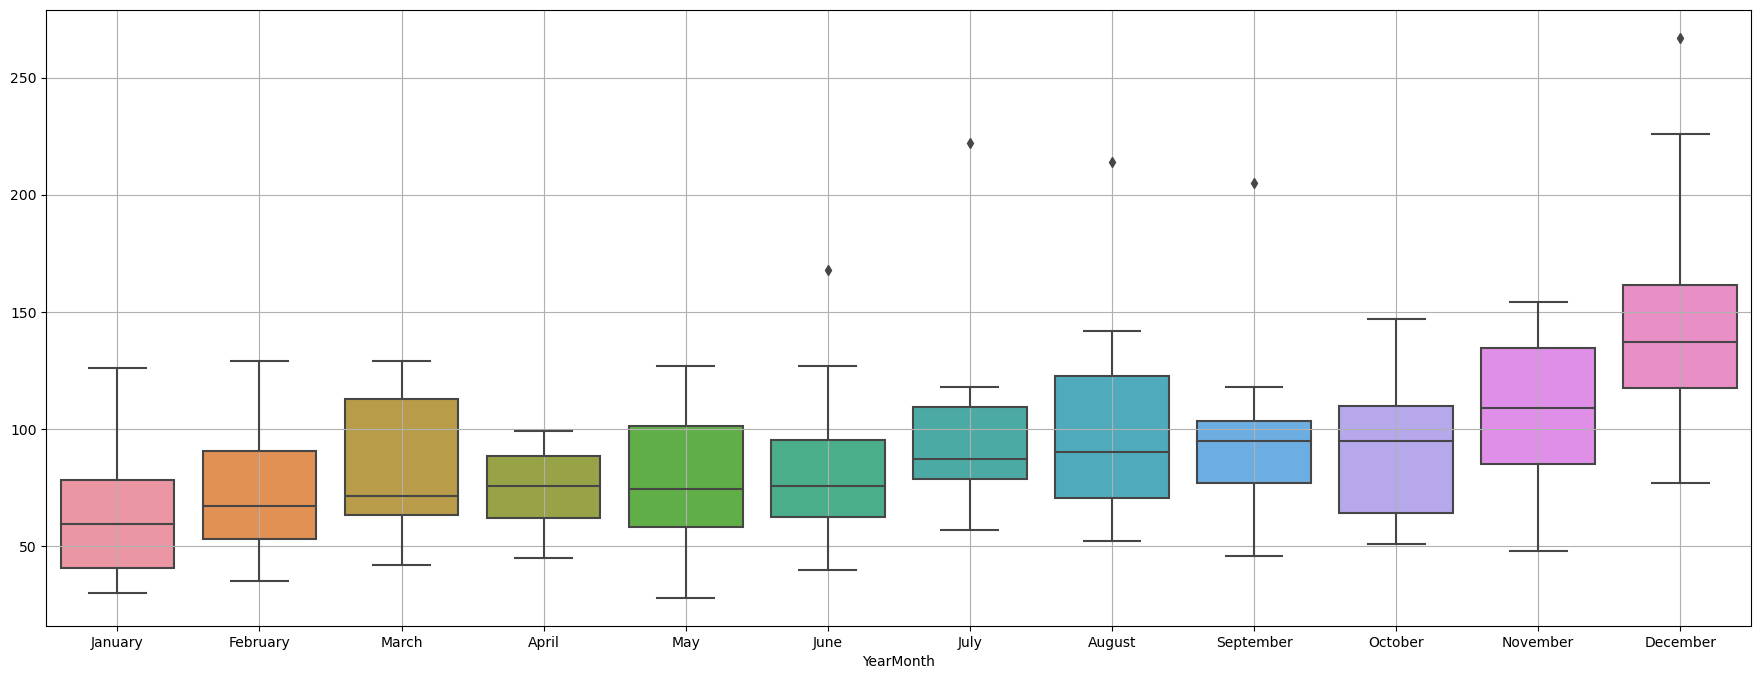

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

*Maximum sales in the month of December*

*The sales seems to usually pick in the last 4 months*

*Average order is greater in december and lowest in january*

###### Monthly Boxplot

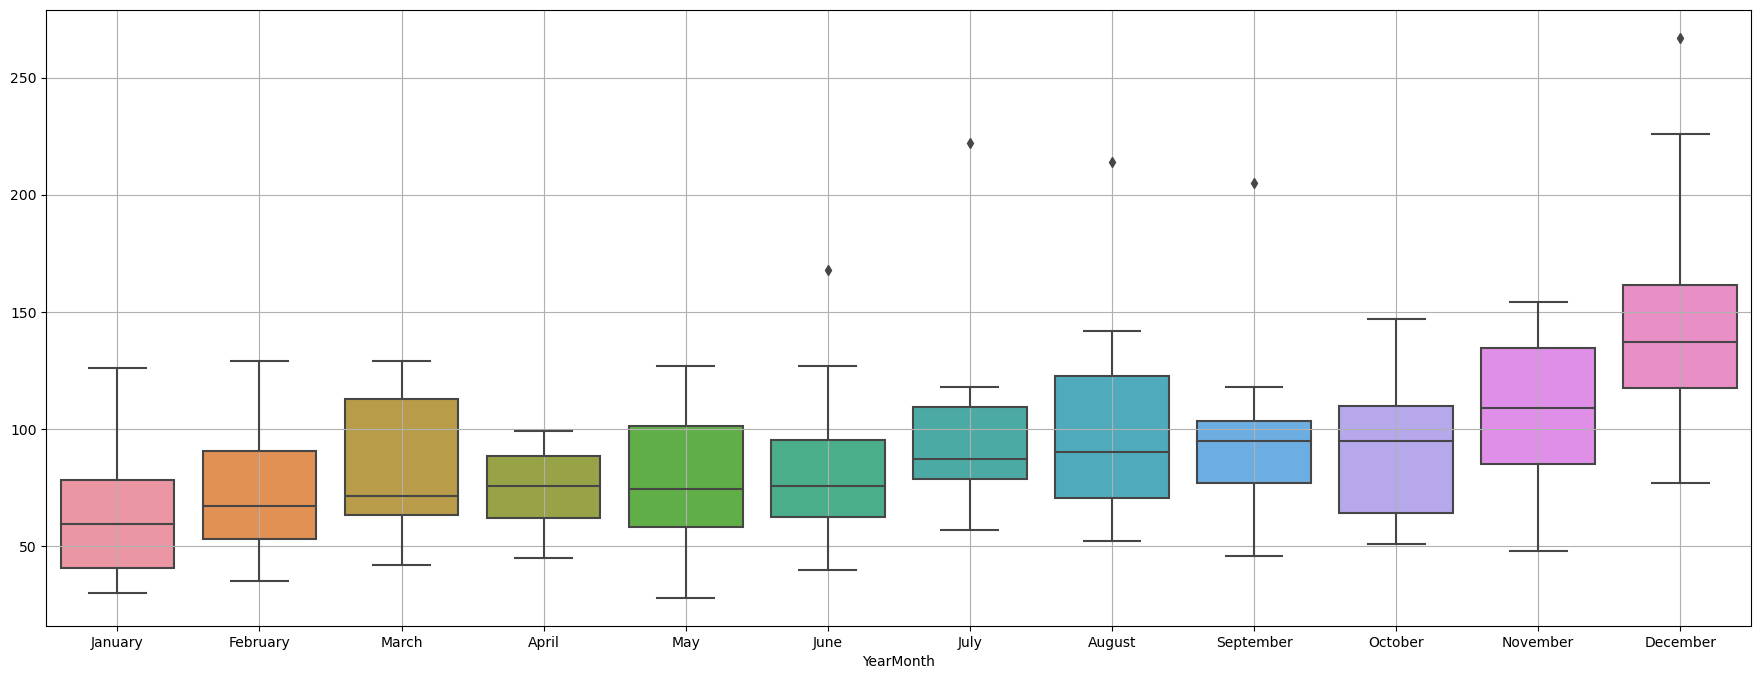

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

*Maximum sales in the month of December*

*The sales seems to usually pick in the last 4 months*

*Average order is greater in december and lowest in january*

###### Monthly sales across years.

In [16]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981        97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982        97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983        85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984        87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985        93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986        71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987        86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988        66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989        74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990        77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991        65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992        53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993        45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994        48.0     NaN      84.0      35.0     30.0    NaN   45.0   42.0   
1995        52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980       116.0     150.0    147.0      205.0  
1981       102.0     154.0    141.0      118.0  
1982       127.0     134.0    112.0      106.0  
1983       101.0     135.0     95.0      105.0  
1984        91.0     139.0    108.0       95.0  
1985       108.0     123.0    108.0       90.0  
1986        76.0     107.0     85.0       99.0  
1987        93.0      96.0    100.0      101.0  
1988        67.0     100.0    116.0      102.0  
1989        73.0     109.0     87.0       87.0  
1990        69.0     110.0     65.0       83.0  
1991        60.0      74.0     63.0       71.0  
1992        53.0      58.0     51.0       46.0  
1993        41.0      48.0     52.0       46.0  
1994        44.0      63.0     51.0       46.0  
1995        28.0       NaN      NaN        NaN

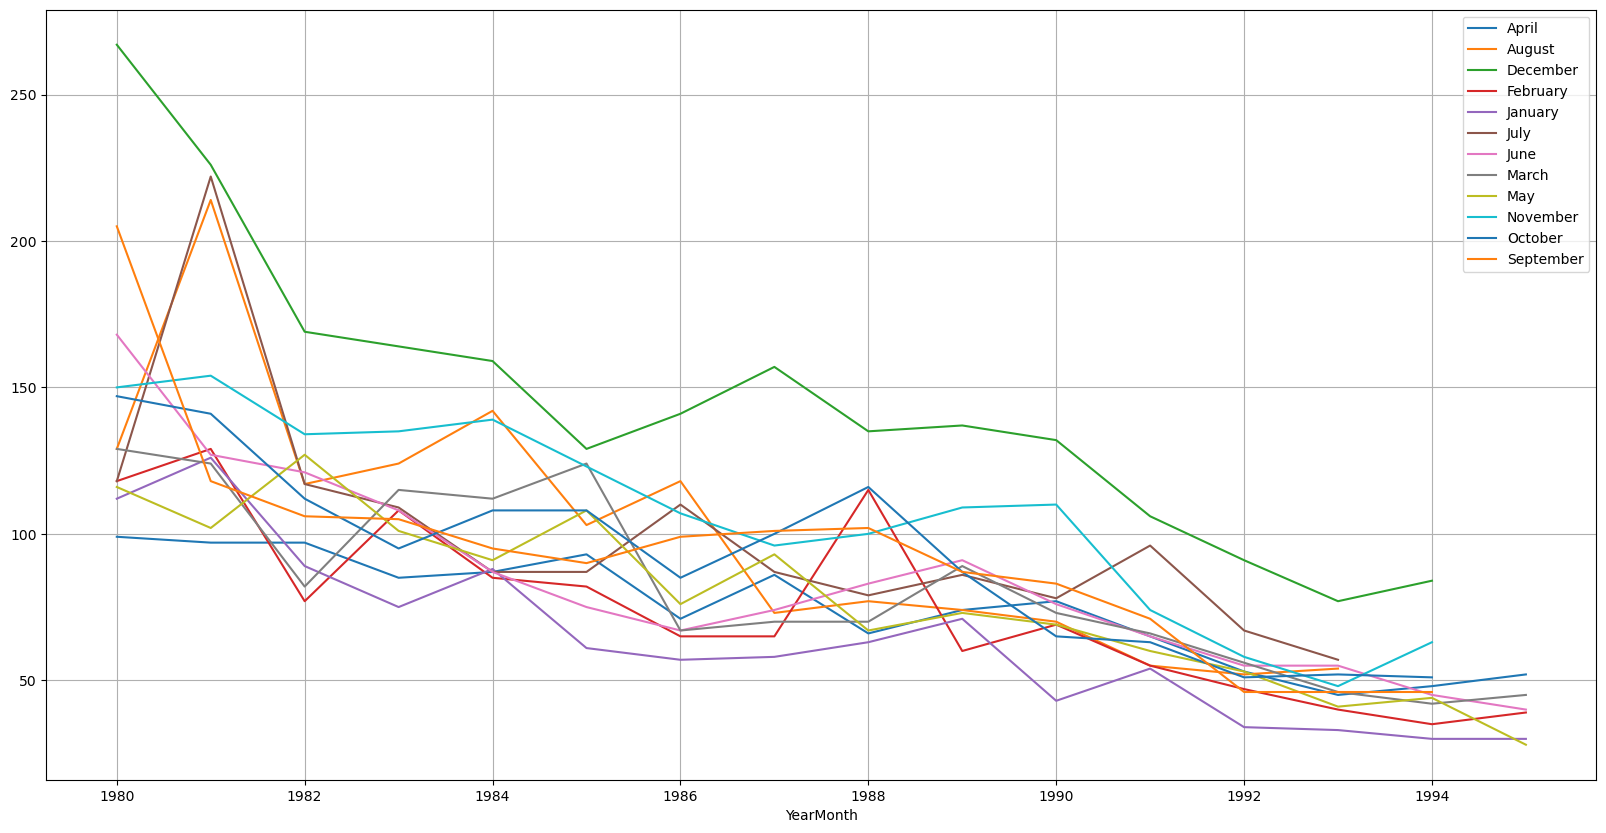

In [17]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

*December consistently shows high sales in most years, indicating it may be a peak season due to holidays or festivities*

*February consistently shows lower sales, likely due to seasonal or market factors.*

*December consistently outperforms other months, suggesting it is a key period for marketing efforts.*

*Months like January, February, and March exhibit relatively low sales across all years.*

*The decline in sales is uniform across all months, suggesting no single month has drastically diverging trends.*

*The sharp drop in sales from the 1980s to the 1990s suggests underlying challenges, such as reduced demand, competition, or economic factors. Investigating external market conditions or changes in company operations during this period might help.*

###### Annual Sales

In [18]:
df_year = df.resample('A').sum()
df_year

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0
1985-12-31  1183.0
1986-12-31  1063.0
1987-12-31  1060.0
1988-12-31  1073.0
1989-12-31  1038.0
1990-12-31   945.0
1991-12-31   830.0
1992-12-31   663.0
1993-12-31   594.0
1994-12-31   488.0
1995-12-31   296.0

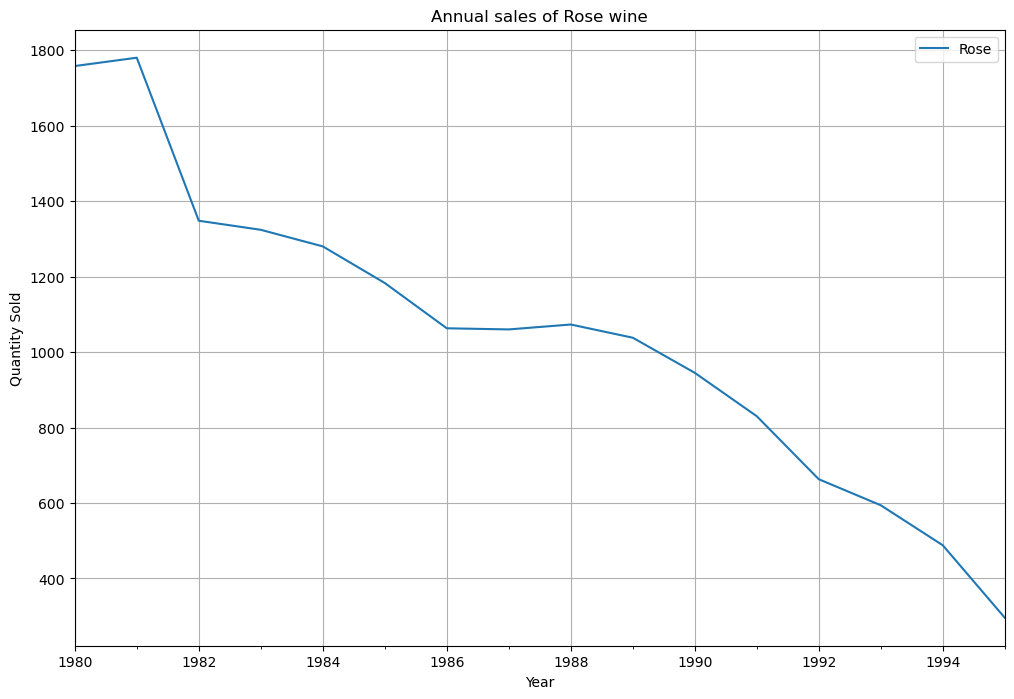

In [19]:
df_year.plot();
plt.grid()
plt.title('Annual sales of Rose wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

*There is a consistent decline in annual sales from 1980 to 1995.*

*Sales dropped from 1758 units in 1980 to just 296 units in 1995, representing an 83% decline over 15 years.*

*The sharpest declines occurred in the early 1990s,this indicates that the early 1990s might have been particularly challenging for Rose wine sales, possibly due to market shifts or economic factors.*

*Increased competition from other wine varieties or beverages could have impacted sales.Economic recessions or shifts in consumer spending habits during the early 1990s may have influenced the drop.*

###### Quarter Sales

In [20]:
df_quarter = df.resample('Q').sum()
df_quarter.head(10)

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0
1981-06-30  326.0
1981-09-30  554.0
1981-12-31  521.0
1982-03-31  248.0
1982-06-30  345.0

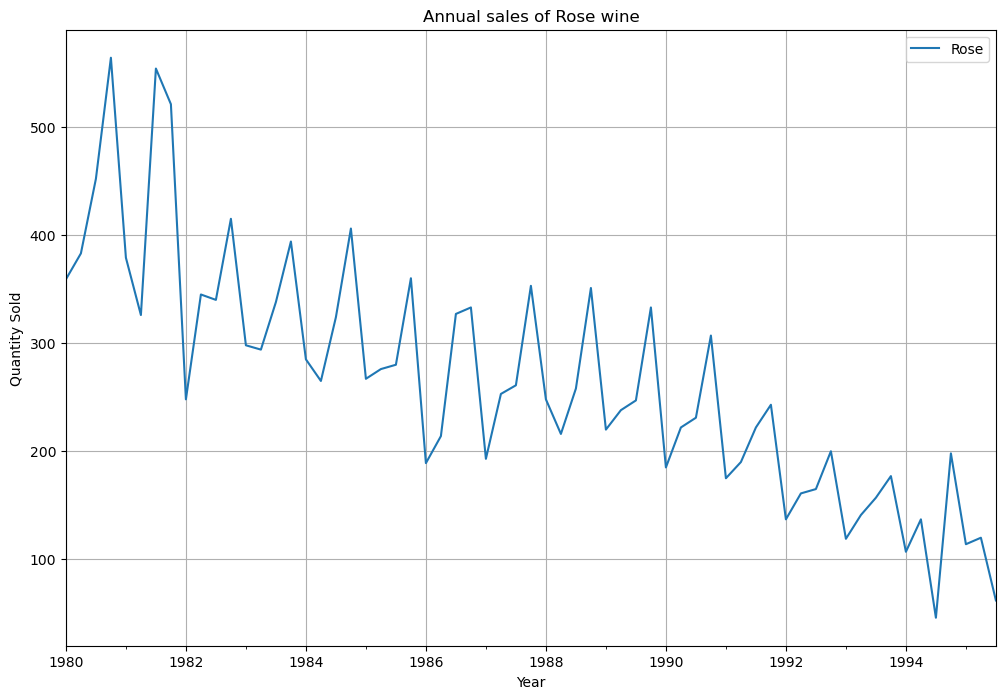

In [21]:
df_quarter.plot();
plt.grid()
plt.title('Annual sales of Rose wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

*Q4 (October-December) consistently shows the highest sales in the year*

*Q2 (April-June) and Q1 (January-March) show comparatively lower sales, indicating these are weaker periods for Rose wine sales*

*Q2 (April-June) and Q1 (January-March) show comparatively lower sales, indicating these are weaker periods for Rose wine sales*


#### Seasonal Patterns

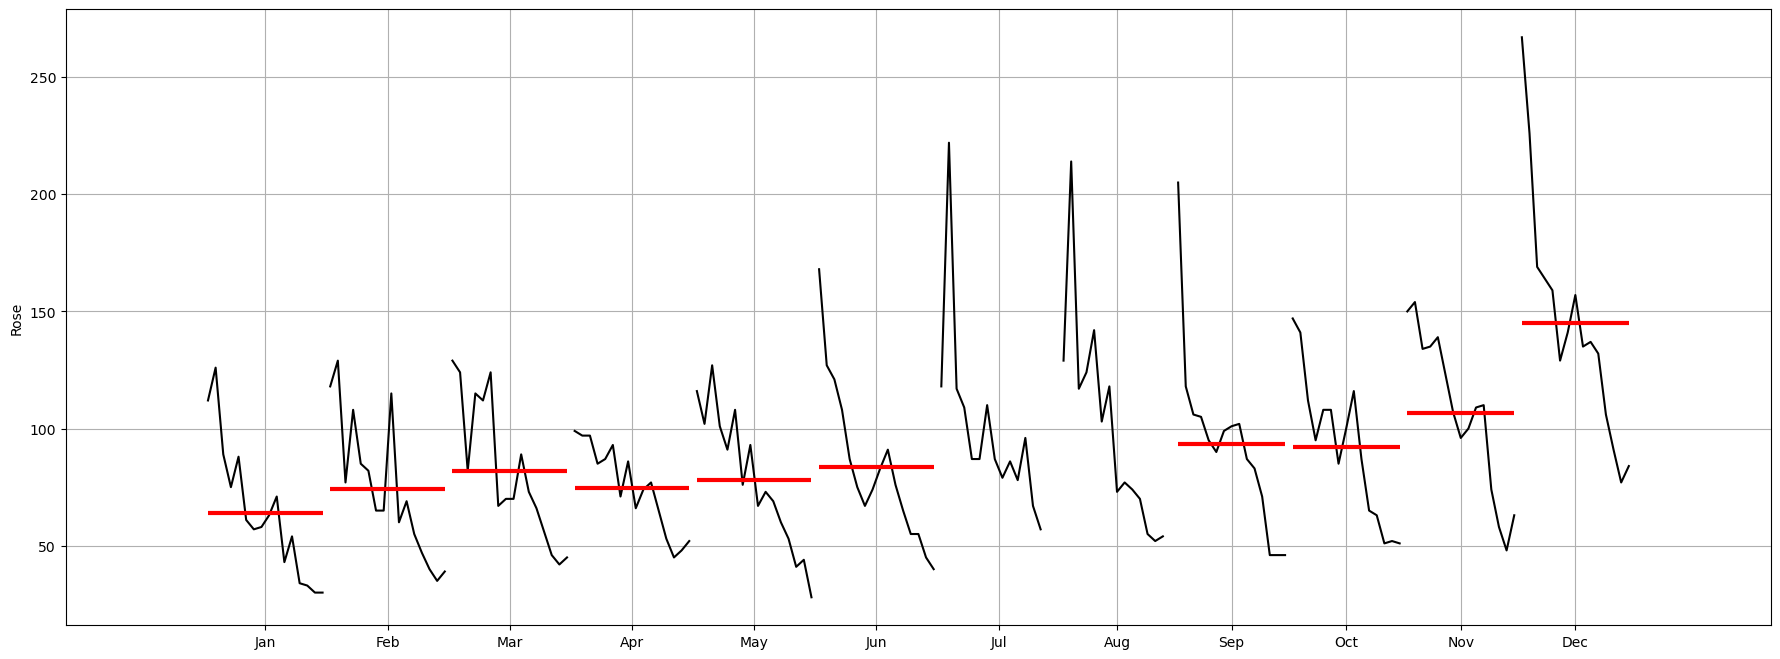

In [22]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Rose',ax=ax)
plt.grid();

## Missing values

In [23]:
df.isnull().sum()

Rose    2
dtype: int64

*two rows have null value for Rose wine sold, the data is missing and we have to treat this*

In [24]:
df[df.isnull().values]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [25]:
df.converted = df.Rose
temp = df.converted.resample('D').mean()
df.Rose = round(temp.interpolate(methods='linear'),2)
df.Rose['1994']

YearMonth
1994-01-01    30.00
1994-02-01    35.00
1994-03-01    42.00
1994-04-01    48.00
1994-05-01    44.00
1994-06-01    45.00
1994-07-01    45.33
1994-08-01    45.66
1994-09-01    46.00
1994-10-01    51.00
1994-11-01    63.00
1994-12-01    84.00
Name: Rose, dtype: float64

In [26]:
df.isnull().sum()

Rose    0
dtype: int64

*The missing values for the months of July and August have been imputed with linear interpolation*

*The provided code demonstrates the process of handling missing data in the Rose wine sales dataset by leveraging time-series resampling and interpolation techniques.*

*By interpolating missing values, the dataset becomes complete and ready for further analysis or forecasting.*

*By interpolating missing values, the dataset becomes complete and ready for further analysis or forecasting.*

# Decompose the Time Series

### Additive Model

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

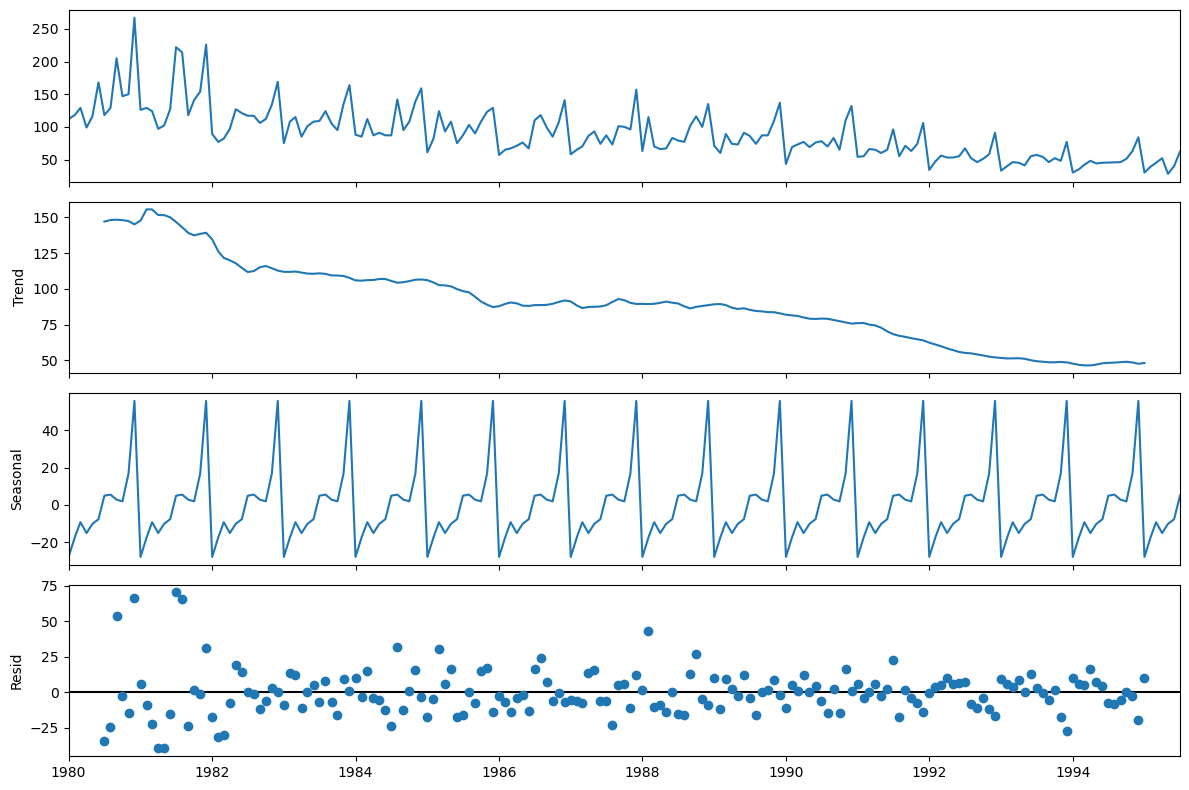

In [28]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [30]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
1980-11-01    147.42
1980-12-01    145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.91
1980-02-01   -17.44
1980-03-01    -9.29
1980-04-01   -15.10
1980-05-01   -10.20
1980-06-01    -7.68
1980-07-01     4.90
1980-08-01     5.50
1980-09-01     2.77
1980-10-01     1.87
1980-11-01    16.85
1980-12-01    55.71
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   -33.98
1980-08-01   -24.62
1980-09-01    53.85
1980-10-01    -2.96
1980-11-01   -14.26
1980-12-01    66.16
Name: resid, dtype: float64 



*The trend represents the long-term movement in sales over time*

    1)The trend captures sustained changes in consumer behavior or market conditions over time.
    2)This indicates a slight downward trend in overall sales.
    
*The seasonality captures the recurring patterns or fluctuations in sales due to seasonal effects*

    1)The Rose sales data exhibits clear seasonality
    
*The residual represents the random noise or deviations not explained by the trend or seasonality.*
    
    1)If we decompose a multiplicative series using an additive method, the error will continue o bear elements of seasonality.
    2)Residuals help identify anomalies or events that may require investigation.

In [31]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    113.10
1980-08-01    123.50
1980-09-01    202.23
1980-10-01    145.13
1980-11-01    133.15
1980-12-01    211.29
dtype: float64

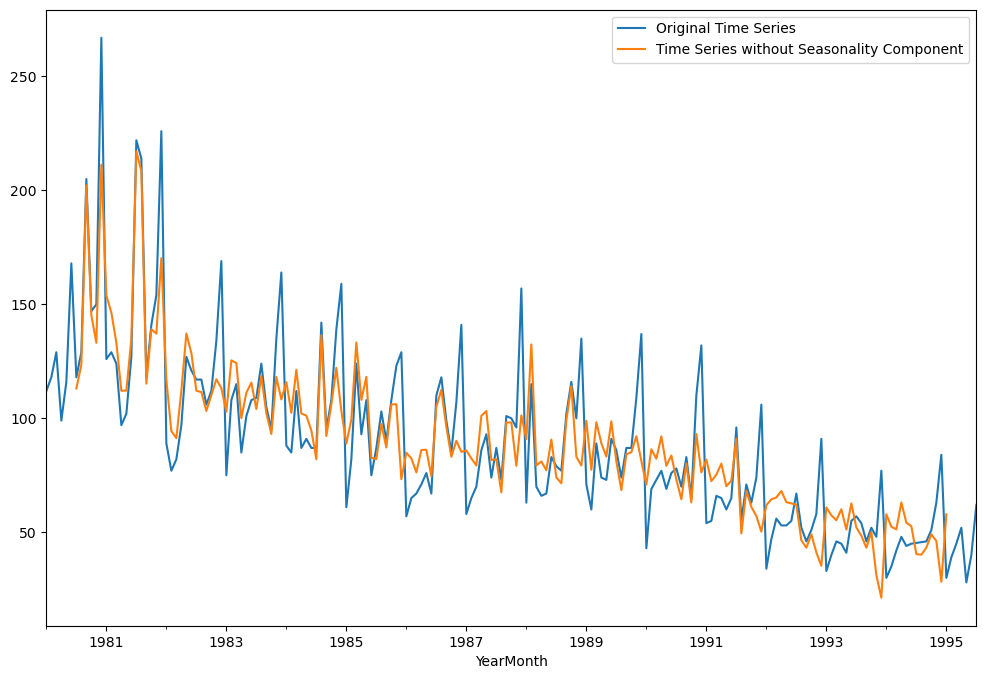

In [32]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative Model

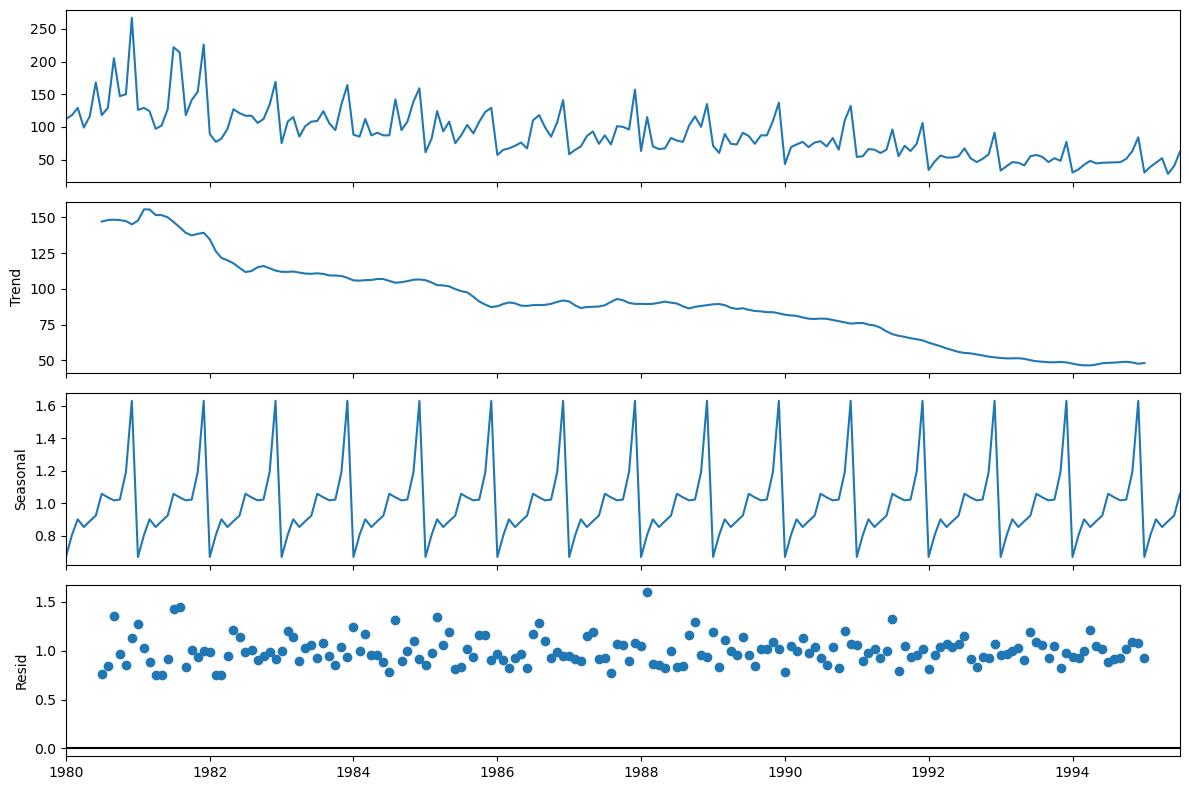

In [33]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
1980-11-01    147.42
1980-12-01    145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.67
1980-02-01    0.81
1980-03-01    0.90
1980-04-01    0.85
1980-05-01    0.89
1980-06-01    0.92
1980-07-01    1.06
1980-08-01    1.04
1980-09-01    1.02
1980-10-01    1.02
1980-11-01    1.19
1980-12-01    1.63
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    0.76
1980-08-01    0.84
1980-09-01    1.36
1980-10-01    0.97
1980-11-01    0.85
1980-12-01    1.13
Name: resid, dtype: float64 



*Trend*

    The trend is relatively stable with slight fluctuations, but there isn’t a sharp exponential growth or decline. Still, the varying seasonal factors (multiplicative nature) seem more aligned with a multiplicative decomposition method.
    
*Seasonality*

    The values for seasonality fluctuate around a base value of 1, which suggests that the seasonal variations are proportional to the trend (i.e., when the value of the trend increases, the seasonal effect also increases).
    
*Residual*
    
    The residuals show fluctuations but they are relatively small and seem to be random noise. In multiplicative models, the residuals represent the variation that is left after accounting for trend and seasonality, and their behavior seems typical for a multiplicative decomposition.

*As the trend appears to have relatively steady values with slight fluctuations, the seasonality is better represented as a proportional change to the trend. Multiplicative decomposition is appropriate for this data set.*

In [35]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.84
1980-08-01    148.97
1980-09-01    149.73
1980-10-01    149.05
1980-11-01    148.27
1980-12-01    146.25
dtype: float64

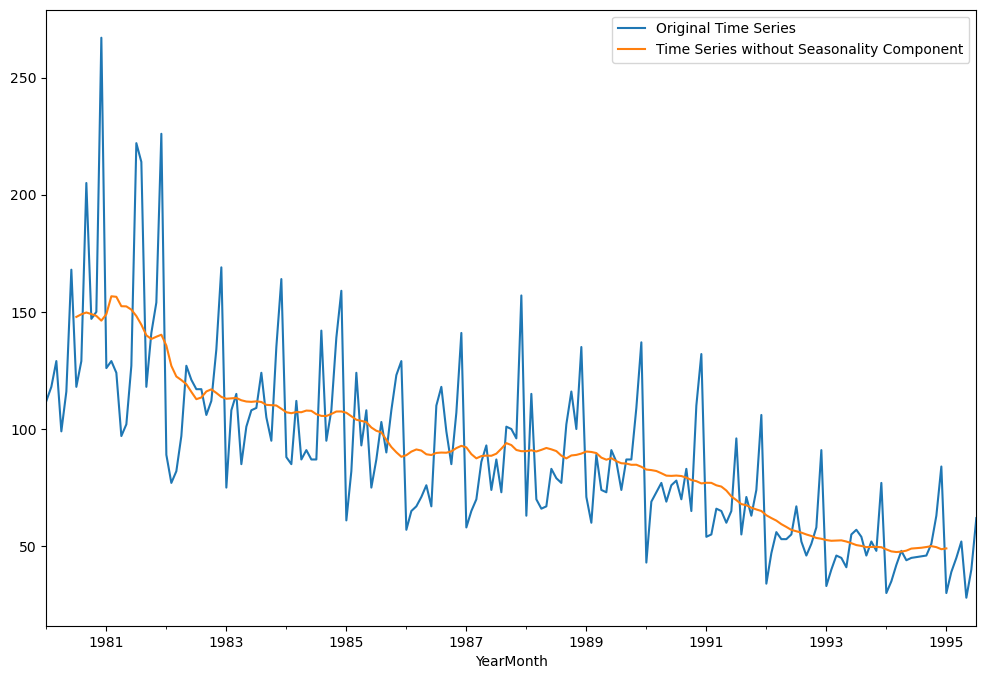

In [36]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## Train-test split

In [37]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

*The data is split into two distinct subsets: training and test datasets. This division is essential for developing and evaluating predictive models.*

$Training Set$ :*This subset includes the first 70% of the available data. It is used to fit and train the model, allowing it to learn the underlying patterns and trends from the historical sales data.*

$Test Set$: *The remaining 30% of the data is set aside as the test set. This portion is used to assess the model's performance and generalization ability. It simulates how the model will perform when applied to future, unseen data.*

By splitting the data in this way, we ensure that the model is trained on a large enough dataset, while still maintaining an independent portion for testing and validating its predictions. This process helps in assessing how well the model is likely to perform on real-world data, improving its reliability and robustness.

In [38]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [39]:
from IPython.display import display

In [40]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0

First few rows of Test Data


Rose
YearMonth        
1990-11-01  110.0
1990-12-01  132.0
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

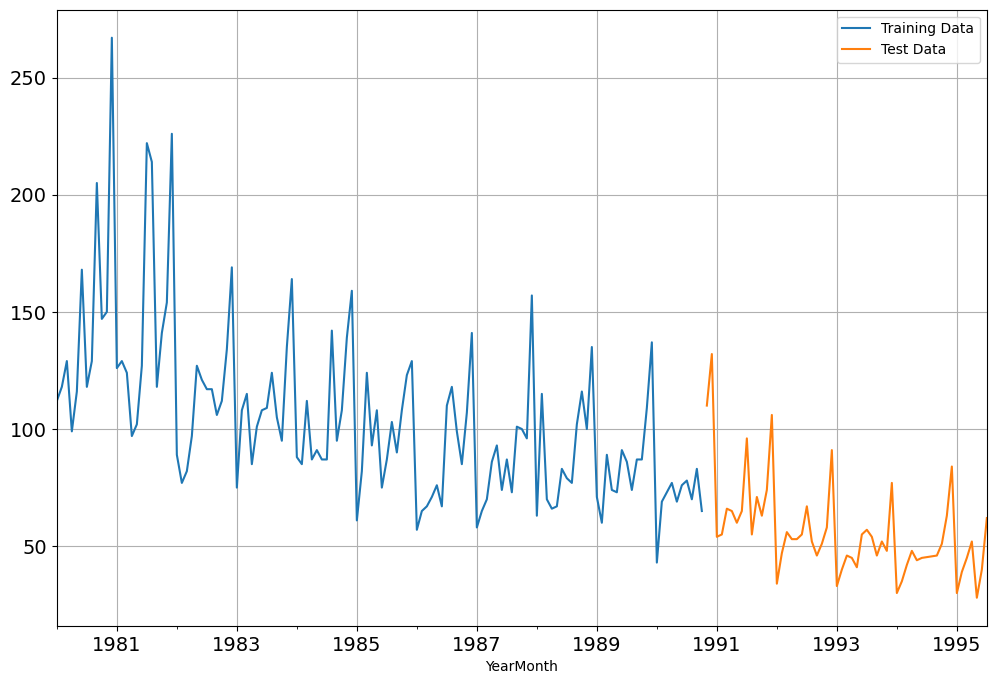

In [41]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Model Building - Original Data

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130

First few rows of Test Data


Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

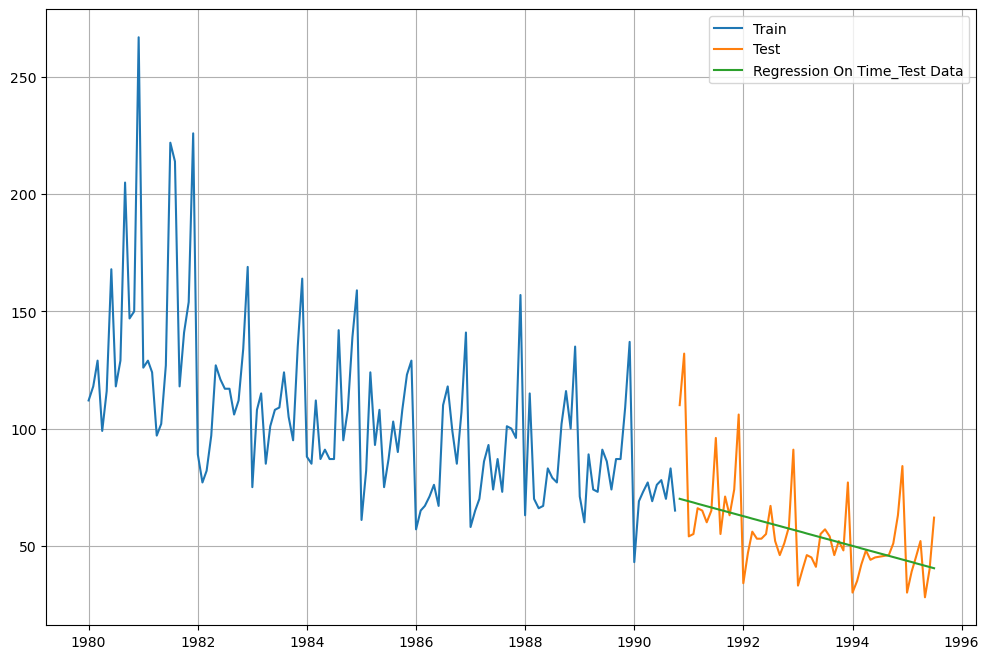

In [48]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [49]:
from sklearn import metrics

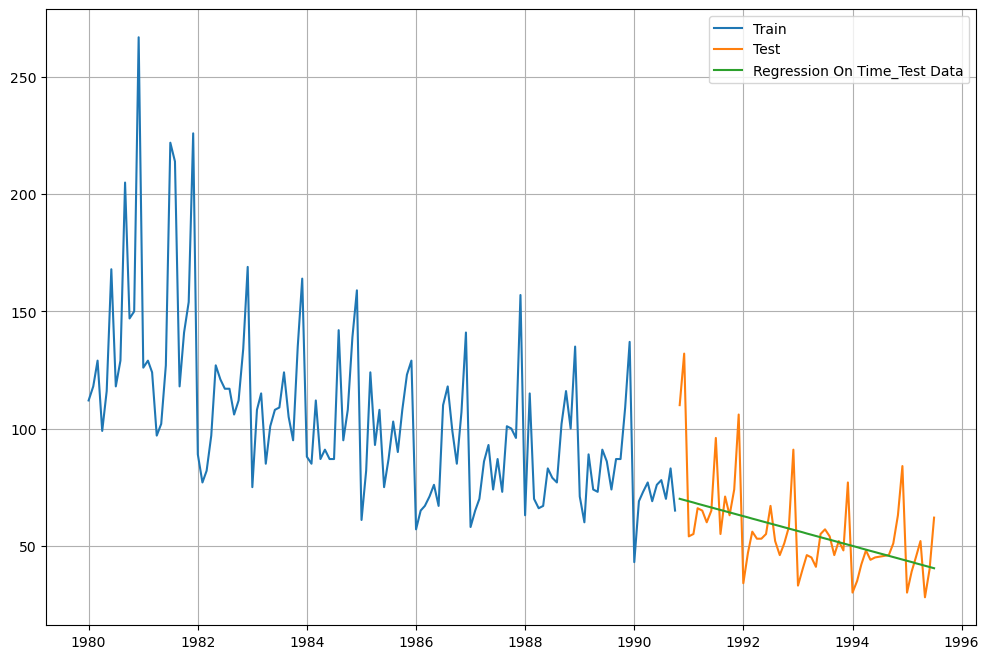

In [50]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

from sklearn import metrics

### Model Evaluation

In [51]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.356 


In [52]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  17.355804

*The RMSE for the RegressionOnTime forecast on the test data is 17.36. This means that, on average, the model's predictions are off by 17.36 units of wine sales (in the same scale as the sales data).*



### Method 2: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [53]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [54]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                       
1990-11-01  110.0     104.692308
1990-12-01  132.0     104.692308
1991-01-01   54.0     104.692308
1991-02-01   55.0     104.692308
1991-03-01   66.0     104.692308

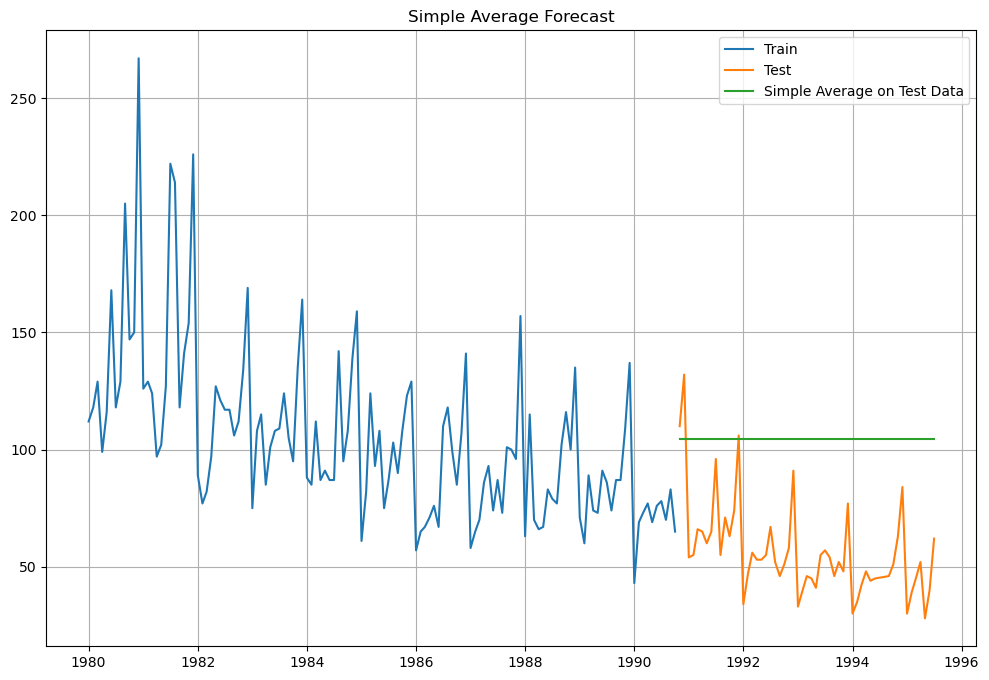

In [55]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [56]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 52.412


In [57]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression   17.355804
SimpleAverageModel  52.412291

*The RMSE for the Simple Average forecast on the test data is 52.4. This means that, on average, the model's predictions are off by 52.4 units of wine sales (in the same scale as the sales data).*

## Method 3: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [58]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [59]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

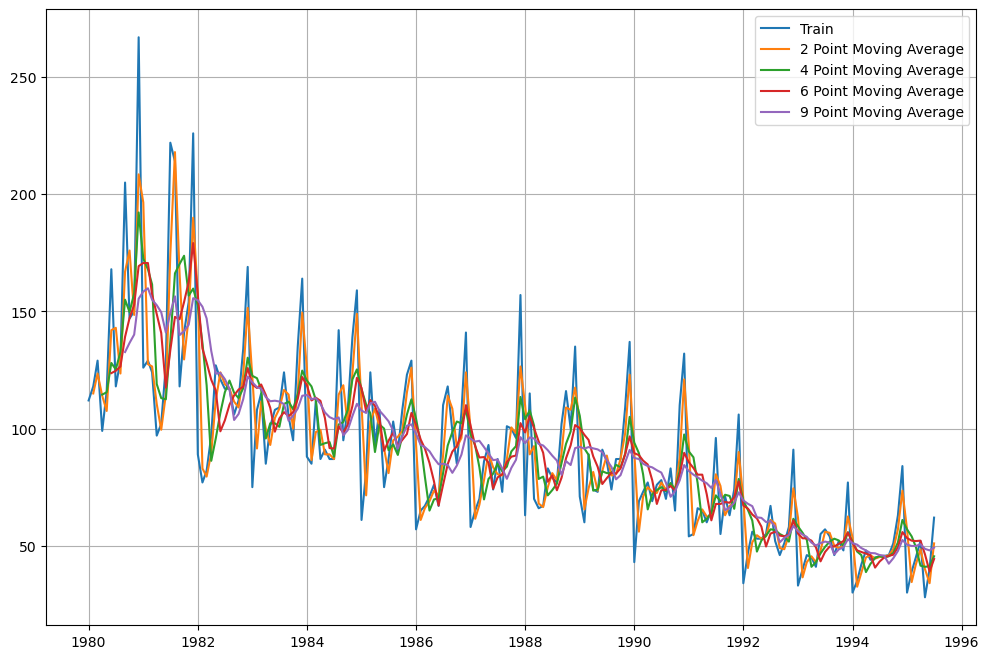

In [60]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [61]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

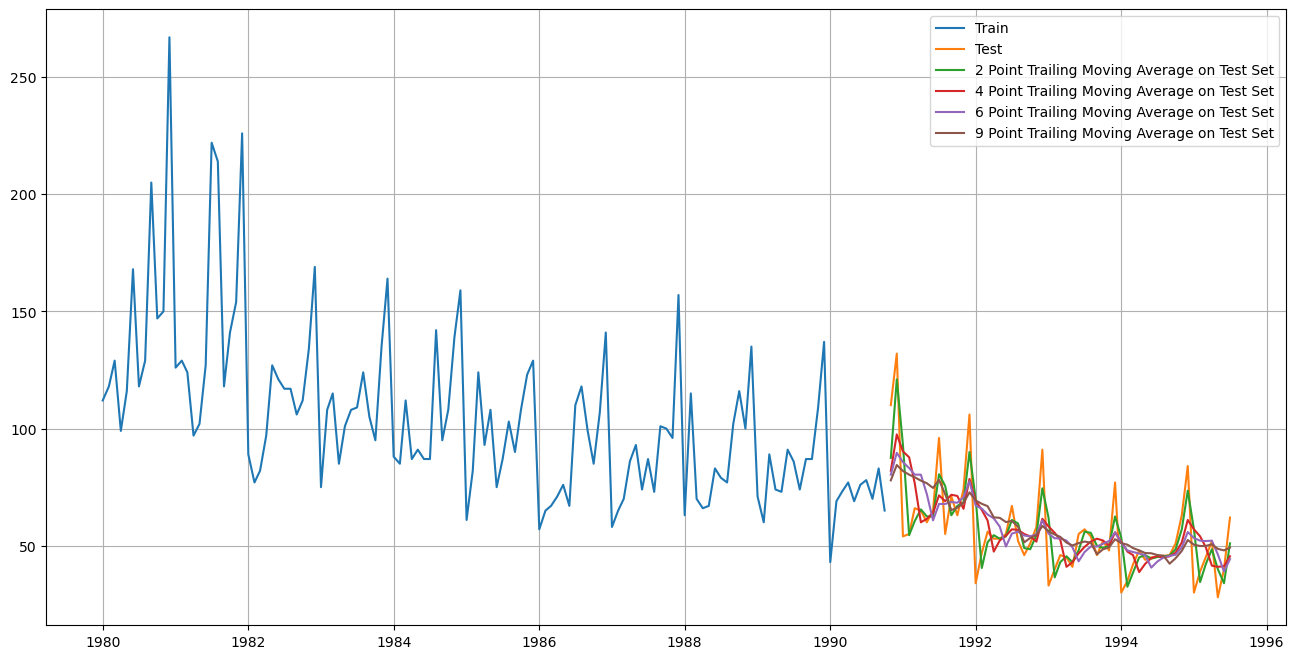

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [63]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model3_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model3_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model3_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model3_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.342


In [64]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression            17.355804
SimpleAverageModel           52.412291
2pointTrailingMovingAverage  11.801043
4pointTrailingMovingAverage  15.367244
6pointTrailingMovingAverage  15.862398
9pointTrailingMovingAverage  16.341947

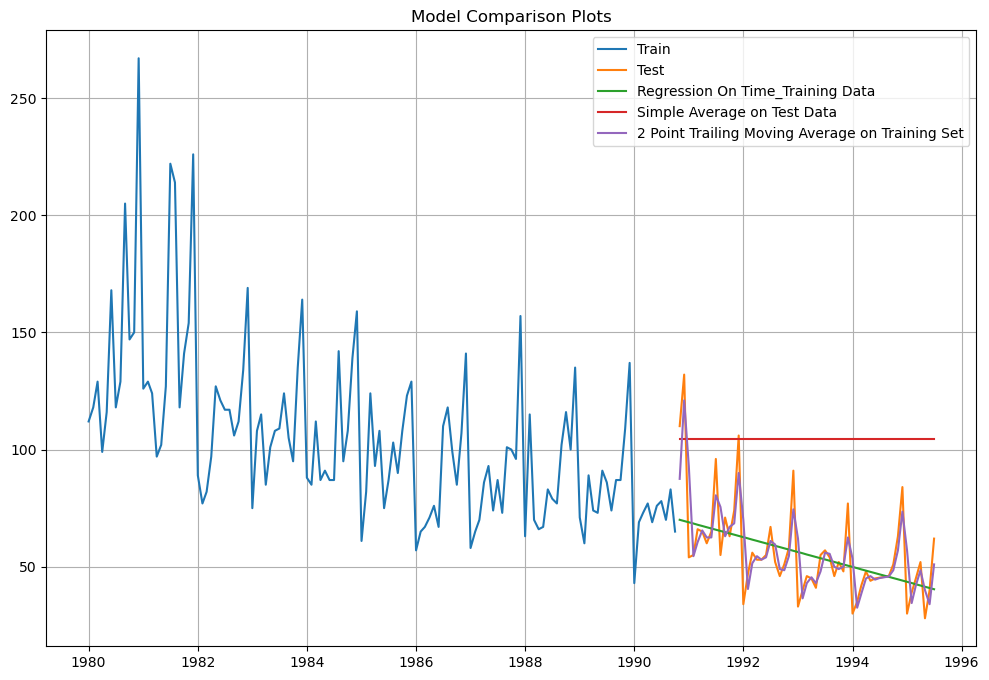

In [65]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 5: Simple Exponential Smoothing

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [67]:
SES_train = train.copy()
SES_test = test.copy()

In [68]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [70]:
model_SES_autofit.params

{'smoothing_level': 0.1277774077775358,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
YearMonth                   
1990-11-01  110.0  77.599284
1990-12-01  132.0  77.599284
1991-01-01   54.0  77.599284
1991-02-01   55.0  77.599284
1991-03-01   66.0  77.599284

Text(0, 0.5, 'Wine Units Sold')

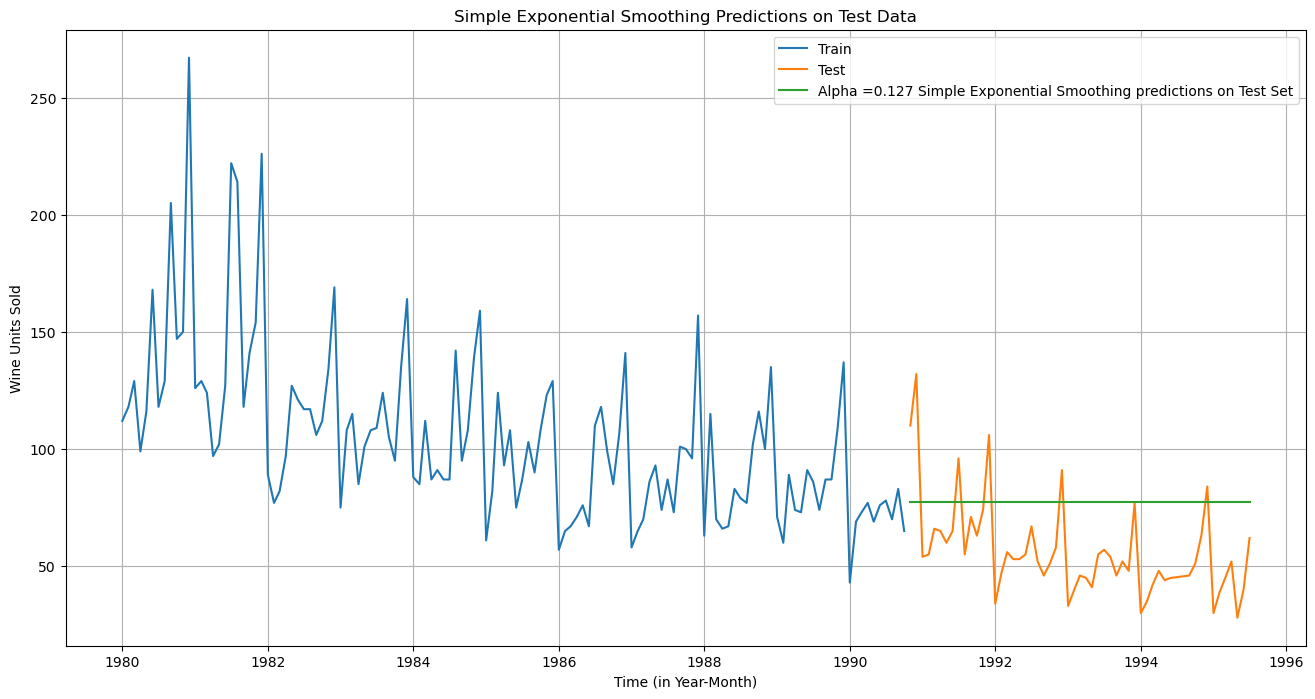

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.127 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

### Model Evaluation for $\alpha$ = 0.127 : Simple Exponential Smoothing

In [73]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.127 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.127 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 29.224


In [74]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.127,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                       17.355804
SimpleAverageModel                      52.412291
2pointTrailingMovingAverage             11.801043
4pointTrailingMovingAverage             15.367244
6pointTrailingMovingAverage             15.862398
9pointTrailingMovingAverage             16.341947
Alpha=0.127,SimpleExponentialSmoothing  29.223870

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [75]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [76]:
for i in np.arange(0.1, 1, 0.05):
    # Fit SES model
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    
    # Store predictions
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    # Compute RMSE for train and test sets
    rmse_model5_train_i = metrics.mean_squared_error(
        SES_train['Rose'], SES_train[f'predict_{i}'], squared=False
    )
    rmse_model5_test_i = metrics.mean_squared_error(
        SES_test['Rose'], SES_test[f'predict_{i}'], squared=False
    )
    
    # Create temporary DataFrame for current alpha value
    temp_resultsDf = pd.DataFrame({
        'Alpha Values': [i],
        'Train RMSE': [rmse_model5_train_i],
        'Test RMSE': [rmse_model5_test_i]
    })
    
    # Append to results DataFrame using pd.concat
    resultsDf_6 = pd.concat([resultsDf_6, temp_resultsDf], ignore_index=True)

In [77]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
17          0.95   38.150218  22.132051
16          0.90   37.507371  22.496984
15          0.85   36.901698  22.858190
14          0.80   36.330954  23.212947
13          0.75   35.793559  23.559167
12          0.70   35.288467  23.895104
11          0.65   34.815003  24.219182
10          0.60   34.372651  24.529990
9           0.55   33.960778  24.826649
8           0.50   33.578304  25.109786
7           0.45   33.223346  25.383412
6           0.40   32.893017  25.657948
5           0.35   32.583675  25.954512
4           0.30   32.292266  26.310533
3           0.25   32.019860  26.787297
2           0.20   31.779467  27.482320
1           0.15   31.613462  28.556111
0           0.10   31.643829  30.310782

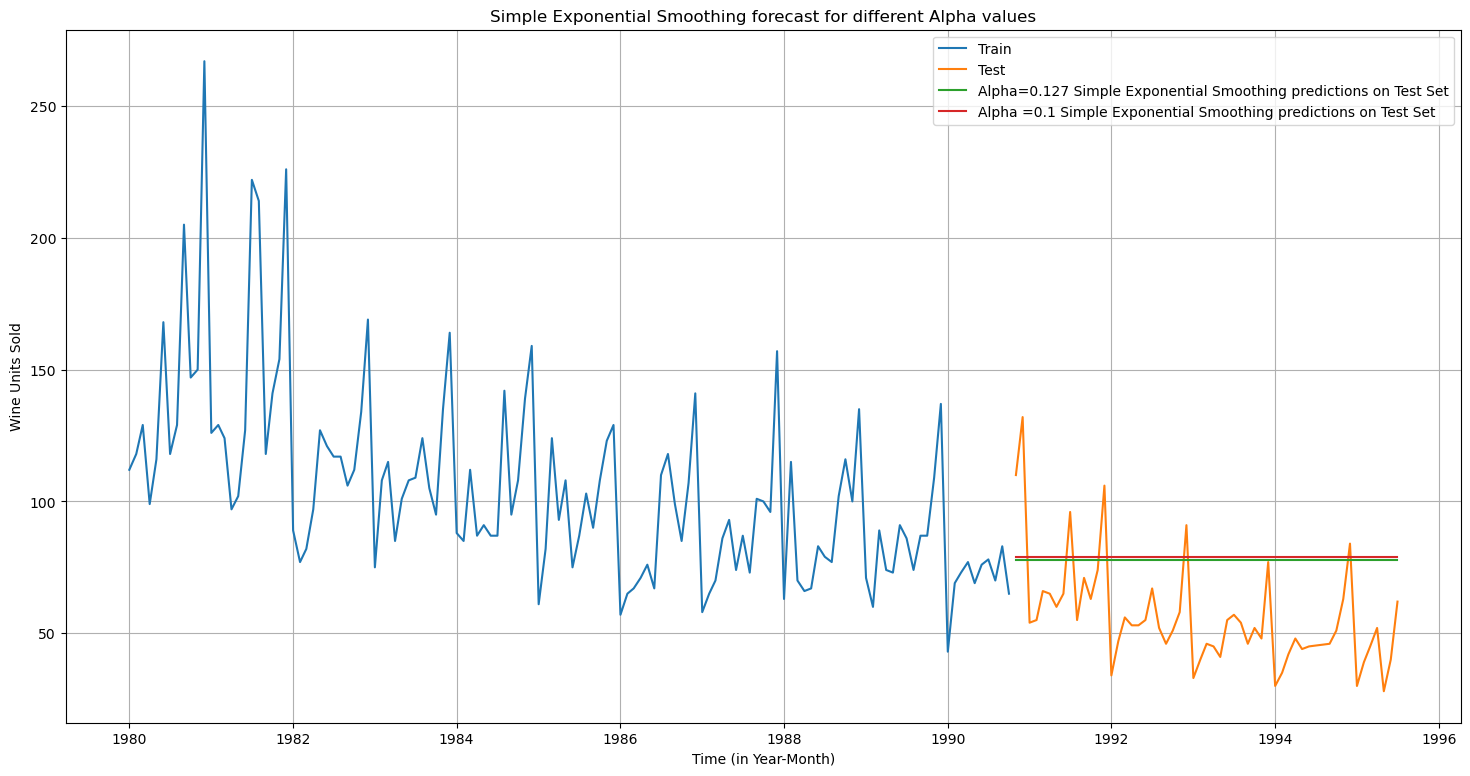

In [78]:
## Plotting on both the Training and Test data
model_SES_alpha_i = model_SES.fit(smoothing_level=0.1,optimized=False,use_brute=True)
SES_train['predict',0.1] = model_SES_alpha_i.fittedvalues
SES_test['predict',0.1] = model_SES_alpha_i.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.127 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing forecast for different Alpha values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Method 6: Double Exponential Smoothing (Holt's Model)

### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [79]:
DES_train = train.copy()
DES_test = test.copy()

In [80]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
model_DES.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 7.755984441513712e-11,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 139.3527819489728,
 'initial_trend': -0.5291705700335453,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
# Forecasting using this model for the test set
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict']

YearMonth
1990-11-01    70.031437
1990-12-01    69.502267
1991-01-01    68.973096
1991-02-01    68.443926
1991-03-01    67.914755
1991-04-01    67.385584
1991-05-01    66.856414
1991-06-01    66.327243
1991-07-01    65.798073
1991-08-01    65.268902
1991-09-01    64.739732
1991-10-01    64.210561
1991-11-01    63.681390
1991-12-01    63.152220
1992-01-01    62.623049
1992-02-01    62.093879
1992-03-01    61.564708
1992-04-01    61.035538
1992-05-01    60.506367
1992-06-01    59.977196
1992-07-01    59.448026
1992-08-01    58.918855
1992-09-01    58.389685
1992-10-01    57.860514
1992-11-01    57.331344
1992-12-01    56.802173
1993-01-01    56.273002
1993-02-01    55.743832
1993-03-01    55.214661
1993-04-01    54.685491
1993-05-01    54.156320
1993-06-01    53.627150
1993-07-01    53.097979
1993-08-01    52.568808
1993-09-01    52.039638
1993-10-01    51.510467
1993-11-01    50.981297
1993-12-01    50.452126
1994-01-01    49.922956
1994-02-01    49.393785
1994-03-01    48.864614
1994-0

Text(0, 0.5, 'Wine Units Sold')

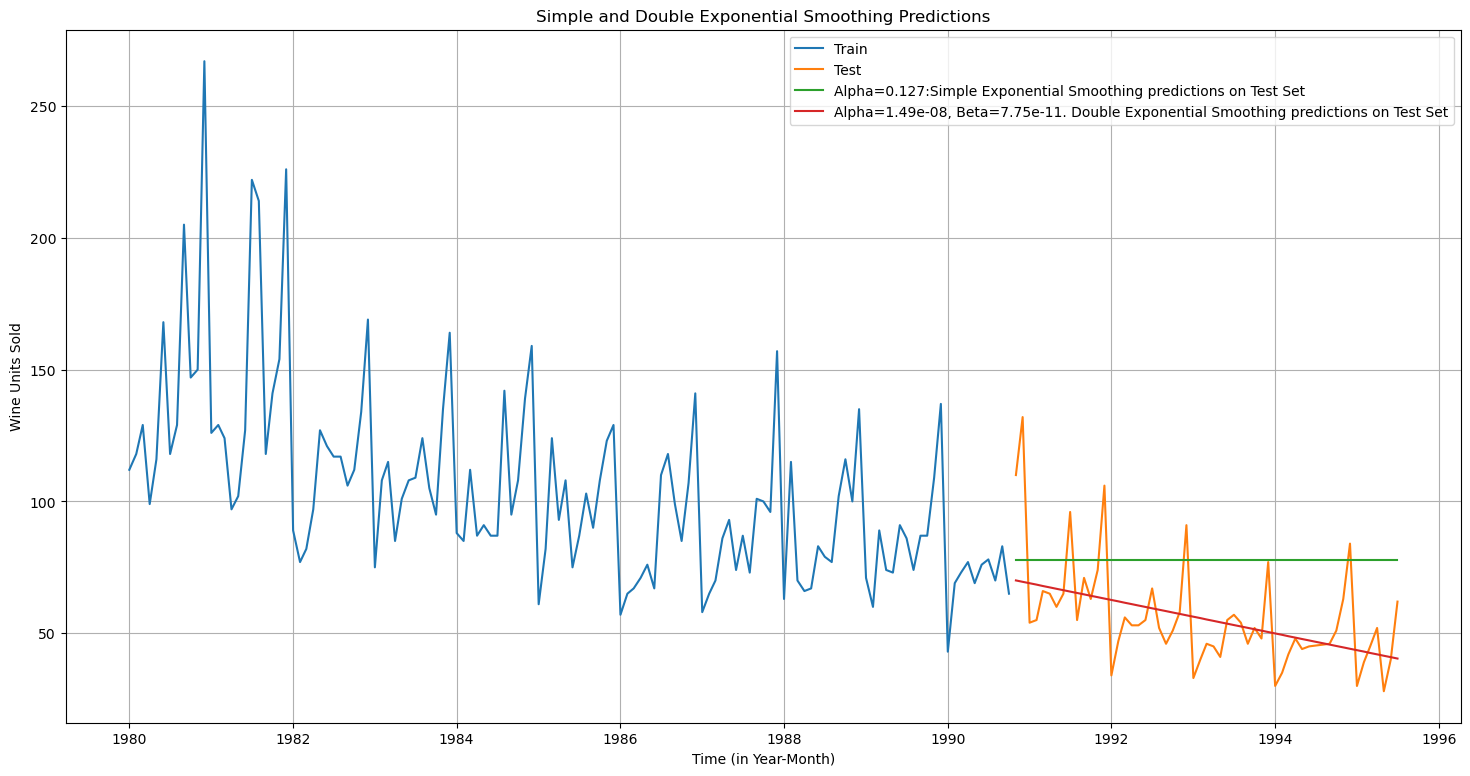

In [83]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(18,9))
plt.plot(DES_train, label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.127:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.75e-11. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

### Model Evaluation - Double Exponential Smoothing(Holt's Model)

In [84]:
rmse_DES_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For DES forecast on the Rose Testing Data:  RMSE is %3.3f" %(rmse_DES_test))

For DES forecast on the Rose Testing Data:  RMSE is 17.356


In [85]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_DES_test]},index=['Alpha=1.49e-08, Beta=7.75e-11, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   17.355804
SimpleAverageModel                                  52.412291
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367244
6pointTrailingMovingAverage                         15.862398
9pointTrailingMovingAverage                         16.341947
Alpha=0.127,SimpleExponentialSmoothing              29.223870
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736

In [86]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha, Beta, Train RMSE, Test RMSE]
Index: []

In [87]:
model_DES = Holt(DES_train['Rose'])
for i in np.arange(0.05, 1.05, 0.05):  # Smoothing level (alpha)
    for j in np.arange(0.05, 1.05, 0.05):  # Smoothing trend (beta)
        # Fit DES model
        model_DES_alpha_i_j = model_DES.fit(
            smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True
        )
        
        # Store predictions in train and test sets
        DES_train[f'predict_{i}_{j}'] = model_DES_alpha_i_j.fittedvalues
        DES_test[f'predict_{i}_{j}'] = model_DES_alpha_i_j.forecast(len(DES_test))
        
        # Compute RMSE for train and test sets
        rmse_model6_train = metrics.mean_squared_error(
            DES_train['Rose'], DES_train[f'predict_{i}_{j}'], squared=False
        )
        rmse_model6_test = metrics.mean_squared_error(
            DES_test['Rose'], DES_test[f'predict_{i}_{j}'], squared=False
        )
        
        # Create a temporary DataFrame for the current combination of alpha and beta
        temp_resultsDf = pd.DataFrame({
            'Alpha': [i],
            'Beta': [j],
            'Train RMSE': [rmse_model6_train],
            'Test RMSE': [rmse_model6_test]
        })
        
        # Append the temporary DataFrame to resultsDf_6 using pd.concat
        resultsDf_6 = pd.concat([resultsDf_6, temp_resultsDf], ignore_index=True)

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
resultsDf_6

Alpha  Beta  Train RMSE   Test RMSE
0     0.05  0.05   49.771447   23.215666
1     0.05  0.10   42.156805   23.411608
2     0.05  0.15   39.000168   19.071592
3     0.05  0.20   37.588235   17.625533
4     0.05  0.25   36.938831   18.990917
..     ...   ...         ...         ...
395   1.00  0.80   57.575818  406.506318
396   1.00  0.85   59.101100  447.520615
397   1.00  0.90   60.691028  491.247275
398   1.00  0.95   62.352460  537.950429
399   1.00  1.00   64.093561  587.897092

[400 rows x 4 columns]

In [89]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Test RMSE
60    0.20  0.05   33.164772  17.287297
80    0.25  0.05   33.060654  17.372253
146   0.40  0.35   37.350007  17.376004
10    0.05  0.55   33.999421  17.461245
170   0.45  0.55   39.753957  17.466751

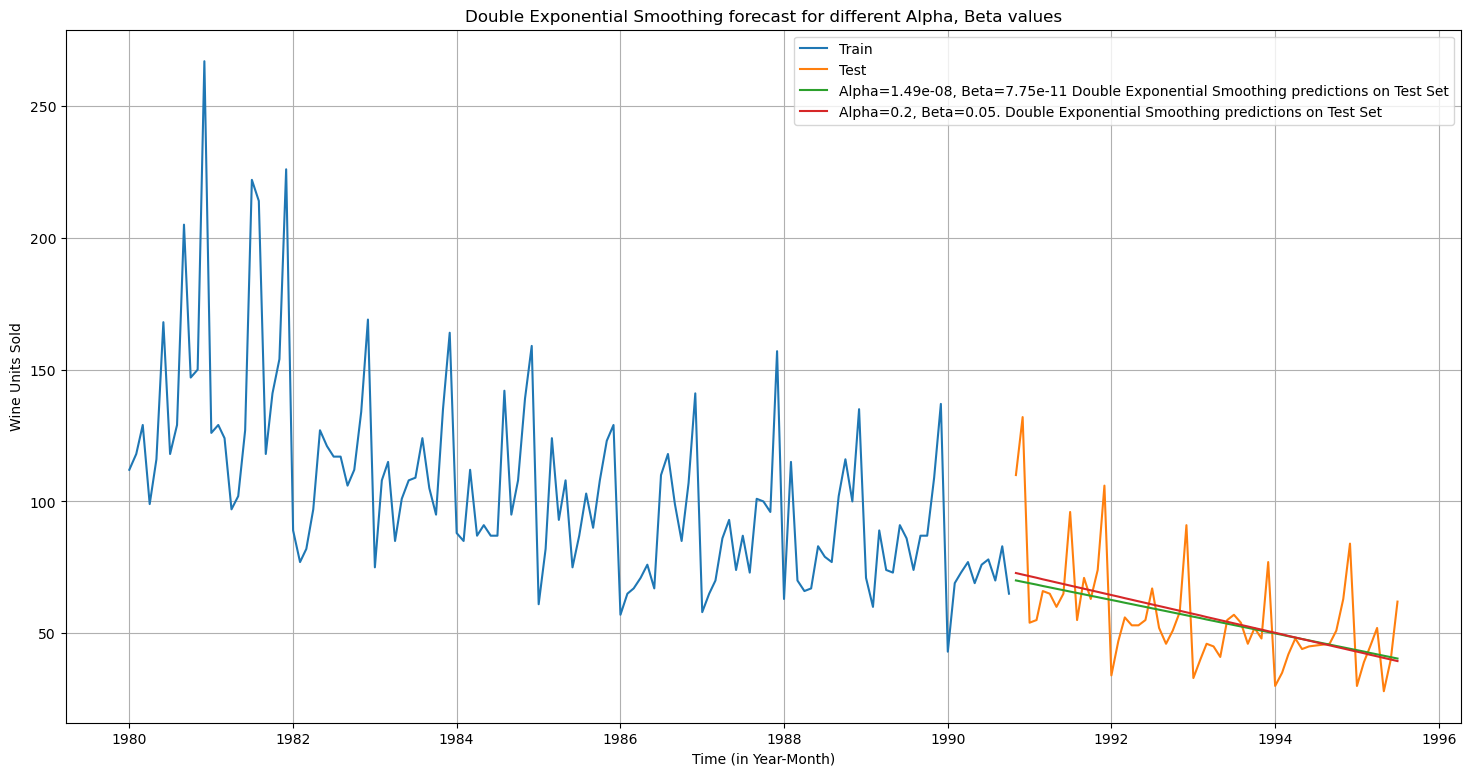

In [90]:
## Plotting on both the Training and Test data
model_DES_alpha_i_j = model_DES.fit(smoothing_level=0.2,smoothing_trend=0.05,optimized=False,use_brute=True)
DES_train['predict',0.20,0.05] = model_DES_alpha_i_j.fittedvalues
DES_test['predict',0.20,0.05] = model_DES_alpha_i_j.forecast(len(test))
        
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.75e-11 Double Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict',0.2,0.05], label='Alpha=0.2, Beta=0.05. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Double Exponential Smoothing forecast for different Alpha, Beta values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [93]:
model_TES_autofit = model_TES.fit()

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.06208669130988934,
 'smoothing_trend': 0.018324026350319066,
 'smoothing_seasonal': 0.000890407920947476,
 'damping_trend': nan,
 'initial_level': 175.13549001567995,
 'initial_trend': 0.9929819792289998,
 'initial_seasons': array([0.64356811, 0.72961666, 0.79892089, 0.69823075, 0.7853838 ,
        0.85201631, 0.93662832, 0.99971478, 0.94480076, 0.92473909,
        1.06761581, 1.47942515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
YearMonth                      
1990-11-01  110.0     90.315384
1990-12-01  132.0    124.546156
1991-01-01   54.0     53.931938
1991-02-01   55.0     60.894905
1991-03-01   66.0     66.369856

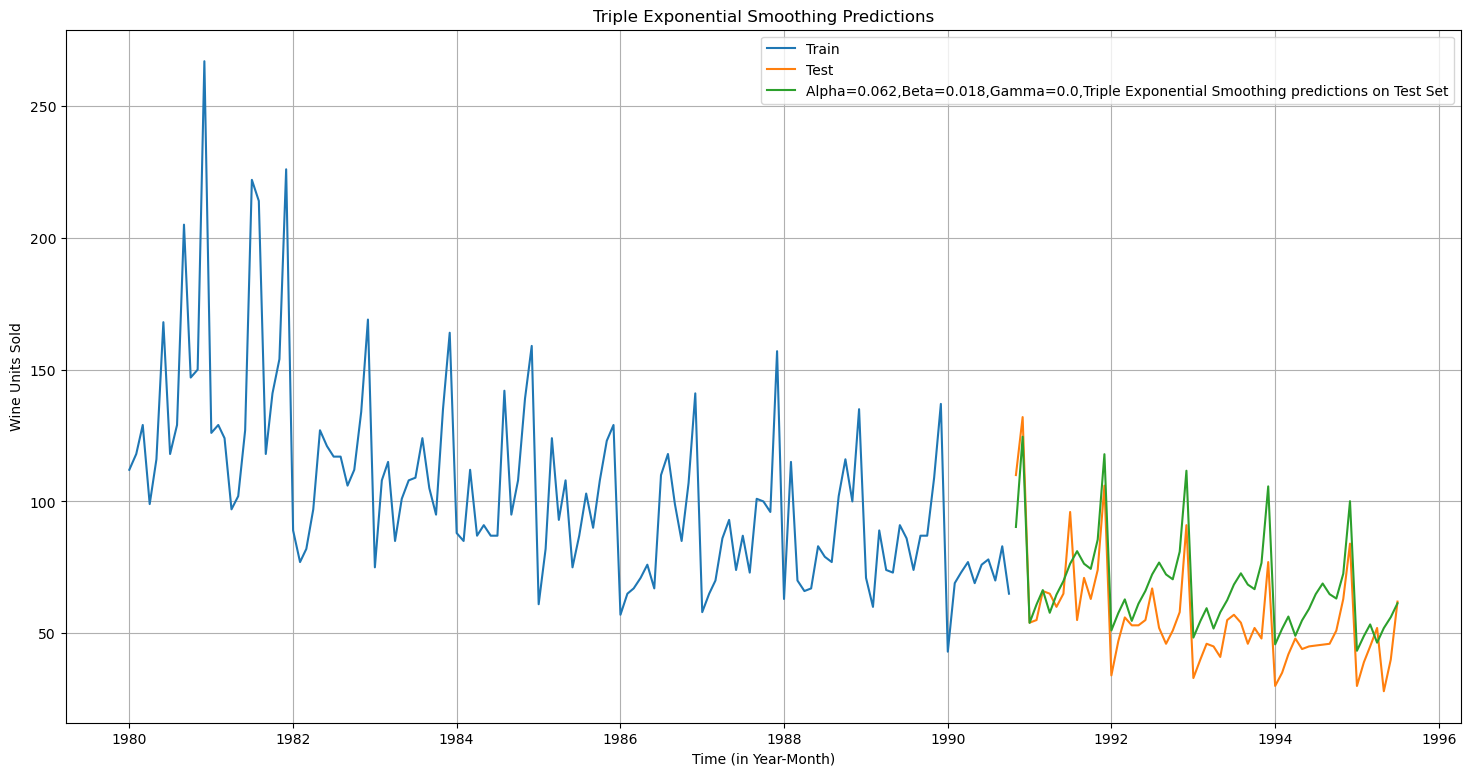

In [96]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [97]:
## Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.062,Beta=0.018,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.062,Beta=0.018,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 15.273


In [98]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   17.355804
SimpleAverageModel                                  52.412291
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367244
6pointTrailingMovingAverage                         15.862398
9pointTrailingMovingAverage                         16.341947
Alpha=0.127,SimpleExponentialSmoothing              29.223870
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736
Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponen...  15.273169

Calculating the performance metrics for different values of alpha, beta and gamma

In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [100]:
for i in np.arange(0.1, 1.05, 0.05):  # Smoothing level (alpha)
    for j in np.arange(0.1, 1.05, 0.05):  # Smoothing trend (beta)
        for k in np.arange(0.1, 1.05, 0.05):  # Smoothing seasonal (gamma)
            # Fit TES model with specified smoothing parameters
            model_TES_alpha_i_j_k = ExponentialSmoothing(
                TES_train['Rose'], trend='multiplicative', seasonal='multiplicative'
            ).fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False, use_brute=True)
            TES_train[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
            
            # Compute RMSE for train and test sets
            rmse_model8_train = metrics.mean_squared_error(
                TES_train['Rose'], TES_train[f'predict_{i}_{j}_{k}'], squared=False
            )
            rmse_model8_test = metrics.mean_squared_error(
                TES_test['Rose'], TES_test[f'predict_{i}_{j}_{k}'], squared=False
            )
            
            # Create a temporary DataFrame for the current combination of alpha, beta, gamma
            temp_resultsDf = pd.DataFrame({
                'Alpha': [i],
                'Beta': [j],
                'Gamma': [k],
                'Train RMSE': [rmse_model8_train],
                'Test RMSE': [rmse_model8_test]
            })
            
            # Append the temporary DataFrame to resultsDf_8_2 using pd.concat
            resultsDf_8_2 = pd.concat([resultsDf_8_2, temp_resultsDf], ignore_index=True)

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\stats

ValueError: Input contains infinity or a value too large for dtype('float64').

In [101]:
resultsDf_8_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0      0.10  0.10   0.10  1.958181e+01  9.466646e+00
1      0.10  0.10   0.15  1.984633e+01  9.389742e+00
2      0.10  0.10   0.20  2.014385e+01  9.391026e+00
3      0.10  0.10   0.25  2.046896e+01  9.442895e+00
4      0.10  0.10   0.30  2.081923e+01  9.533971e+00
...     ...   ...    ...           ...           ...
4991   0.75  0.85   0.75  8.704727e+04  5.953420e+01
4992   0.75  0.85   0.80  1.669948e+09  9.043907e+03
4993   0.75  0.85   0.85  9.608190e+13  8.794437e+15
4994   0.75  0.85   0.90  2.571893e+27  5.904227e+01
4995   0.75  0.85   0.95  1.491954e+14  2.756695e+05

[4996 rows x 5 columns]

In [102]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Test RMSE
72    0.1  0.25   0.85   27.462246   8.377119
71    0.1  0.25   0.80   26.636977   8.391075
51    0.1  0.20   0.75   25.575045   8.396681
50    0.1  0.20   0.70   24.895298   8.399668
73    0.1  0.25   0.90   28.352174   8.404365

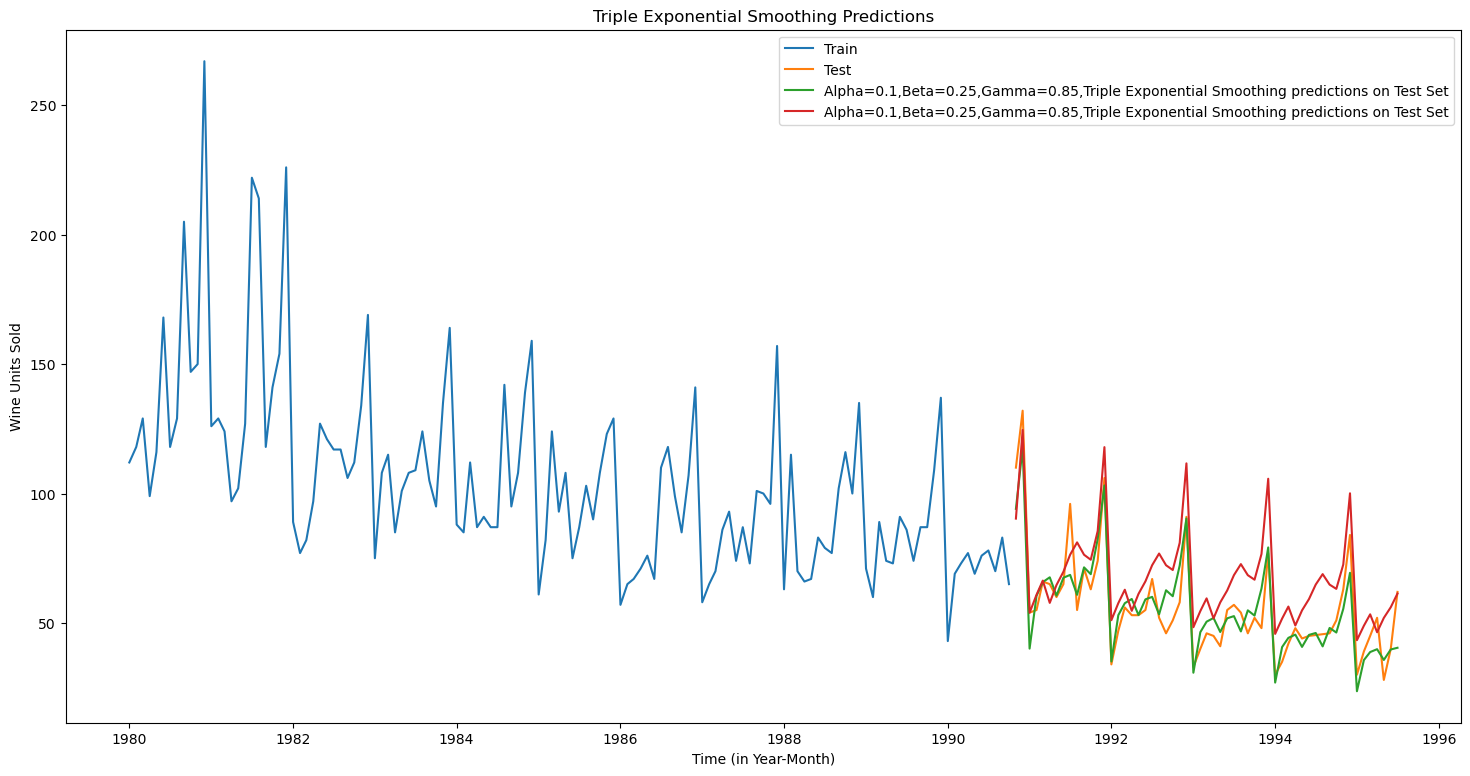

In [103]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.1,smoothing_trend=0.25,smoothing_seasonal=0.85,optimized=False,use_brute=True)
TES_train['predict',0.1,0.25,0.85] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.1,0.25,0.85] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',0.1,0.25,0.85],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

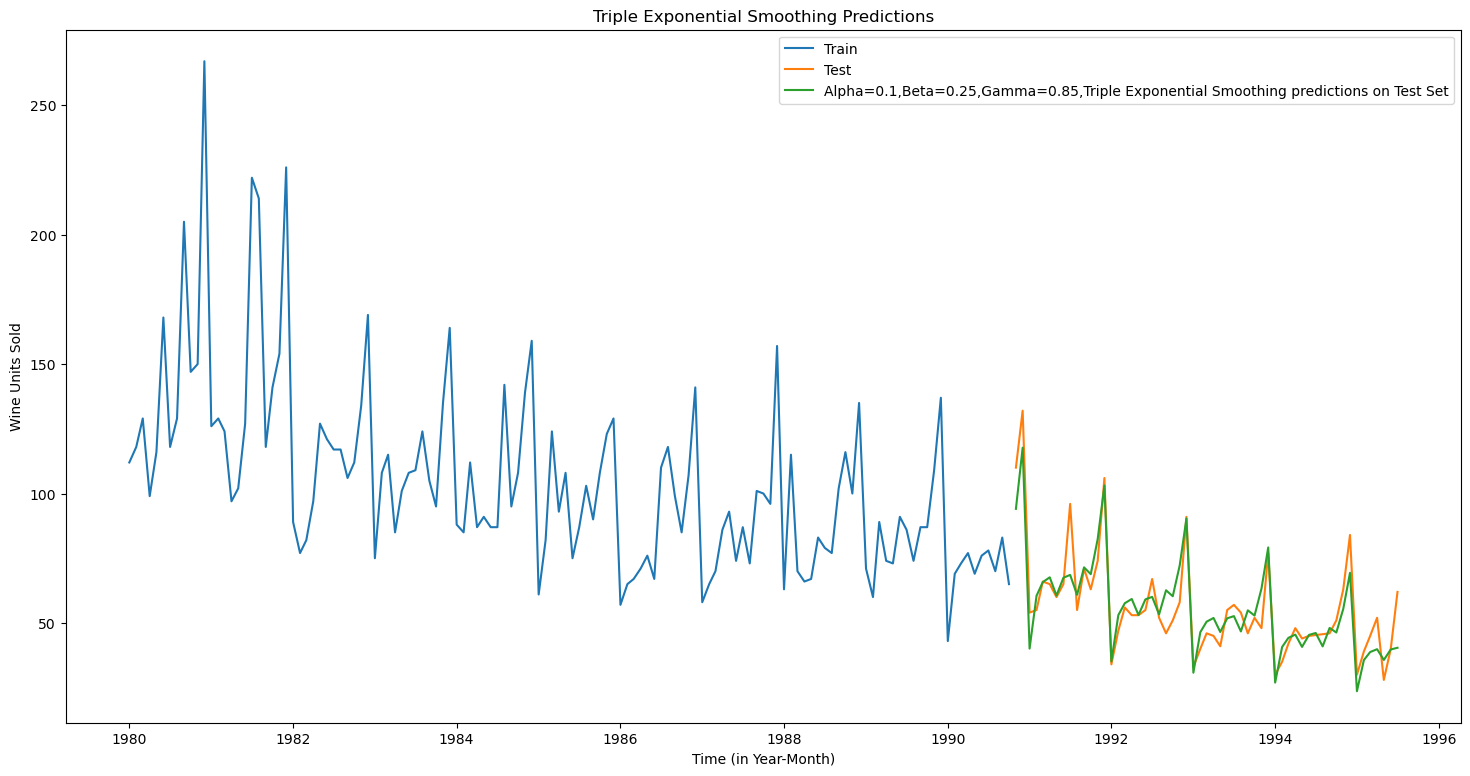

In [104]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.1,smoothing_trend=0.25,smoothing_seasonal=0.85,optimized=False,use_brute=True)
TES_train['predict',0.1,0.25,0.85] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.1,0.25,0.85] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',0.1,0.25,0.85],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

In [105]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   17.355804
SimpleAverageModel                                  52.412291
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367244
6pointTrailingMovingAverage                         15.862398
9pointTrailingMovingAverage                         16.341947
Alpha=0.127,SimpleExponentialSmoothing              29.223870
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736
Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponen...  15.273169
Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponenti...   8.377119

In [106]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponenti...   8.377119
2pointTrailingMovingAverage                         11.801043
Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponen...  15.273169
4pointTrailingMovingAverage                         15.367244
6pointTrailingMovingAverage                         15.862398
9pointTrailingMovingAverage                         16.341947
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736
Linear Regression                                   17.355804
Alpha=0.127,SimpleExponentialSmoothing              29.223870
SimpleAverageModel                                  52.412291

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1, $\beta$ = 0.25 and $\gamma$ = 0.85.

Text(0, 0.5, 'Wine Units Sold')

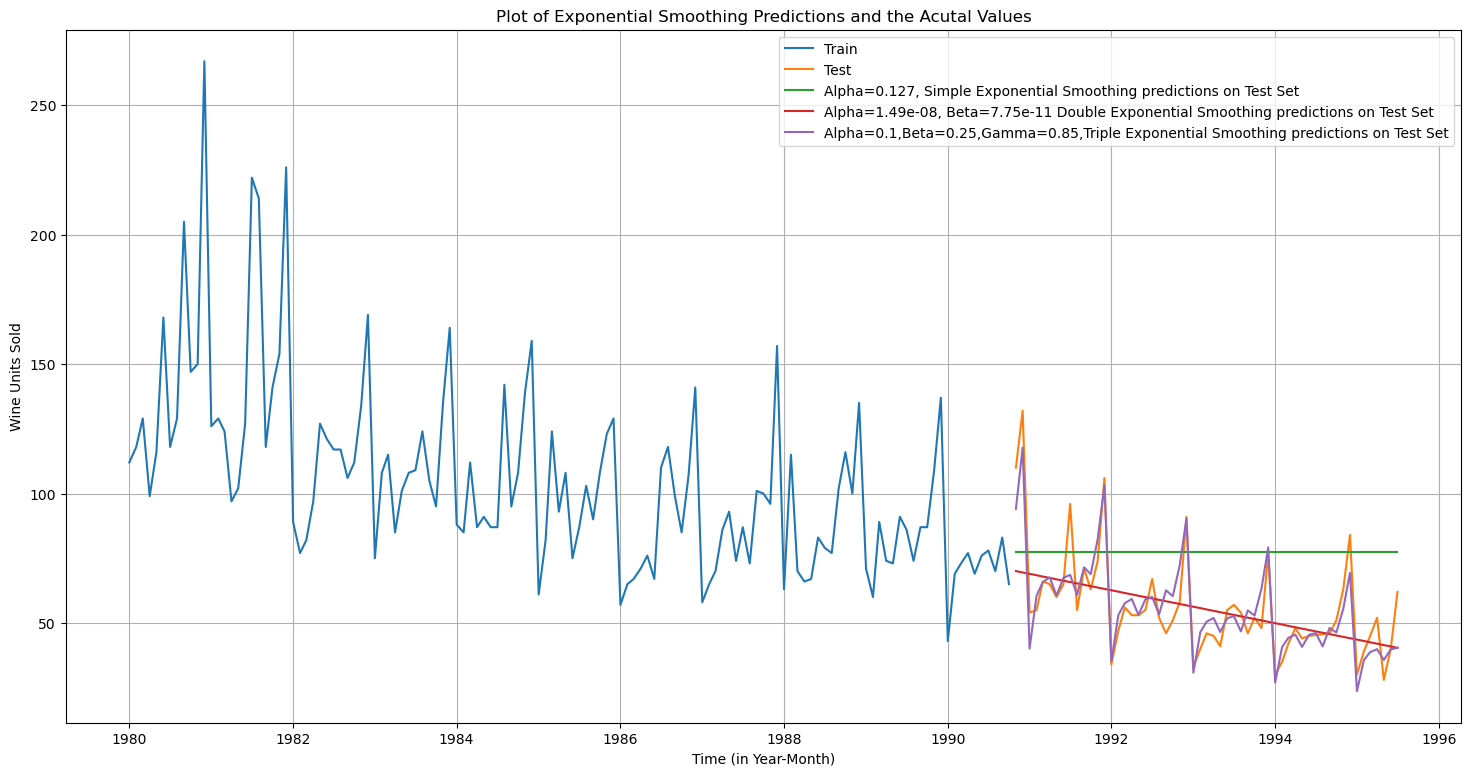

In [107]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.127, Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.75e-11 Double Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

###### Triple Exponential Smoothing (TES):

    With Alpha=0.1, Beta=0.25, Gamma=0.85, TES achieved the lowest RMSE (8.377).
    TES effectively captures seasonality and trends, making it the most suitable model for this dataset.

###### Moving Average Models:

    Performance decreases as the window size increases.
    Suitable for basic trend smoothing but not ideal for datasets with significant seasonality or trend complexity.

###### Double Exponential Smoothing (DES):

    While DES captures trends better than SES, it does not handle seasonality, leading to a higher RMSE than TES.

###### Linear Regression:

    Comparable to DES but not competitive with TES, suggesting limited utility in this context.

###### Simple Exponential Smoothing (SES):

    Focuses only on the level component and is not effective for data with trends or seasonality.

###### Simple Average Model:

    The poorest performer, as expected, due to its simplistic nature and inability to adapt to changes in the data.

*With its ability to model level, trend, and seasonality, TES provides the most accurate forecasts.*

*Parameter tuning is critical; the optimal configuration (Alpha=0.1, Beta=0.25, Gamma=0.85) should be used.*

## Concept Of Stationarity 
**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- A Time Series is considered to be stationary **when statistical properties such as the variance and (auto) correlation are constant over time.**


- Stationary Time Series allows us to think of the statistical properties of the time series as not changing in time, which enables us to build appropriate statistical models for forecasting based on past data. 


- Stationarity means that the **autocorrelation of lag ‘k’ depends on k, but not on time t.** 

    - <font color='blue'> Let $𝑋_𝑡$  denote the time series at time t.

    - Autocorrelation of lag k is the correlation between $𝑋_{𝑡}$  and $𝑋_{(𝑡−𝑘)}$</font> 




## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
print('Results of Dicky-Fuller Test')
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test
DF test statistic is -2.240
DF test p-value is 0.46713522477982006
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.Let us take one level of differencing to see whether the series becomes stationary.

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [110]:
print('Results of Dicky-Fuller Test with differencing')
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test with differencing
DF test statistic is -8.162
DF test p-value is 3.016095098834424e-11
Number of lags used 12


Text(0.5, 0, 'Time (in Year-Month)')

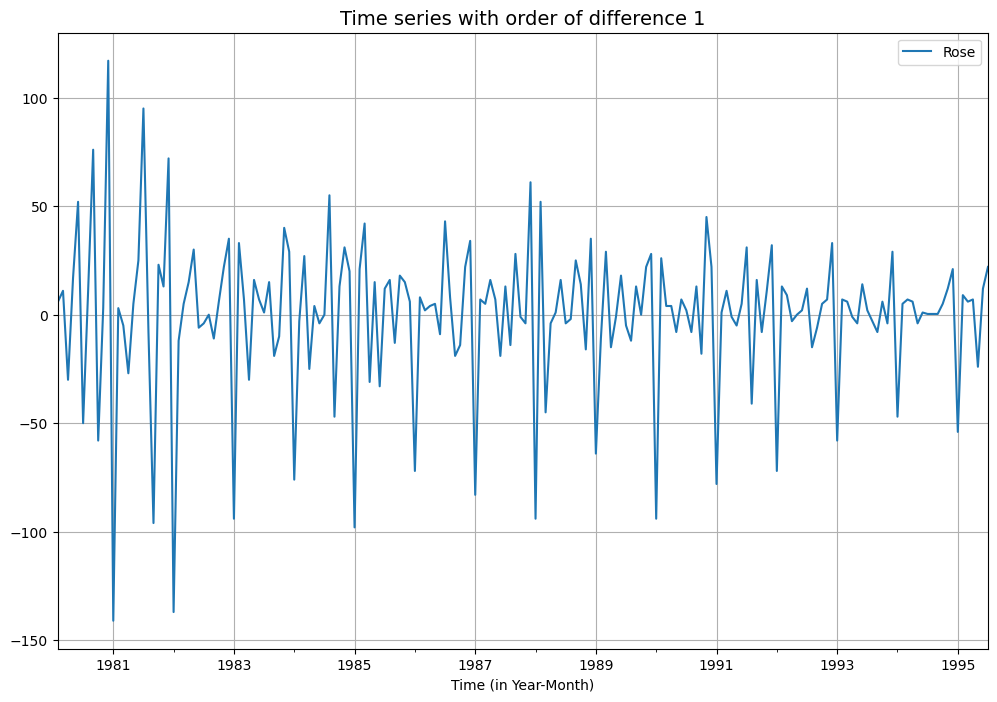

In [111]:
df.diff().dropna().plot(grid=True);
plt.title('Time series with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF plot

Text(0, 0.5, 'Correlation')

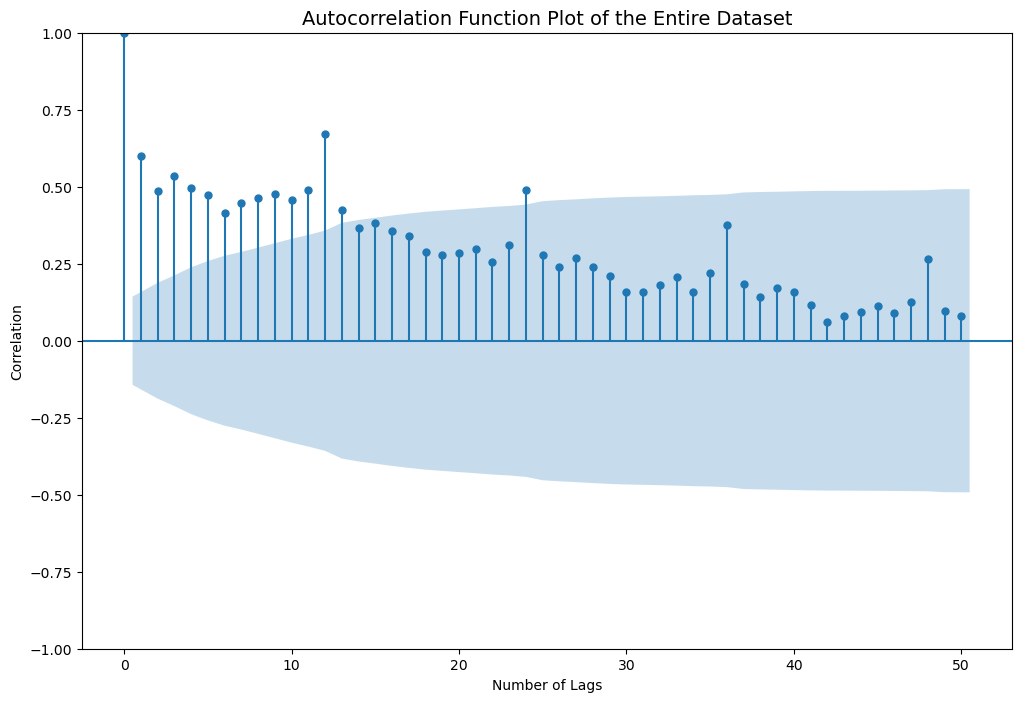

In [113]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

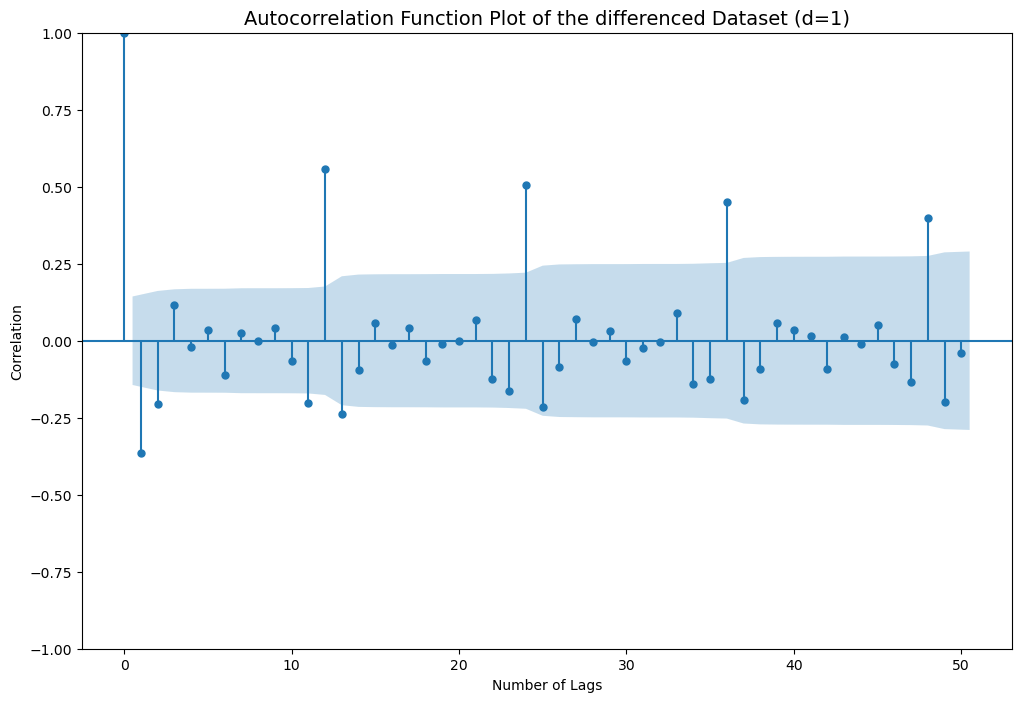

In [114]:
plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

### PACF plot

Text(0, 0.5, 'Correlation')

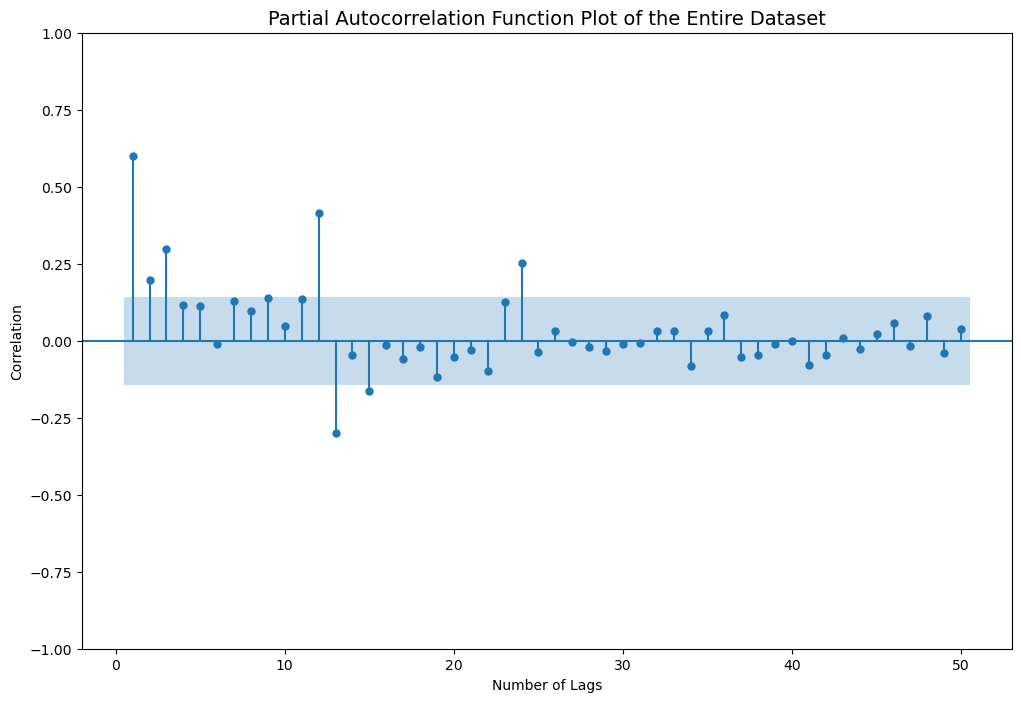

In [115]:
plot_pacf(df,zero=False,alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

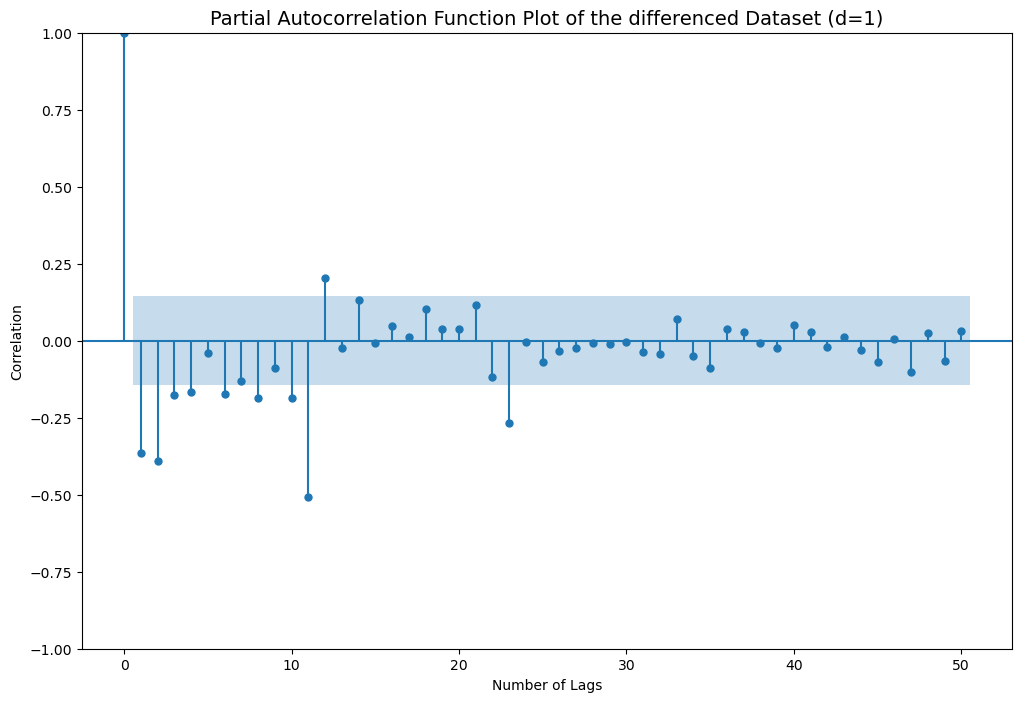

In [116]:
plot_pacf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Presence of seasonality found from the above plot.

In [117]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0

First few rows of Test Data


Rose
YearMonth        
1990-11-01  110.0
1990-12-01  132.0
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

### Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

Text(0, 0.5, 'Wine units sold')

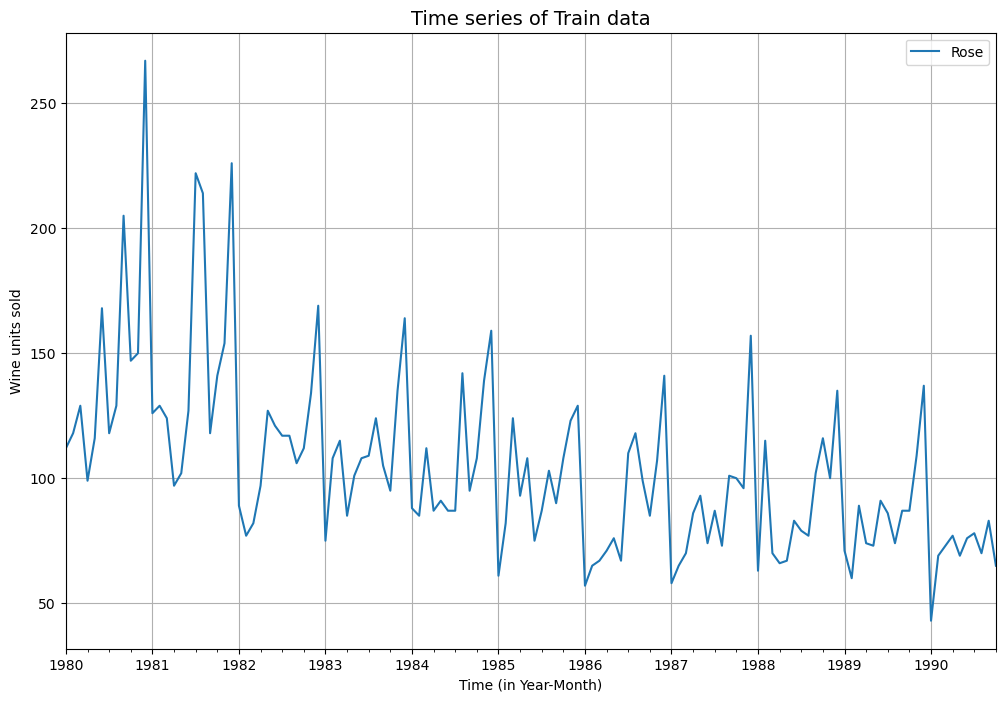

In [118]:
train.plot(grid=True);
plt.title('Time series of Train data', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [119]:
print('Results of Dicky-Fuller Test on Train data')
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data
DF test statistic is -1.837
DF test p-value is 0.6864098211412922
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [120]:
print('Results of Dicky-Fuller Test on Train data with differencing')
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data with differencing
DF test statistic is -6.629
DF test p-value is 9.593988791818688e-08
Number of lags used 12


Now, let us go ahead and plot the differenced training data.

Text(0, 0.5, 'Wine units sold')

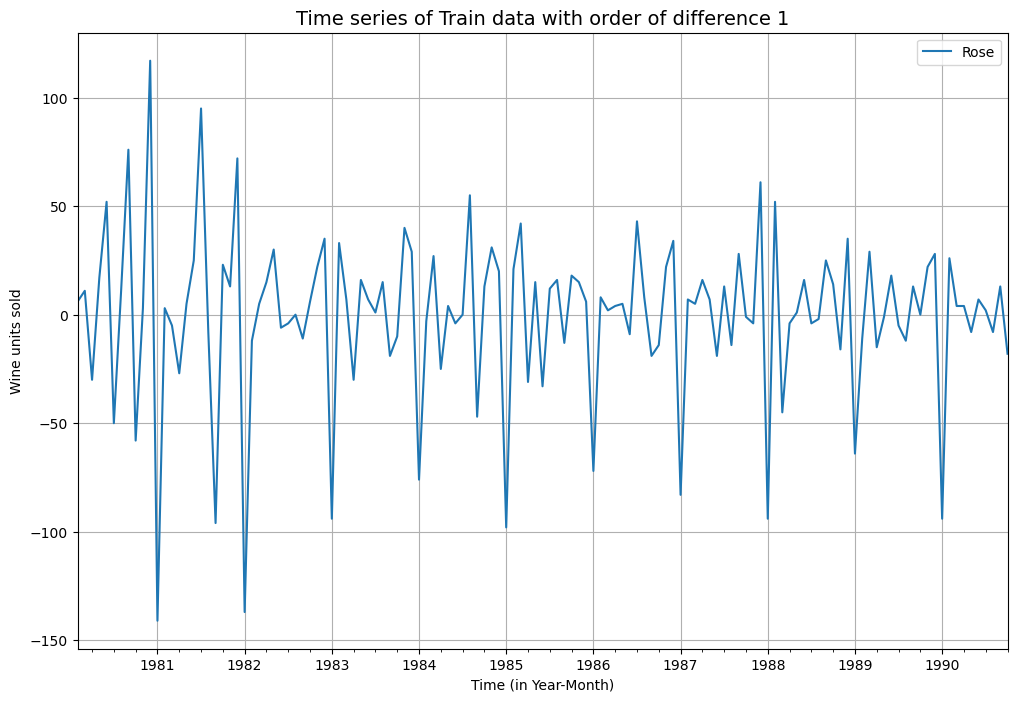

In [121]:
train.diff().dropna().plot(grid=True);
plt.title('Time series of Train data with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

## Build different ARIMA models

### ARIMA Model

In [122]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [123]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [124]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = pd.concat(
    [ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})],
    ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1313.1758613526429
ARIMA(0, 1, 1) - AIC:1261.3274438405808
ARIMA(0, 1, 2) - AIC:1259.2477803151237
ARIMA(0, 1, 3) - AIC:1260.1328188315786
ARIMA(0, 1, 4) - AIC:1261.2882323654271
ARIMA(1, 1, 0) - AIC:1297.0772943848615
ARIMA(1, 1, 1) - AIC:1260.0367627036055
ARIMA(1, 1, 2) - AIC:1259.4732049501204
ARIMA(1, 1, 3) - AIC:1261.4721912366276


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 4) - AIC:1259.187773565361
ARIMA(2, 1, 0) - AIC:1278.1352807484318
ARIMA(2, 1, 1) - AIC:1261.0140762916922
ARIMA(2, 1, 2) - AIC:1261.472000656906


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1258.119722760092


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 4) - AIC:1256.9235351115808
ARIMA(3, 1, 0) - AIC:1276.8427173909395
ARIMA(3, 1, 1) - AIC:1261.969097760944
ARIMA(3, 1, 2) - AIC:1263.33176710444


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:1258.4353016064729


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) - AIC:1263.791167401926
ARIMA(4, 1, 0) - AIC:1275.6764376351036
ARIMA(4, 1, 1) - AIC:1263.386892538002
ARIMA(4, 1, 2) - AIC:1265.330538097643


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) - AIC:1258.4359772931566
ARIMA(4, 1, 4) - AIC:1261.8801587631947


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
14  (2, 1, 4)  1256.923535
13  (2, 1, 3)  1258.119723
18  (3, 1, 3)  1258.435302
23  (4, 1, 3)  1258.435977
9   (1, 1, 4)  1259.187774

In [126]:
auto_ARIMA = ARIMA(train, order=(2,1,4))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -621.462
Date:                Sun, 17 Nov 2024   AIC                           1256.924
Time:                        12:36:15   BIC                           1276.942
Sample:                    01-01-1980   HQIC                          1265.058
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9906      0.038    -26.141      0.000      -1.065      -0.916
ar.L2         -0.9873      0.036    -27.339      0.000      -1.058      -0.917
ma.L1          0.3248      0.144      2.249      0.0

C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Diagnostics plot

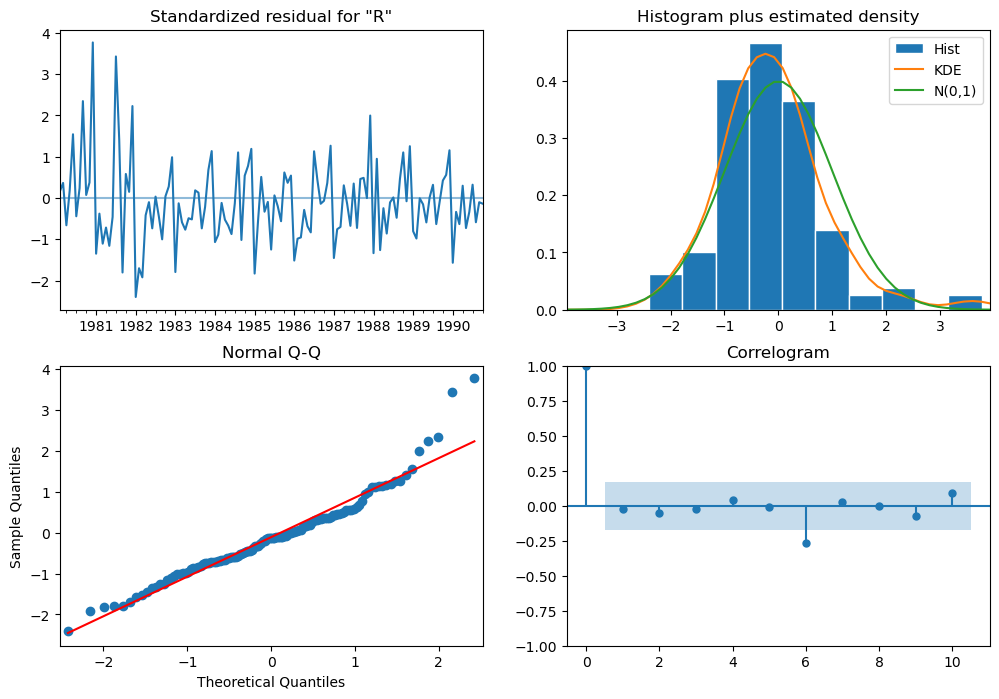

In [127]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [128]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [129]:
predicted_auto_ARIMA

1990-11-01    81.151333
1990-12-01    89.759226
1991-01-01    69.639482
1991-02-01    82.147603
1991-03-01    89.621993
1991-04-01    69.868642
1991-05-01    82.056096
1991-06-01    89.486384
1991-07-01    70.093318
1991-08-01    81.967428
1991-09-01    89.352389
1991-10-01    70.313592
1991-11-01    81.881527
1991-12-01    89.220001
1992-01-01    70.529544
1992-02-01    81.798321
1992-03-01    89.089209
1992-04-01    70.741252
1992-05-01    81.717743
1992-06-01    88.960004
1992-07-01    70.948794
1992-08-01    81.639724
1992-09-01    88.832378
1992-10-01    71.152246
1992-11-01    81.564198
1992-12-01    88.706320
1993-01-01    71.351683
1993-02-01    81.491102
1993-03-01    88.581820
1993-04-01    71.547178
1993-05-01    81.420372
1993-06-01    88.458868
1993-07-01    71.738803
1993-08-01    81.351946
1993-09-01    88.337453
1993-10-01    71.926630
1993-11-01    81.285765
1993-12-01    88.217565
1994-01-01    72.110728
1994-02-01    81.221770
1994-03-01    88.099194
1994-04-01    72

Text(0, 0.5, 'Wine Units Sold')

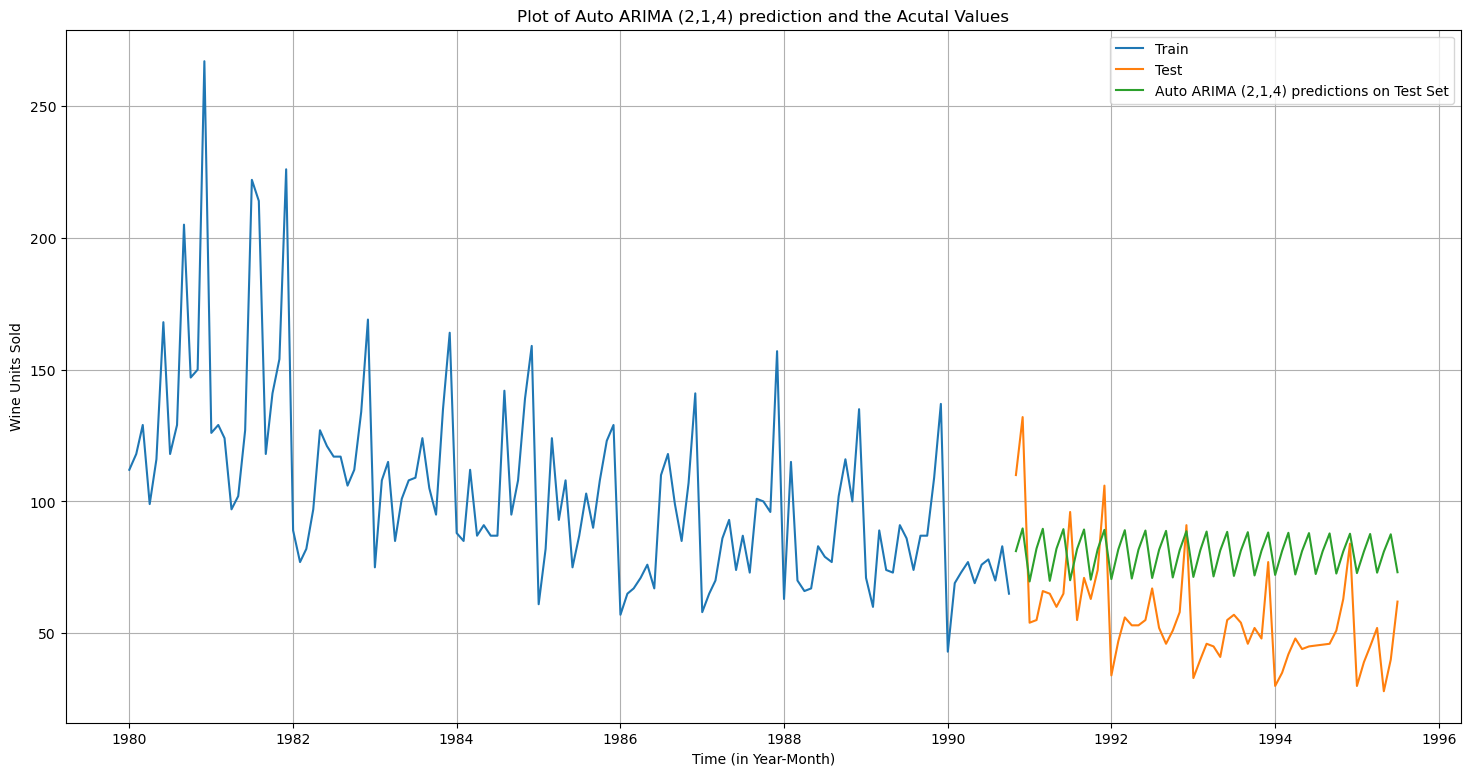

In [130]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (2,1,4) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (2,1,4) prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [131]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [132]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 31.15452801990538 
MAPE: 60.92411545222197


In [133]:
resultsDf_2 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto ARIMA (2,1,4)'])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,4)  31.154528  60.924115

## Manual ARIMA Model

Let us look at the ACF and the PACF plots once more.

### ACF plot

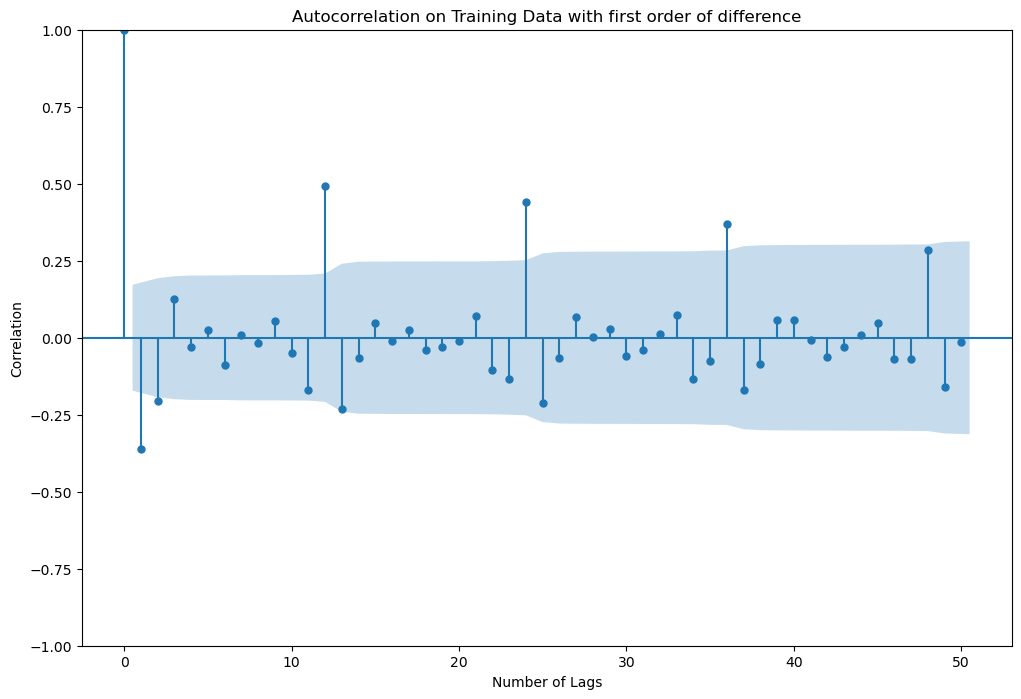

In [134]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

### PACF plot

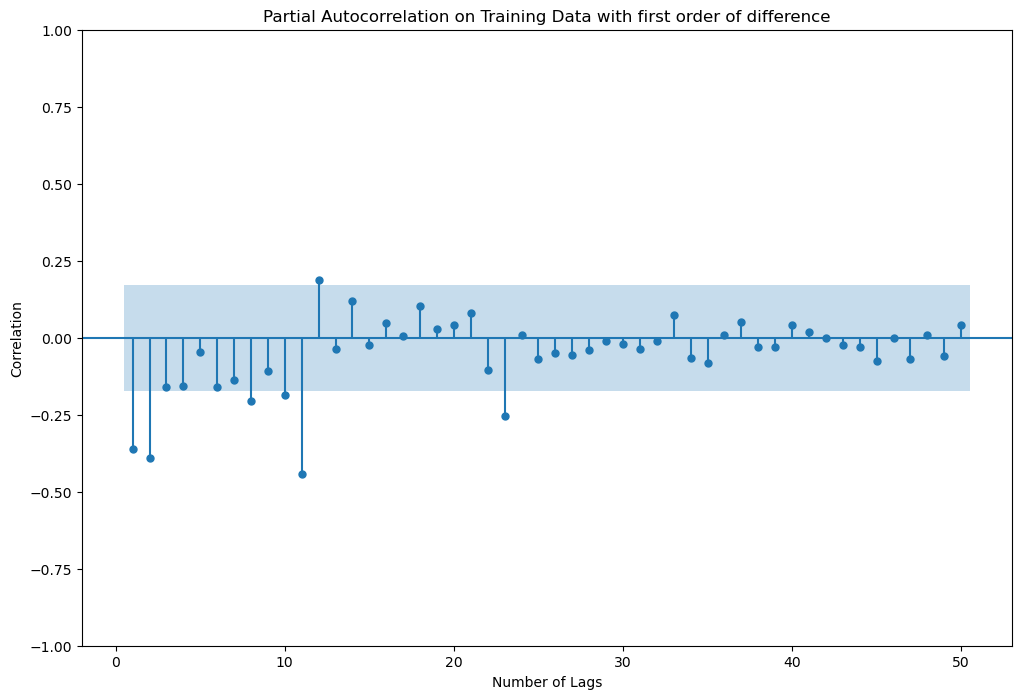

In [135]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag after which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [136]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -625.736
Date:                Sun, 17 Nov 2024   AIC                           1261.472
Time:                        12:36:17   BIC                           1275.771
Sample:                    01-01-1980   HQIC                          1267.282
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4622      0.483     -0.957      0.338      -1.409       0.484
ar.L2         -0.0039      0.169     -0.023      0.981      -0.335       0.327
ma.L1         -0.2523      0.473     -0.534      0.5

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


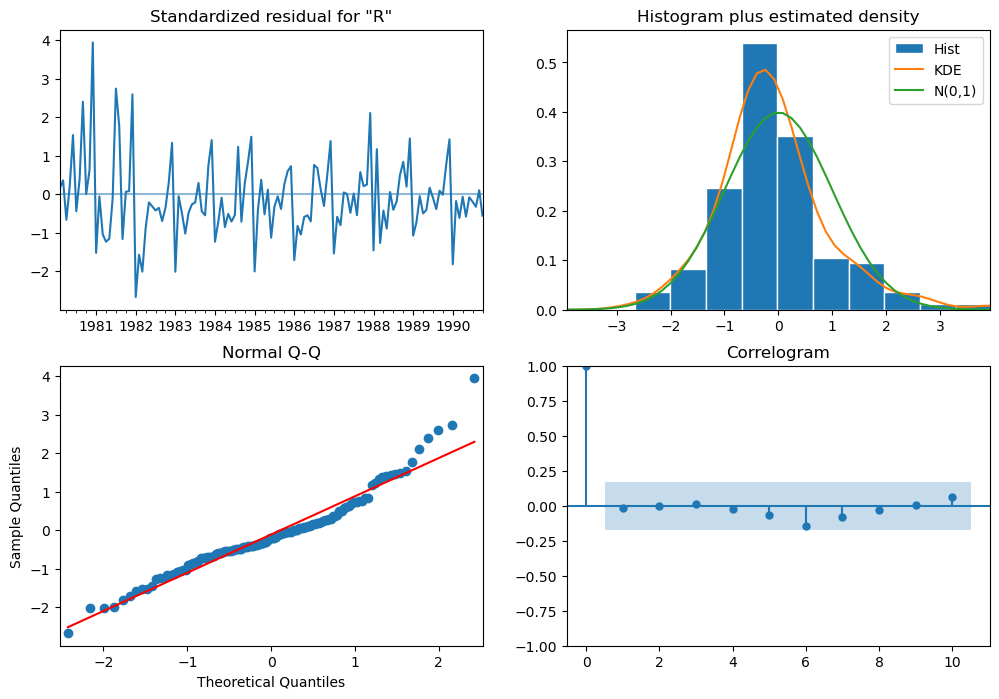

In [137]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [138]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [139]:
predicted_manual_ARIMA

1990-11-01    75.651058
1990-12-01    80.943795
1991-01-01    78.455468
1991-02-01    79.584872
1991-03-01    79.072595
1991-04-01    79.304952
1991-05-01    79.199560
1991-06-01    79.247363
1991-07-01    79.225681
1991-08-01    79.235516
1991-09-01    79.231055
1991-10-01    79.233078
1991-11-01    79.232160
1991-12-01    79.232577
1992-01-01    79.232388
1992-02-01    79.232473
1992-03-01    79.232435
1992-04-01    79.232452
1992-05-01    79.232444
1992-06-01    79.232448
1992-07-01    79.232446
1992-08-01    79.232447
1992-09-01    79.232447
1992-10-01    79.232447
1992-11-01    79.232447
1992-12-01    79.232447
1993-01-01    79.232447
1993-02-01    79.232447
1993-03-01    79.232447
1993-04-01    79.232447
1993-05-01    79.232447
1993-06-01    79.232447
1993-07-01    79.232447
1993-08-01    79.232447
1993-09-01    79.232447
1993-10-01    79.232447
1993-11-01    79.232447
1993-12-01    79.232447
1994-01-01    79.232447
1994-02-01    79.232447
1994-03-01    79.232447
1994-04-01    79

Text(0, 0.5, 'Wine Units Sold')

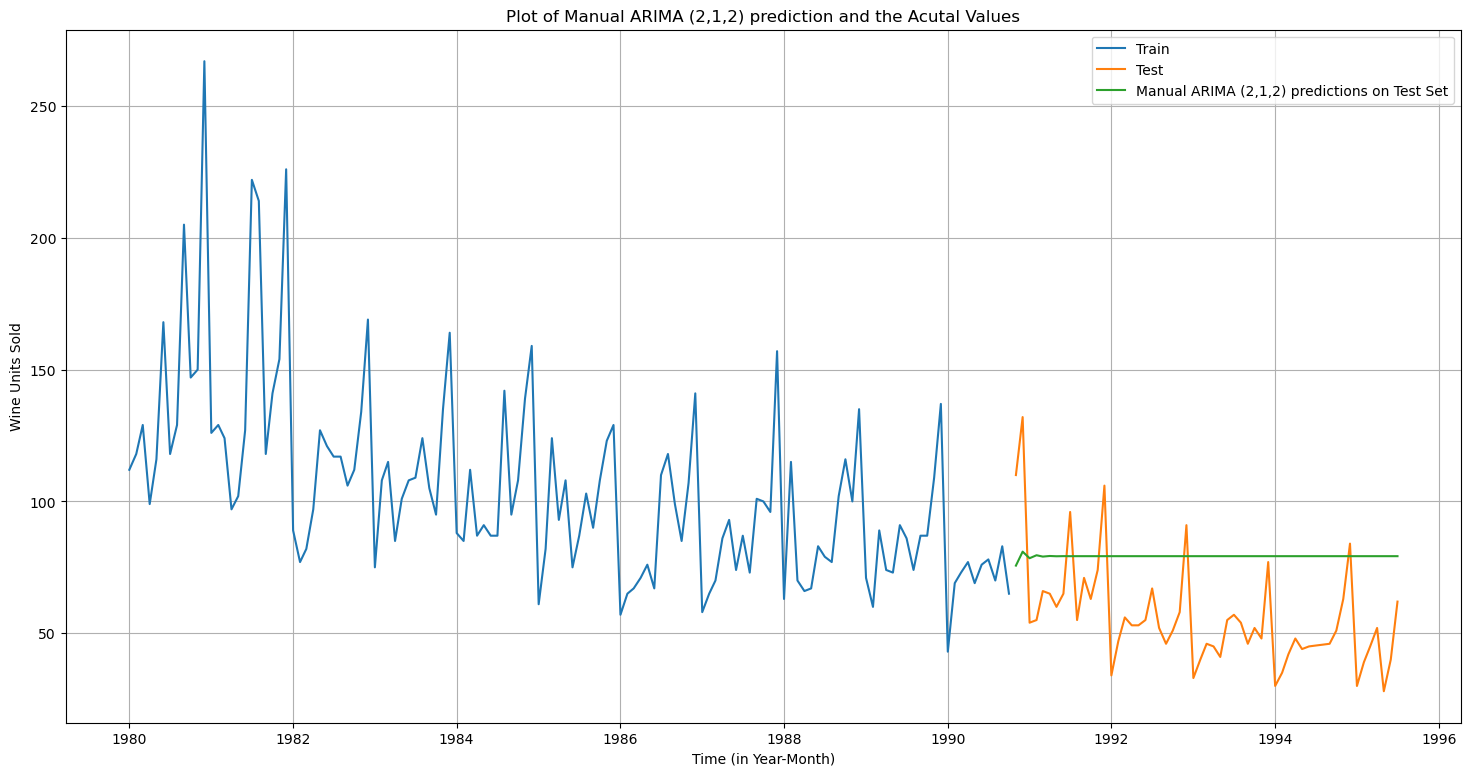

In [140]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,2) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [141]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 30.448609840075147 
MAPE: 60.26583908102812


In [142]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual ARIMA(2,1,2)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,4)   31.154528  60.924115
Manual ARIMA(2,1,2)  30.448610  60.265839

### Auto SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

Text(0, 0.5, 'Correlation')

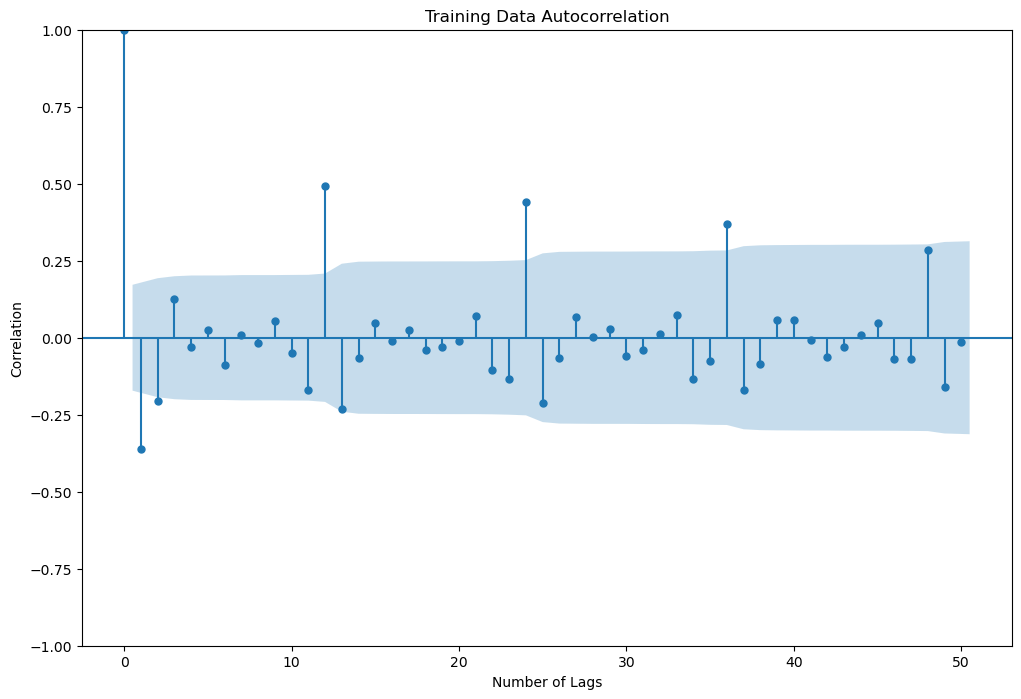

In [143]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50);
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

We can see that there is a seasonality.

In [144]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [145]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [146]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat(
    [SARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [results_SARIMA.aic]})],
    ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1127.0323185121972
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:956.4131665692063


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4199.5748443476405
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1121.3977282304234
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1097.1665795246658
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497228931


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3059.4441106880386
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:941.2946512703303
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.2558966541922
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.314888753376
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2828.401214385171
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:831.0722821380299
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:832.3080084283495
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:832.0124740236208


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3582.034566682664
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1242.5766056799905
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1079.9832204946526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:904.3132399734149


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3033.918821048067
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1078.2285176554694
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1035.72415102783
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:901.6481142950587


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:5620.353707676643
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:897.5837355743929
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:898.660799929484
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:884.3850768411555


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:381.0307351912382
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:782.4917036333671
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:784.3362961673644
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:784.6074076009324
SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:6472.777249376212
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1231.2314145388957
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1065.3891799670982
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:894.4419226275867
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2602.898573611055
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1071.6440642890707
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1026.7446561817692
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:888.1231053553299


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3073.4403663325616
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:895.8772183601797
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:897.3300959467175
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:871.0752383372533
SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:6426.553652532437
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:783.8634997333809
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:785.6996615676497
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:785.9427628586172
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:6402.279132439549
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1223.5270870467389
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1058.7971832230876
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:886.6590877674714


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:2598.7888569474453
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1072.0947396970384
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1016.3578370844382
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:879.5363967836253


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2638.484296546599
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:897.8710317778913
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:899.3065457373377
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:863.9856112293858


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:665.1651209524825
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:785.8098658515369
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:787.6847553919262
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:787.9281263180578
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:6317.8549128173745
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1287.8863498975584
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1117.0161467241537
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:943.5830348969487


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5272.660082113592
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1106.472067734699
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1086.836720038924
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:939.0945779695301
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:2684.514700714965
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:919.9038293902976
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:921.8570502213609
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:923.4855356966327


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:4213.022747584973
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:800.7724356261847
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:802.6249520166613
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:801.611350168543


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3672.7858705903254
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1241.630049257512
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1076.1592752570714
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:903.9456130482085


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:2865.3409616877425
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1066.1584467972755
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1035.7723005489643
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:899.5130609045391


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:2488.042345195399
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:888.7495145596783
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:890.3875310824907
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:883.6660397652518


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:1323.5418815284315
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:773.0759835148472
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:774.7195971867164
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:774.340807663976


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:1932.469931589938
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1231.5587519588028
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1067.384114920341
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:896.4380105285733


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3065.0419376024747
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1064.1976587127347
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1024.145572396458
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:890.0396977633567


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:2772.1003782025227
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:889.0946818949541
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:890.6421560102422
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:873.0038752169312


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:774.8082727871097
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:776.3223466790885
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:775.8265415153951
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:6401.586212893907
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1225.14617096012
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1055.5155422182208
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:888.4001932925502


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3223.639435336361
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1065.2688915638378
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1017.8034989725179
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:880.999157978377


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3505.5595251509258
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:891.6485048257807
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:893.3722248168115
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:863.6573101917913
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:776.7171770537553
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:778.3047432352852
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:777.5609386089241


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2477.767573968922
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1259.7833248707425
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1110.474174173973
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:938.0326522143497


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4965.66637080215
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1081.4099214593268
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1057.6713554218766
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:932.3204745301116
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:5688.537417218281
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:905.5948860010906
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:907.2330623206933
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:909.1483851063538


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3806.5811422238894
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:787.8757889340848
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:789.8349118801268
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:788.763134249982


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3817.792246927129
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1242.7200244071116
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1075.99997146587
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:904.0090522248648
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3358.7399983267887
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1054.3659020717967
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1034.3832672135718
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:899.812543464295


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2914.6305543470953
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:879.7923634513123
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:881.2073386963305
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:882.9435022270106
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:6484.003389703138
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:769.2541465915483
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:771.2250273352238
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:770.6350805062992


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1233.5045954992488
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1065.639334733952
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:897.3204210323169


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3137.7879771265316
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1056.251545054025
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1033.4079802259816
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:890.6376679127738


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:5552.74123759878
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:880.763857202637
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:882.1078735147187
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:874.2139603524289


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:769.1438062016728
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:771.8473857088054
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:770.8053224150354


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1217.551806242382
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1048.8321726341405
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:889.2419857920912


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:2798.0610417023254
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1056.8557113156394
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1003.8048296477288
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:874.6084328213577


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:5544.374195491755
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:876.767989569426
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:878.476125917994
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:863.2587353998682
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:765.7359472111317
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:763.4572295510548
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:768.6736390383038
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:24.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1249.1878085997314
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1100.8878284926054
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:933.212737045709


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5674.840233467225
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1062.430661035907
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1046.4411852698329
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:925.3556220938392


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3143.03739676059
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:891.275064309453
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:892.8195034143744
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:894.8138025766236


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:4069.570354723479
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:778.3323693341604
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:777.6231501874898
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:777.1795266498634


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:6365.651170623568
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1234.5722096834077
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1077.419208478326
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:904.7800651173378


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3287.0396364907674
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1047.5829905877904
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1027.5308356483583
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:899.5021876947347


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2919.550589152728
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:870.7036768809618
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:872.036540806204
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:873.758934432554
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:6506.102945884855
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:759.3949795264904
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:759.5878775017131
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:758.3995418904295


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2857.180597933074
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1235.5410743661826
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1065.4856559316659
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:898.7041182407102


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:2412.293952468777
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1049.5280921168794
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1027.7075111910094
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:892.9644094990439


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2165.2999005004885
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:872.7047827226112
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:874.0364724770317
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:880.4497980082064
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3297.2427843037294
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:761.2461926506509
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:760.5556951294286
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:759.0070339226598
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3352.6780954341057
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1219.4476124553557
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1043.296153645811
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:890.4235542210254


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3158.4231340988536
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1050.5581852853295
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1021.4019985038537
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:871.3224052367698


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2933.174895785224
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:867.425253745479
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:869.3710964923076
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:863.142810208442


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:93.57951258076915
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:759.0602656476103
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:759.9556003686826
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:761.8529181562867
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:26.0


C:\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [147]:
SARIMA_AIC.sort_values(by=['AIC']).head(50)

param seasonal         AIC
107  (1, 1, 2)      NaN   18.000000
171  (2, 1, 2)      NaN   20.000000
159  (2, 1, 1)      NaN   20.000000
123  (1, 1, 3)      NaN   20.000000
175  (2, 1, 2)      NaN   22.000000
187  (2, 1, 3)      NaN   22.000000
191  (2, 1, 3)      NaN   24.000000
255  (3, 1, 3)      NaN   26.000000
251  (3, 1, 3)      NaN   93.579513
27   (0, 1, 1)      NaN  381.030735
59   (0, 1, 3)      NaN  665.165121
222  (3, 1, 1)      NaN  758.399542
238  (3, 1, 2)      NaN  759.007034
252  (3, 1, 3)      NaN  759.060266
220  (3, 1, 1)      NaN  759.394980
221  (3, 1, 1)      NaN  759.587878
253  (3, 1, 3)      NaN  759.955600
237  (3, 1, 2)      NaN  760.555695
236  (3, 1, 2)      NaN  761.246193
254  (3, 1, 3)      NaN  761.852918
189  (2, 1, 3)      NaN  763.457230
188  (2, 1, 3)      NaN  765.735947
190  (2, 1, 3)      NaN  768.673639
172  (2, 1, 2)      NaN  769.143806
156  (2, 1, 1)      NaN  769.254147
158  (2, 1, 1)      NaN  770.635081
174  (2, 1, 2)      NaN  770.805322
157  (2, 1, 1)      NaN  771.225027
173  (2, 1, 2)      NaN  771.847386
92   (1, 1, 1)      NaN  773.075984
94   (1, 1, 1)      NaN  774.340808
93   (1, 1, 1)      NaN  774.719597
108  (1, 1, 2)      NaN  774.808273
110  (1, 1, 2)      NaN  775.826542
109  (1, 1, 2)      NaN  776.322347
124  (1, 1, 3)      NaN  776.717177
206  (3, 1, 0)      NaN  777.179527
126  (1, 1, 3)      NaN  777.560939
205  (3, 1, 0)      NaN  777.623150
125  (1, 1, 3)      NaN  778.304743
204  (3, 1, 0)      NaN  778.332369
28   (0, 1, 1)      NaN  782.491704
44   (0, 1, 2)      NaN  783.863500
29   (0, 1, 1)      NaN  784.336296
30   (0, 1, 1)      NaN  784.607408
45   (0, 1, 2)      NaN  785.699662
60   (0, 1, 3)      NaN  785.809866
46   (0, 1, 2)      NaN  785.942763
61   (0, 1, 3)      NaN  787.684755
140  (2, 1, 0)      NaN  787.875789

In [148]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  130
Model:             SARIMAX(0, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -385.304
Date:                                 Sun, 17 Nov 2024   AIC                            784.607
Time:                                         12:39:22   BIC                            802.336
Sample:                                     01-01-1980   HQIC                           791.766
                                          - 10-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0243      0.083    -12.338      0.000      -1.187      -0

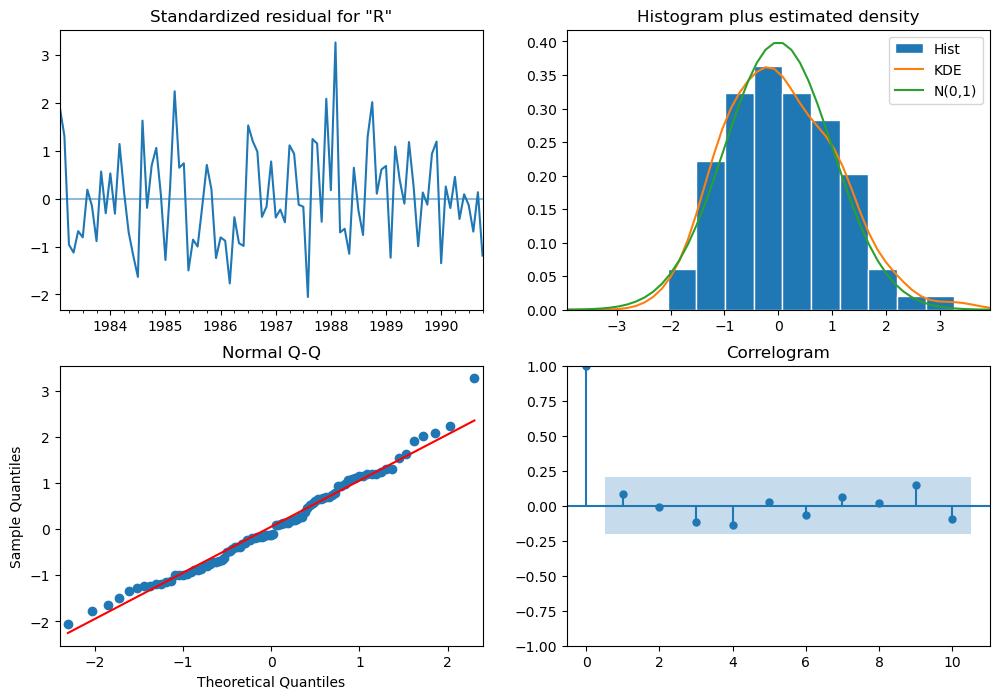

In [149]:
results_auto_SARIMA.plot_diagnostics();
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [150]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [151]:
predicted_auto_SARIMA.predicted_mean

1990-11-01     92.859023
1990-12-01    117.795973
1991-01-01     54.176378
1991-02-01     69.562105
1991-03-01     69.209517
1991-04-01     67.423716
1991-05-01     68.867796
1991-06-01     70.233857
1991-07-01     74.634237
1991-08-01     74.585122
1991-09-01     78.718159
1991-10-01     76.718947
1991-11-01     86.964669
1991-12-01    109.491914
1992-01-01     56.041100
1992-02-01     64.778533
1992-03-01     68.383232
1992-04-01     64.747829
1992-05-01     67.076697
1992-06-01     68.830221
1992-07-01     72.371500
1992-08-01     72.001039
1992-09-01     75.212401
1992-10-01     75.259210
1992-11-01     84.216146
1992-12-01    104.954815
1993-01-01     53.163720
1993-02-01     63.023043
1993-03-01     65.779426
1993-04-01     63.335863
1993-05-01     64.534297
1993-06-01     66.436428
1993-07-01     69.576639
1993-08-01     68.720134
1993-09-01     72.414787
1993-10-01     70.869837
1993-11-01     80.396310
1993-12-01     99.374004
1994-01-01     52.221220
1994-02-01     61.266137


Text(0, 0.5, 'Wine Units Sold')

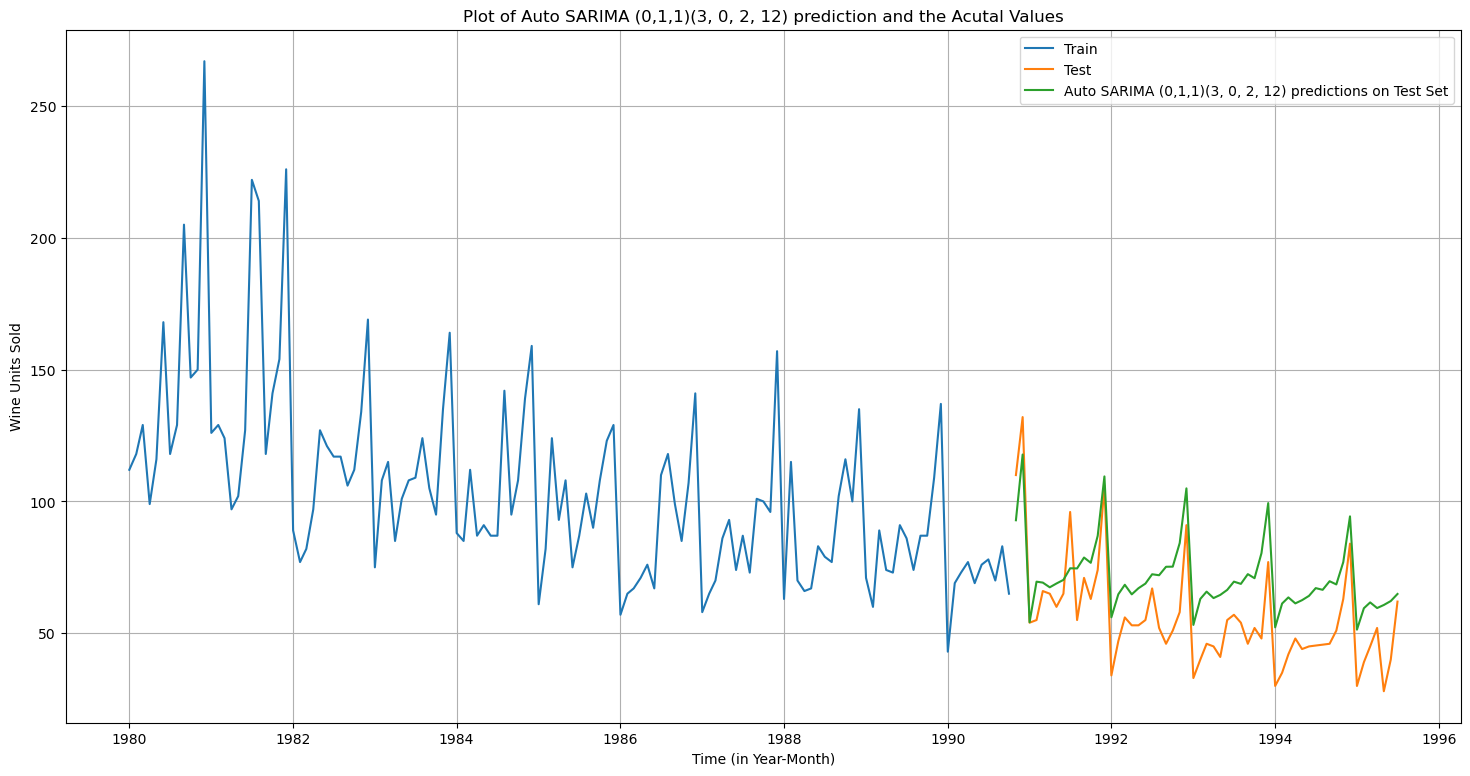

In [152]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (0,1,1)(3, 0, 2, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (0,1,1)(3, 0, 2, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [153]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose              mean    mean_se  mean_ci_lower  mean_ci_upper
1990-11-01   92.859023  14.514846      64.410447     121.307599
1990-12-01  117.795973  14.518897      89.339458     146.252488
1991-01-01   54.176378  14.522924      25.711970      82.640787
1991-02-01   69.562105  14.526979      41.089750      98.034459
1991-03-01   69.209517  14.531036      40.729210      97.689824

In [154]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.287570169793984 
MAPE: 35.30270091722601


In [155]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto SARIMA (0,1,1)(3, 0, 2, 12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2


Test RMSE       MAPE
Auto ARIMA (2,1,4)                31.154528  60.924115
Manual ARIMA(2,1,2)               30.448610  60.265839
Auto SARIMA (0,1,1)(3, 0, 2, 12)  18.287570  35.302701

## Manual SARIMA Model

Let us look at the ACF and the PACF plots once more.

### ACF plot

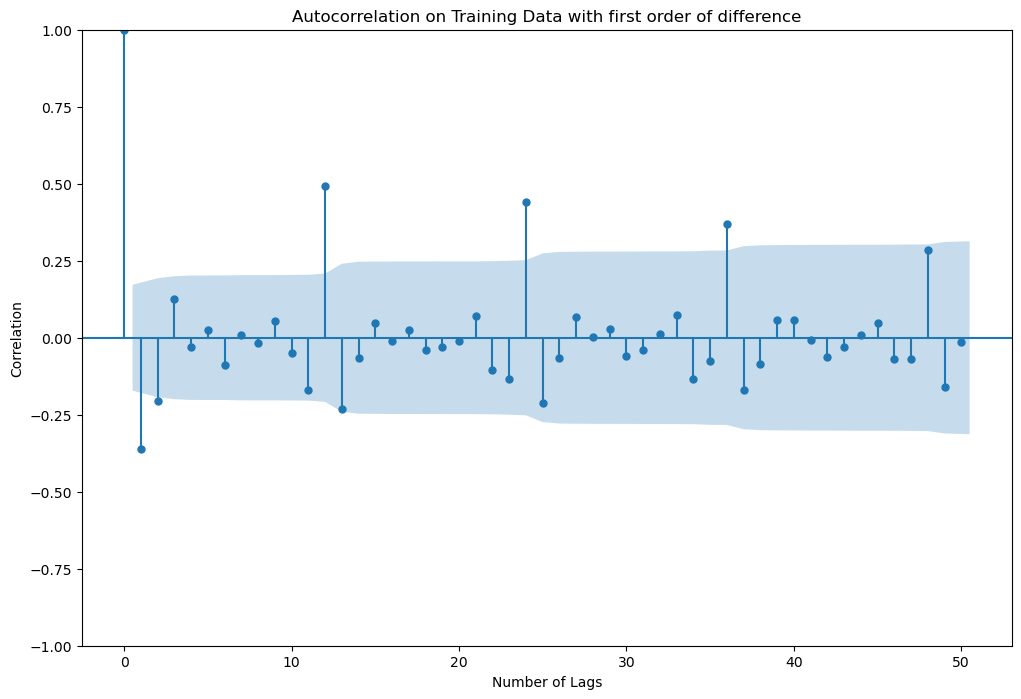

In [156]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

### PACF plot

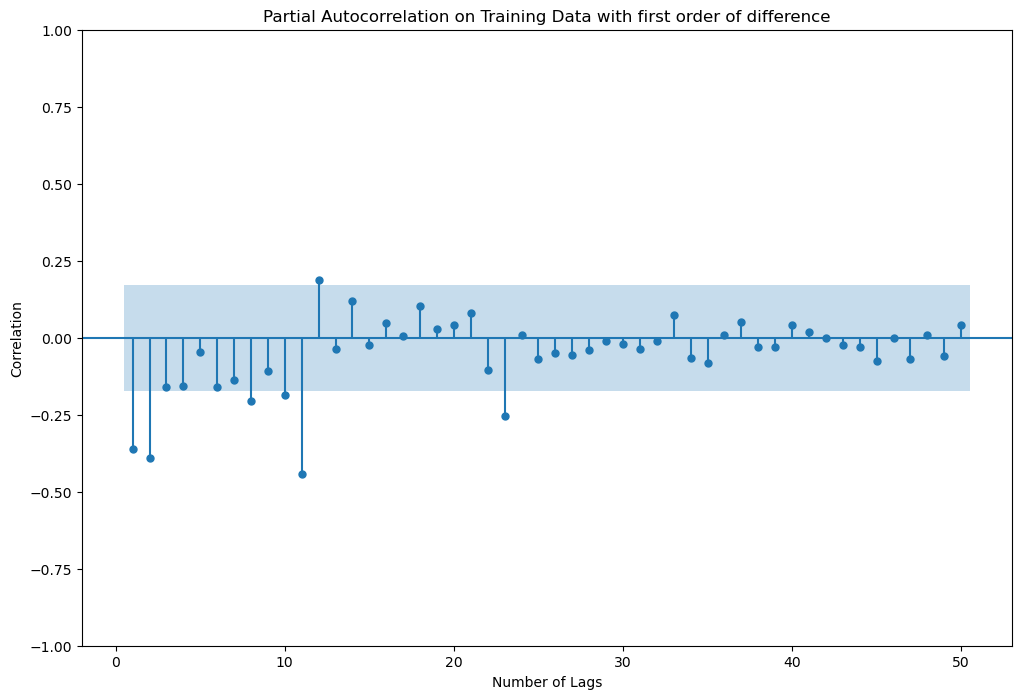

In [157]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Text(0, 0.5, 'Units Sold')

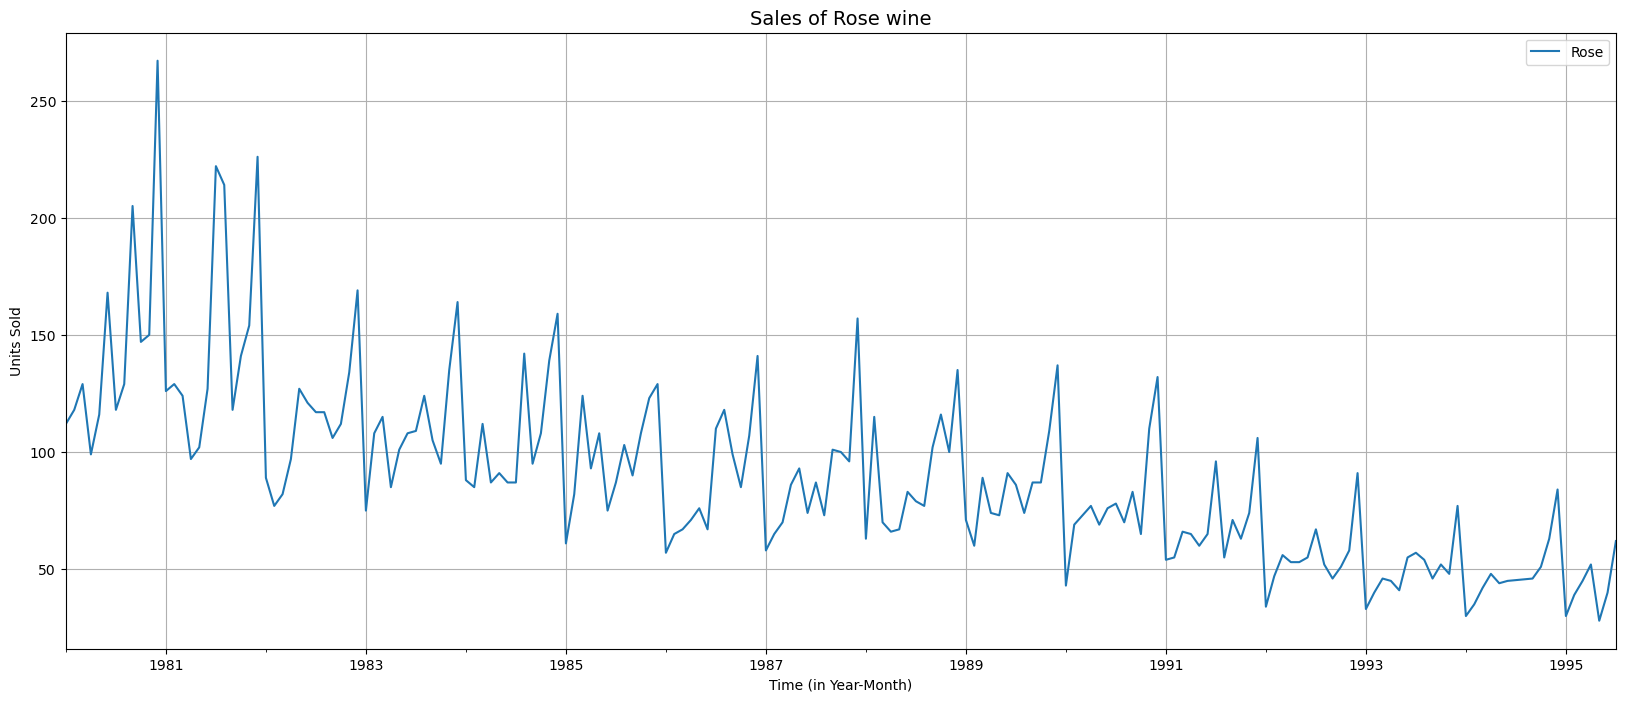

In [158]:
#Original Time Series
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

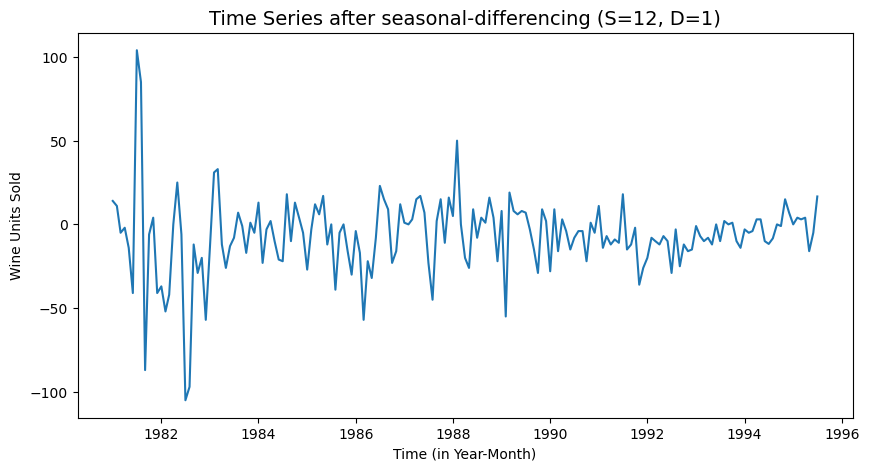

In [159]:
#Time series with seasonal differencing (S=12, D=1)
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())
plt.title ('Time Series after seasonal-differencing (S=12, D=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

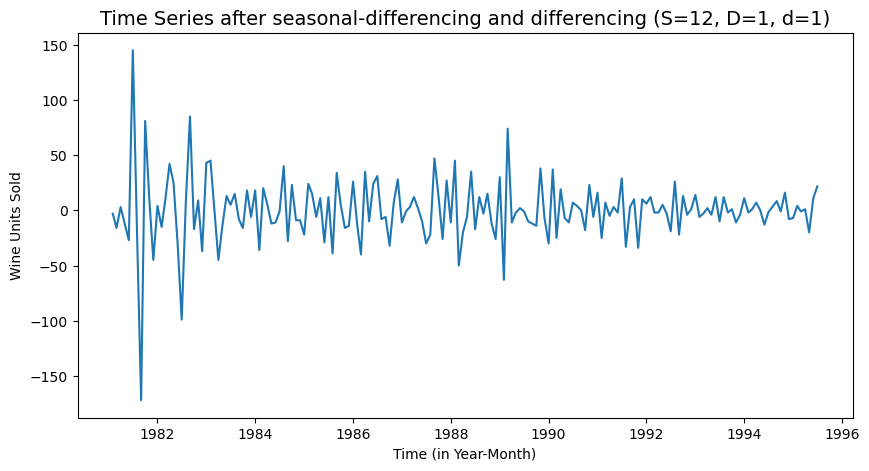

In [160]:
#Time series with seasonal differencing followed by normal differencing (S=12, D=1, d=1)
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())
plt.title ('Time Series after seasonal-differencing and differencing (S=12, D=1, d=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

In [161]:
#Testing stationarity
dftest = adfuller((df['Rose'].diff(12).dropna()).diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.551
DF test p-value is 0.0012457501217352787
Number of lags used 11


Let us look at the ACF and the PACF plots once more with seasonal and normal differencing on train data

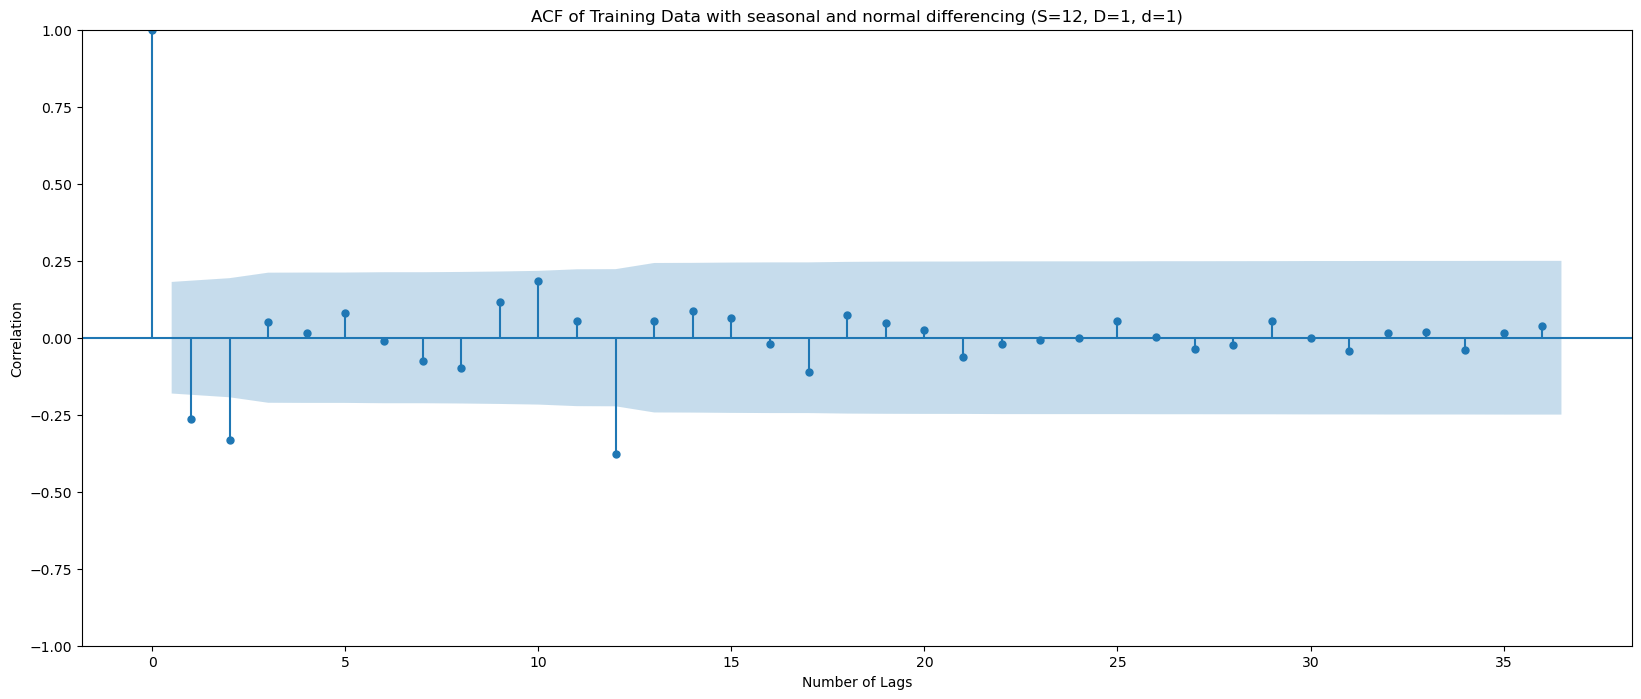

In [162]:
plot_acf((train['Rose'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

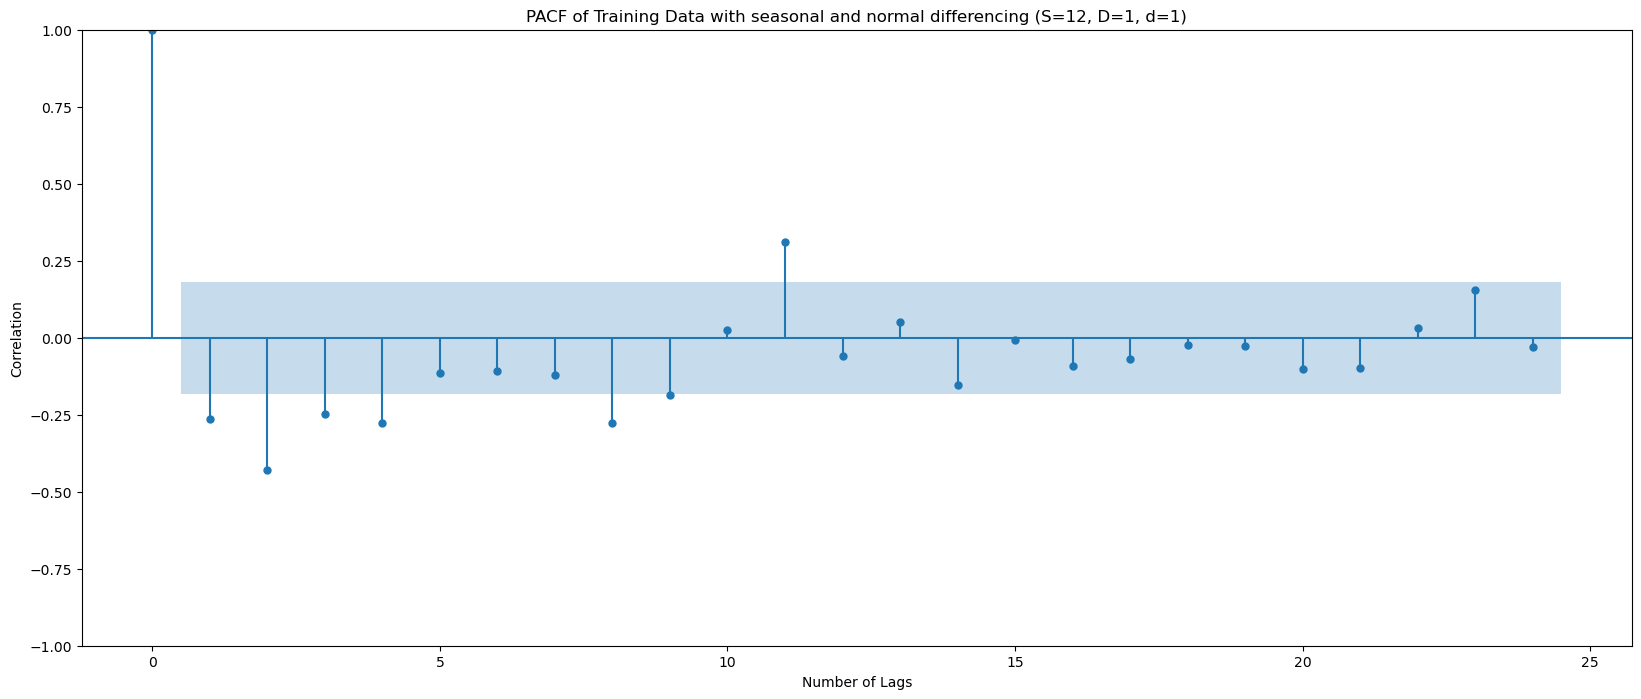

In [163]:
plot_pacf((train['Rose'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=24)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

- Here we have taken alpha = 0.05 and seasonal period as 12.


- From the PACF plot it can be seen that till lag 4 is significant before cut-off, so AR term ‘p = 4’ is chosen. At seasonal lag of 12, it cuts off, so keep seasonal AR ‘P = 0’.


- From ACF plot, lag 1 and 2 are significant before it cuts off, so lets keep MA term ‘q = 2’ and at seasonal lag of 12, a significant lag is apparent and no seaonal lags are apparent at lags 24, 36 or afterwards, so lets keep ‘Q = 1'.


- The final selected terms for SARIMA model is (4, 1, 2)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

In [164]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  130
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -438.007
Date:                              Sun, 17 Nov 2024   AIC                            892.013
Time:                                      12:39:25   BIC                            913.013
Sample:                                  01-01-1980   HQIC                           900.517
                                       - 10-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7924      0.121     -6.563      0.000      -1.029      -0.556
ar.L2          0.04

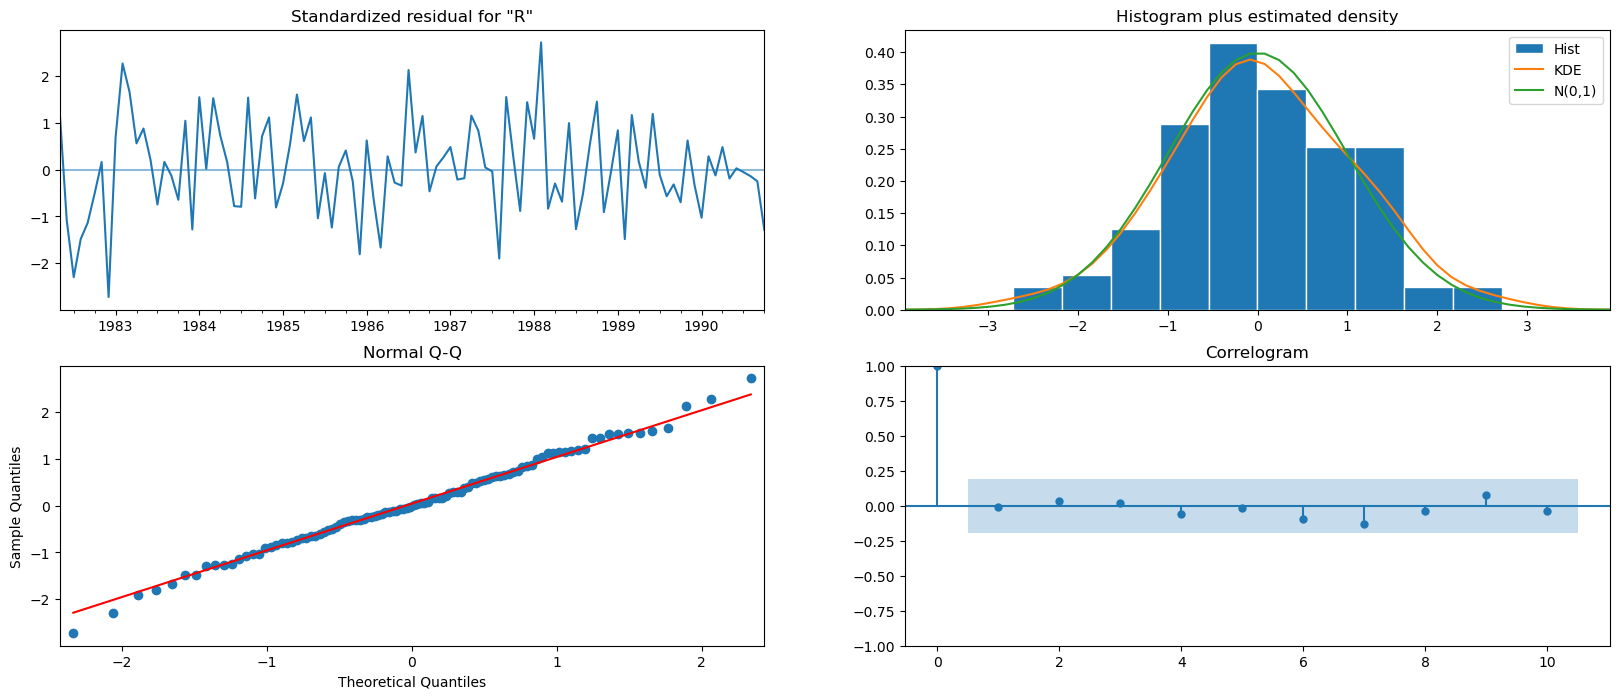

In [165]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [166]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [167]:
predicted_manual_SARIMA.predicted_mean

1990-11-01     92.134629
1990-12-01    130.259606
1991-01-01     47.676593
1991-02-01     63.236948
1991-03-01     65.360406
1991-04-01     63.687863
1991-05-01     60.607471
1991-06-01     69.621322
1991-07-01     70.888601
1991-08-01     65.036039
1991-09-01     76.988306
1991-10-01     71.019545
1991-11-01     87.888531
1991-12-01    124.356867
1992-01-01     39.987477
1992-02-01     57.052838
1992-03-01     60.211551
1992-04-01     58.516760
1992-05-01     55.481043
1992-06-01     63.933654
1992-07-01     65.459367
1992-08-01     59.370210
1992-09-01     71.645309
1992-10-01     65.454158
1992-11-01     82.521334
1992-12-01    118.790850
1993-01-01     34.579938
1993-02-01     51.505673
1993-03-01     54.791916
1993-04-01     52.989639
1993-05-01     50.048085
1993-06-01     58.417319
1993-07-01     60.014805
1993-08-01     53.862944
1993-09-01     66.192989
1993-10-01     59.954164
1993-11-01     77.062937
1993-12-01    113.296131
1994-01-01     29.116826
1994-02-01     46.014999


Text(0, 0.5, 'Wine Units Sold')

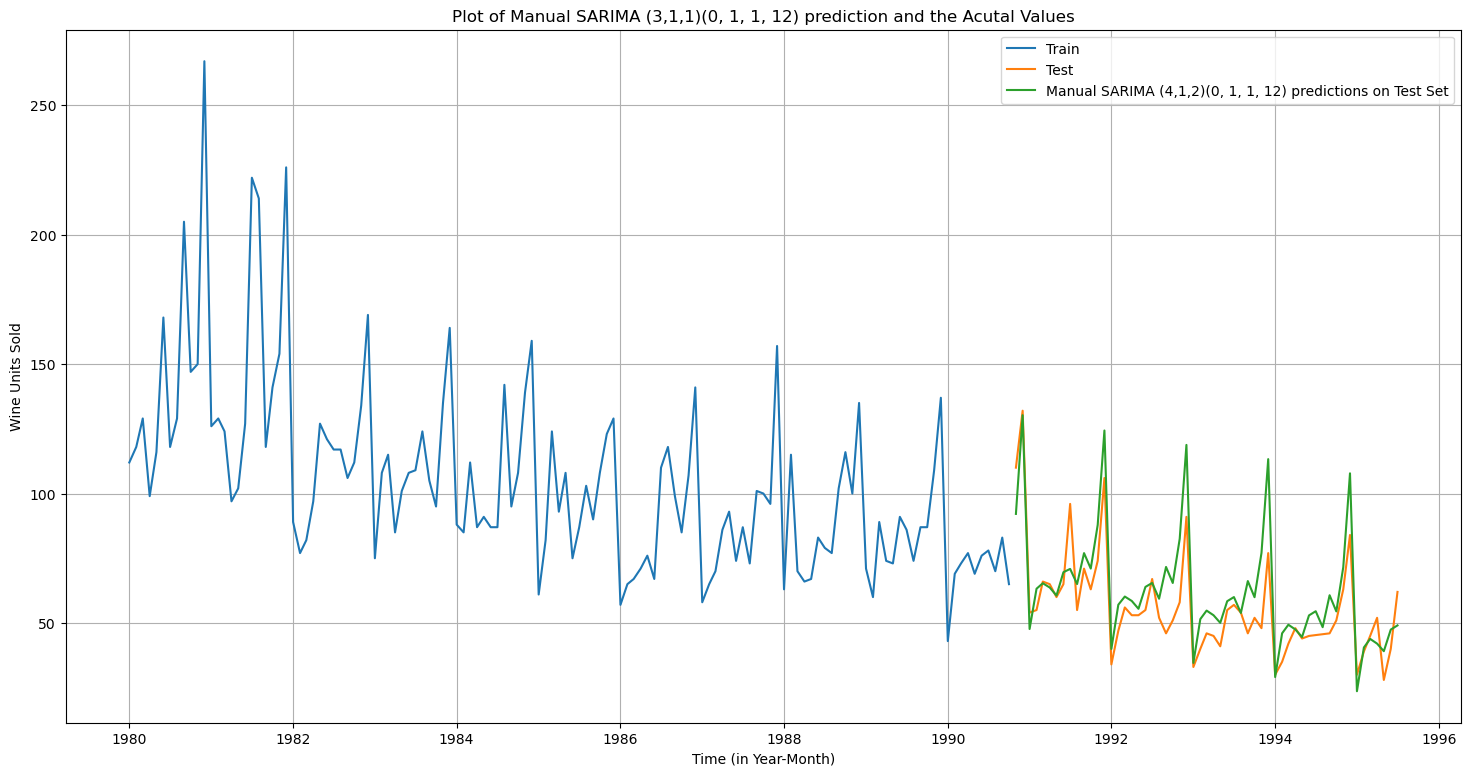

In [168]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (3,1,1)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [169]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 12.625446085422606 
MAPE: 17.26837893363303


In [170]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,4)                    31.154528  60.924115
Manual ARIMA(2,1,2)                   30.448610  60.265839
Auto SARIMA (0,1,1)(3, 0, 2, 12)      18.287570  35.302701
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)  12.625446  17.268379

## Performance of the models built

In [171]:
#Combining the tables which contained the exponential smoothing models and ARIMA/SARIMA into one
resultsDf_Final = pd.concat([resultsDf,resultsDf_2])

resultsDf_Final

Test RMSE       MAPE
Linear Regression                                   17.355804        NaN
SimpleAverageModel                                  52.412291        NaN
2pointTrailingMovingAverage                         11.801043        NaN
4pointTrailingMovingAverage                         15.367244        NaN
6pointTrailingMovingAverage                         15.862398        NaN
9pointTrailingMovingAverage                         16.341947        NaN
Alpha=0.127,SimpleExponentialSmoothing              29.223870        NaN
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736        NaN
Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponen...  15.273169        NaN
Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponenti...   8.377119        NaN
Auto ARIMA (2,1,4)                                  31.154528  60.924115
Manual ARIMA(2,1,2)                                 30.448610  60.265839
Auto SARIMA (0,1,1)(3, 0, 2, 12)                    18.287570  35.302701
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                12.625446  17.268379

In [172]:
resultsDf_Final.sort_values(by='MAPE',ascending=True)

Test RMSE       MAPE
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                12.625446  17.268379
Auto SARIMA (0,1,1)(3, 0, 2, 12)                    18.287570  35.302701
Manual ARIMA(2,1,2)                                 30.448610  60.265839
Auto ARIMA (2,1,4)                                  31.154528  60.924115
Linear Regression                                   17.355804        NaN
SimpleAverageModel                                  52.412291        NaN
2pointTrailingMovingAverage                         11.801043        NaN
4pointTrailingMovingAverage                         15.367244        NaN
6pointTrailingMovingAverage                         15.862398        NaN
9pointTrailingMovingAverage                         16.341947        NaN
Alpha=0.127,SimpleExponentialSmoothing              29.223870        NaN
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736        NaN
Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponen...  15.273169        NaN
Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponenti...   8.377119        NaN

In [173]:
resultsDf_Final.sort_values(by='Test RMSE',ascending=True)

Test RMSE       MAPE
Alpha=0.1,Beta=0.25,Gamma=0.85,Triple Exponenti...   8.377119        NaN
2pointTrailingMovingAverage                         11.801043        NaN
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                12.625446  17.268379
Alpha=0.062,Beta=0.018,Gamma=0.0,Triple Exponen...  15.273169        NaN
4pointTrailingMovingAverage                         15.367244        NaN
6pointTrailingMovingAverage                         15.862398        NaN
9pointTrailingMovingAverage                         16.341947        NaN
Alpha=1.49e-08, Beta=7.75e-11, Double Exponenti...  17.355736        NaN
Linear Regression                                   17.355804        NaN
Auto SARIMA (0,1,1)(3, 0, 2, 12)                    18.287570  35.302701
Alpha=0.127,SimpleExponentialSmoothing              29.223870        NaN
Manual ARIMA(2,1,2)                                 30.448610  60.265839
Auto ARIMA (2,1,4)                                  31.154528  60.924115
SimpleAverageModel                                  52.412291        NaN

### Compare the performance of the models

From the above results we can see that Triple exponential model is the optimum model followed by Trailing moving average models. However lets take TES and Manual SARIMA and predict for the future.

Text(0, 0.5, 'Wine Units Sold')

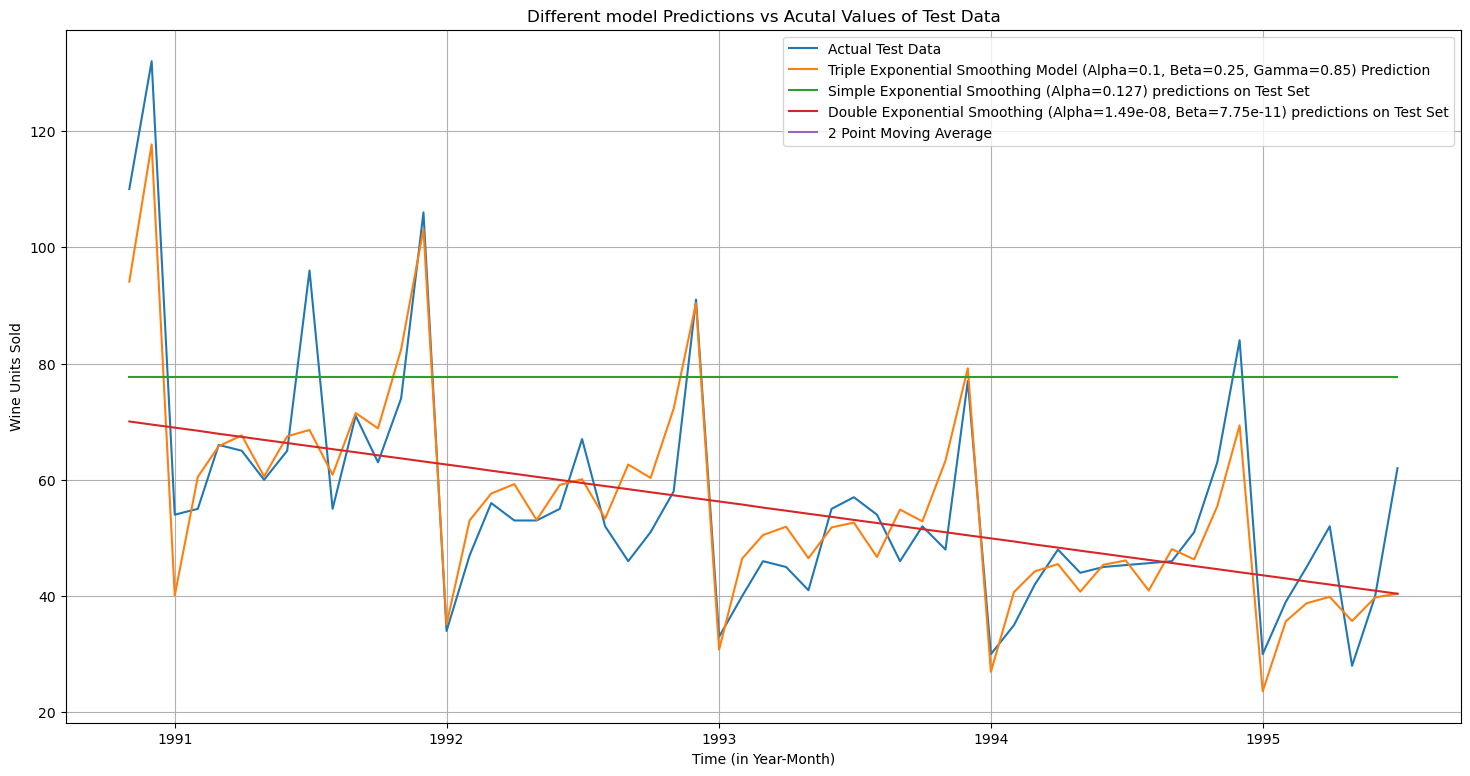

In [174]:
## Plotting on training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Triple Exponential Smoothing Model (Alpha=0.1, Beta=0.25, Gamma=0.85) Prediction')

plt.plot(SES_test['predict'], label='Simple Exponential Smoothing (Alpha=0.127) predictions on Test Set')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=1.49e-08, Beta=7.75e-11) predictions on Test Set')

plt.plot(MovingAverage['Trailing_2'][-1:len(test)], label='2 Point Moving Average')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

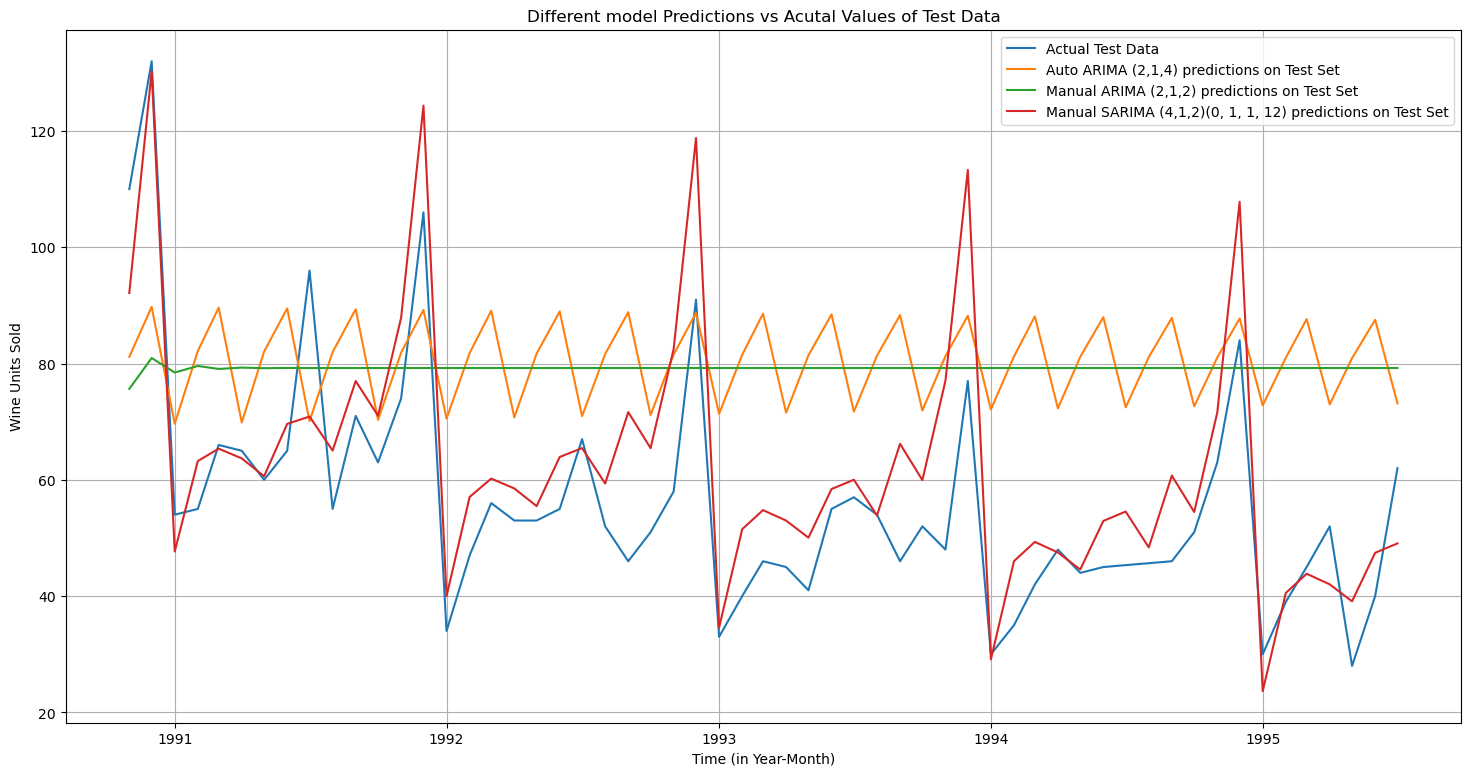

In [175]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (2,1,4) predictions on Test Set')

#plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (4, 1, 2)(0, 1, 1, 12) predictions on Test Set')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

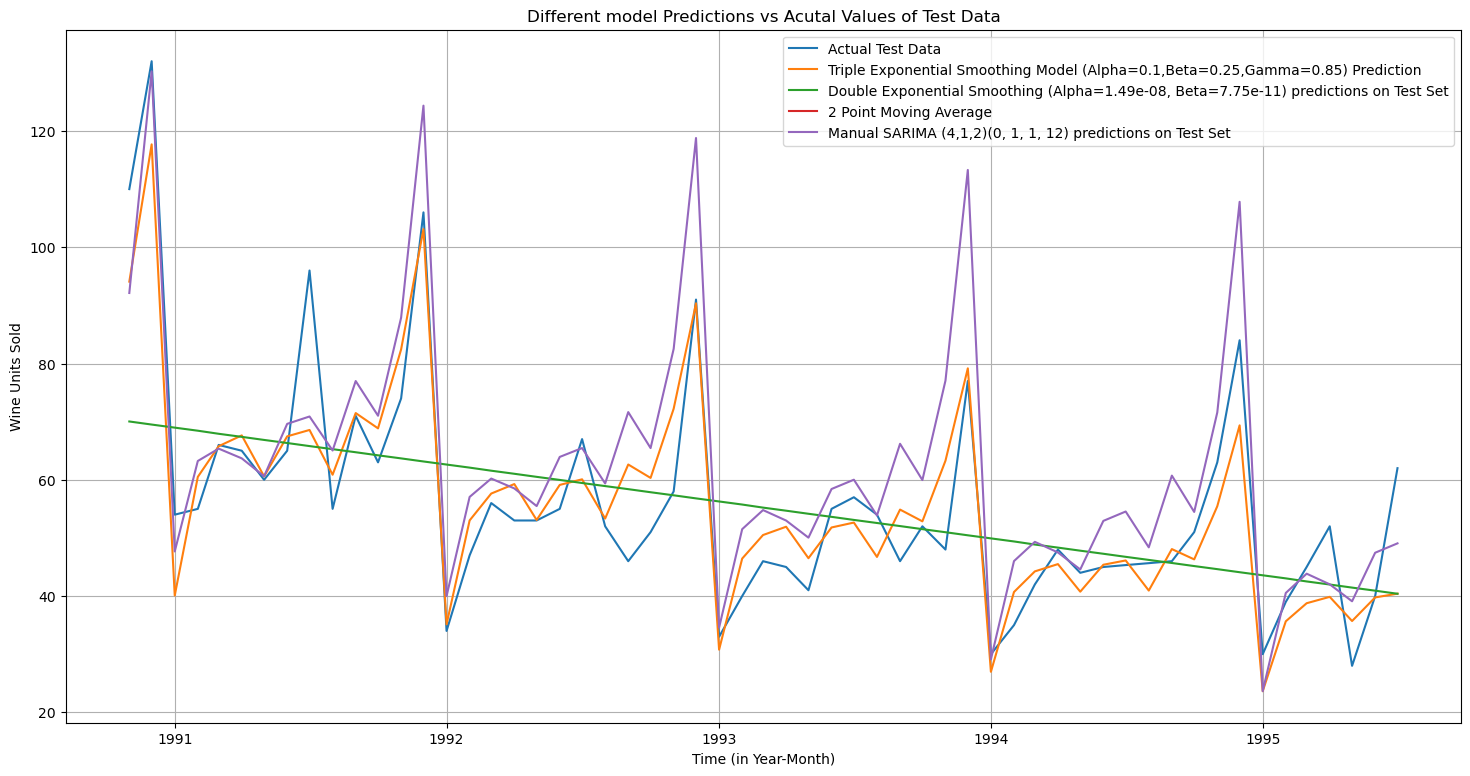

In [176]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Triple Exponential Smoothing Model (Alpha=0.1,Beta=0.25,Gamma=0.85) Prediction')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=1.49e-08, Beta=7.75e-11) predictions on Test Set')

plt.plot(MovingAverage['Trailing_2'][-1:len(test)], label='2 Point Moving Average')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

## Optimum Model - Triple Exponential Smoothing Model (Alpha=0.1, Beta=0.25, Gamma=0.85)

Text(0, 0.5, 'Wine Units Sold')

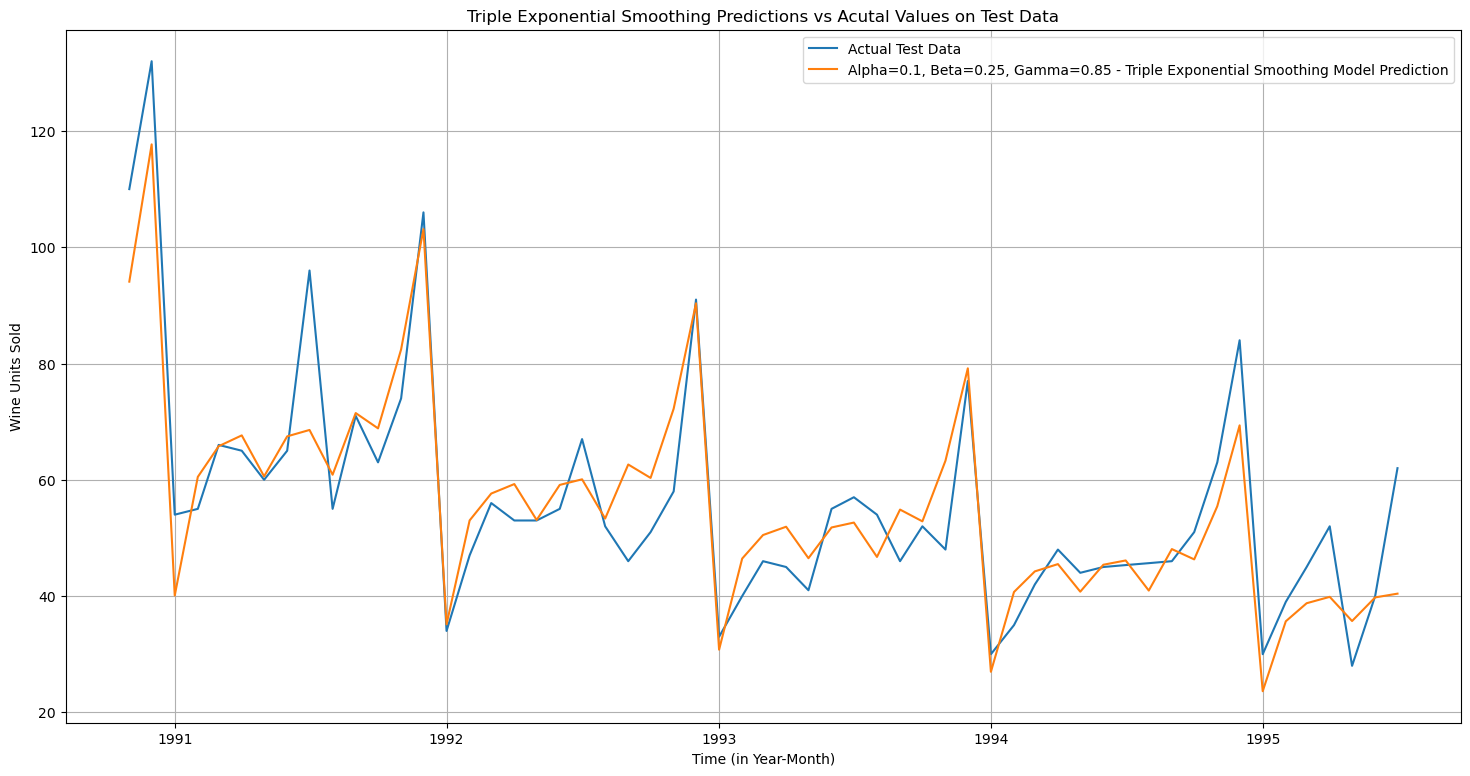

In [177]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Alpha=0.1, Beta=0.25, Gamma=0.85 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

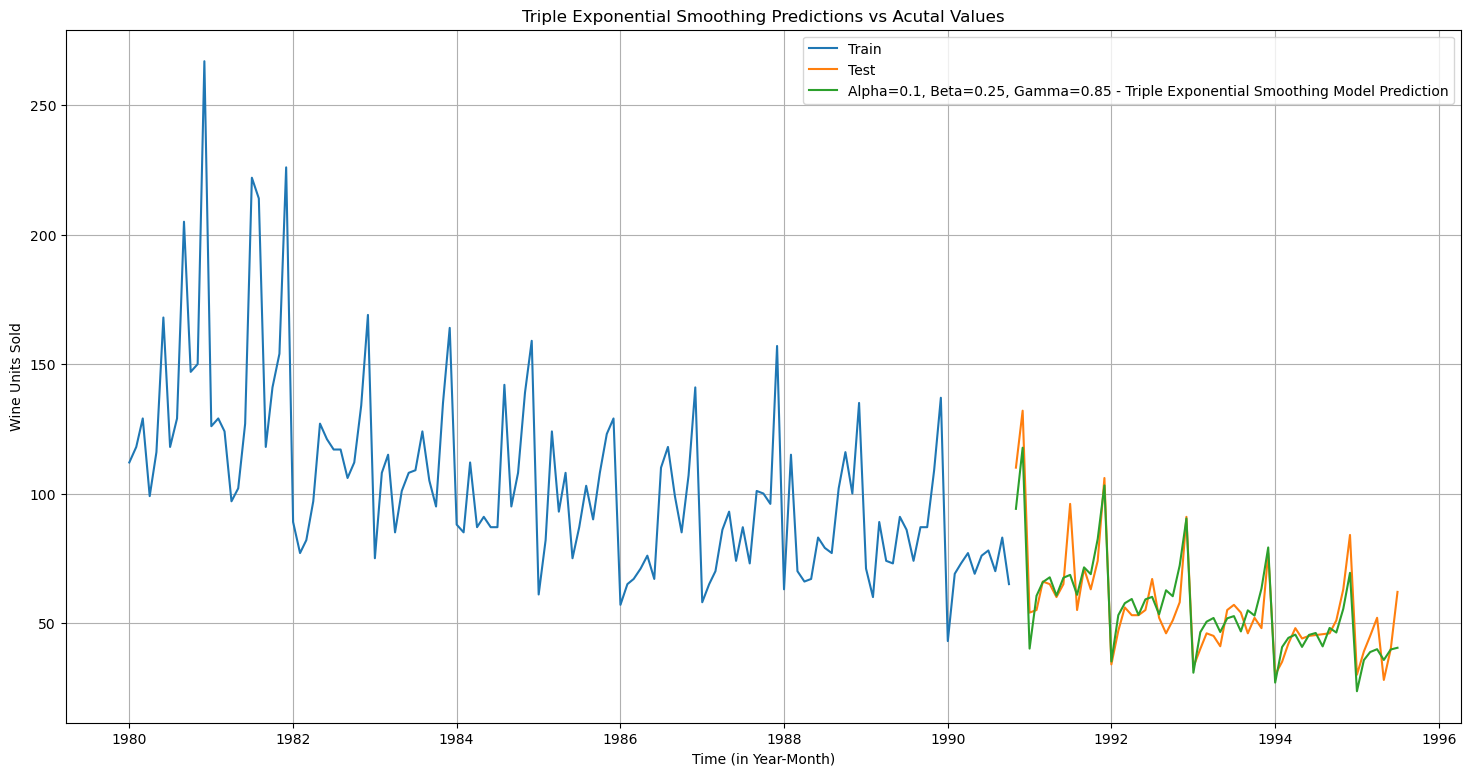

In [178]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.1,0.25,0.85], label='Alpha=0.1, Beta=0.25, Gamma=0.85 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [179]:
TES_Fullmodel = ExponentialSmoothing(df['Rose'],trend='multiplicative',seasonal='multiplicative').fit(smoothing_level=0.1, smoothing_trend=0.25, smoothing_seasonal=0.85)

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [180]:
TES_Fullmodel.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.25,
 'smoothing_seasonal': 0.85,
 'damping_trend': nan,
 'initial_level': 119.84713920473634,
 'initial_trend': 1.016752864031574,
 'initial_seasons': array([0.92219138, 0.9516417 , 1.01315449, 0.78394663, 0.88597376,
        1.25033189, 1.01275037, 0.93305274, 1.34205013, 1.05386524,
        1.08009836, 1.84079321]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [181]:
RMSE_fullmodel = metrics.mean_squared_error(df['Rose'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 22.551704135518612


In [182]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-01    50.323346
1995-09-01    50.523386
1995-10-01    56.262993
1995-11-01    67.393866
1995-12-01    88.828611
1996-01-01    31.758399
1996-02-01    40.656744
1996-03-01    46.677592
1996-04-01    53.425828
1996-05-01    31.457102
1996-06-01    43.888322
1996-07-01    52.290126
Freq: MS, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1800x900 with 0 Axes>

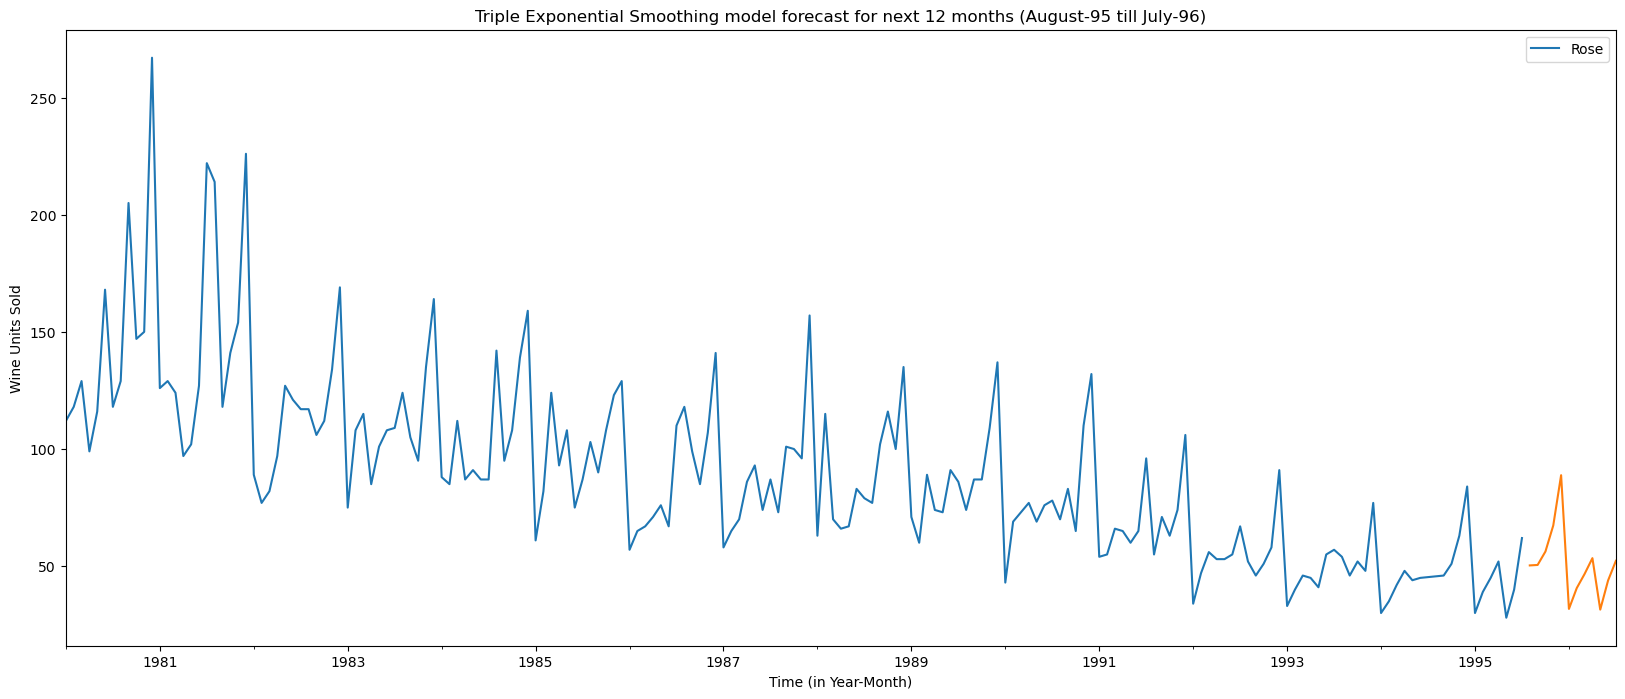

In [183]:
plt.figure(figsize=(18,9))
df.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [184]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(TES_Fullmodel.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(TES_Fullmodel.resid,ddof=1))})
predicted_df.head(12)

lower_ci  prediction    upper_ci
1995-08-01   6.351969   50.323346   94.294722
1995-09-01   6.552010   50.523386   94.494762
1995-10-01  12.291617   56.262993  100.234369
1995-11-01  23.422489   67.393866  111.365242
1995-12-01  44.857235   88.828611  132.799987
1996-01-01 -12.212977   31.758399   75.729775
1996-02-01  -3.314632   40.656744   84.628120
1996-03-01   2.706215   46.677592   90.648968
1996-04-01   9.454452   53.425828   97.397204
1996-05-01 -12.514274   31.457102   75.428478
1996-06-01  -0.083054   43.888322   87.859698
1996-07-01   8.318750   52.290126   96.261502

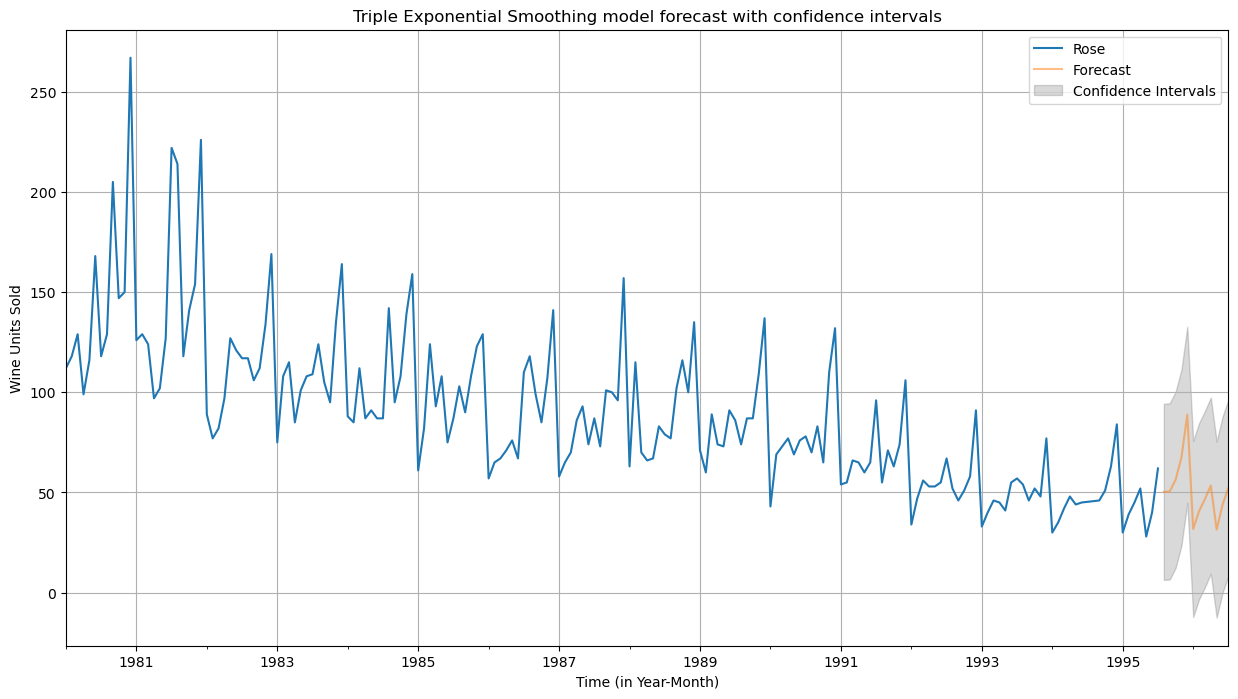

In [185]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing model forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

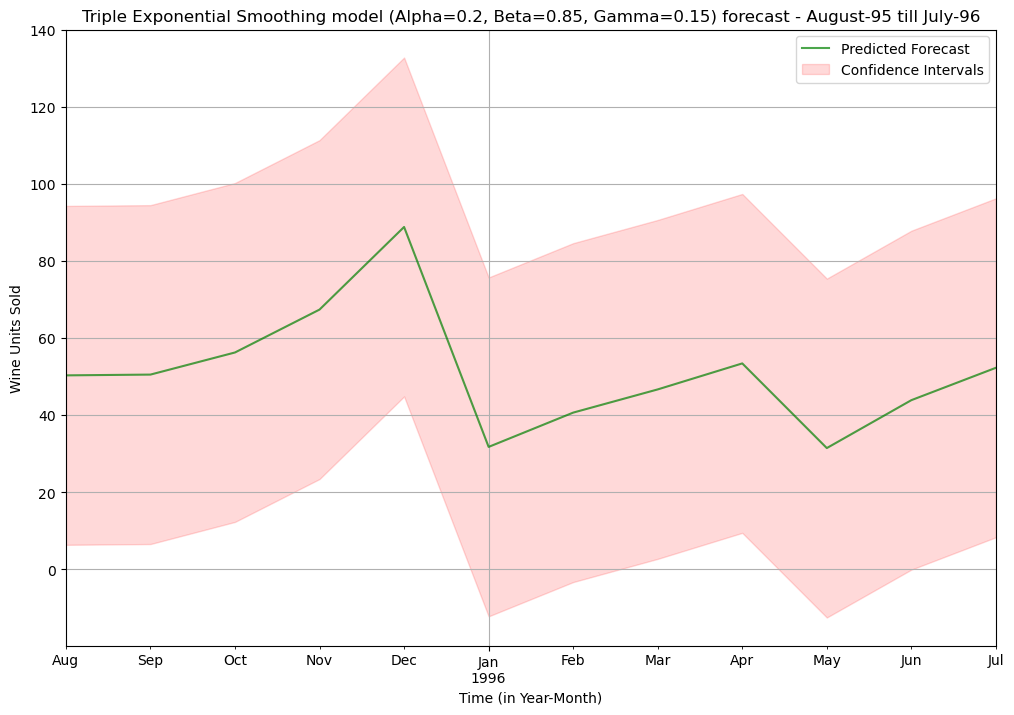

In [186]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.2, Beta=0.85, Gamma=0.15) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

## Optimum Model - Manual SARIMA Model (4, 1, 2)(0, 1, 1, 12) 

Text(0, 0.5, 'Wine Units Sold')

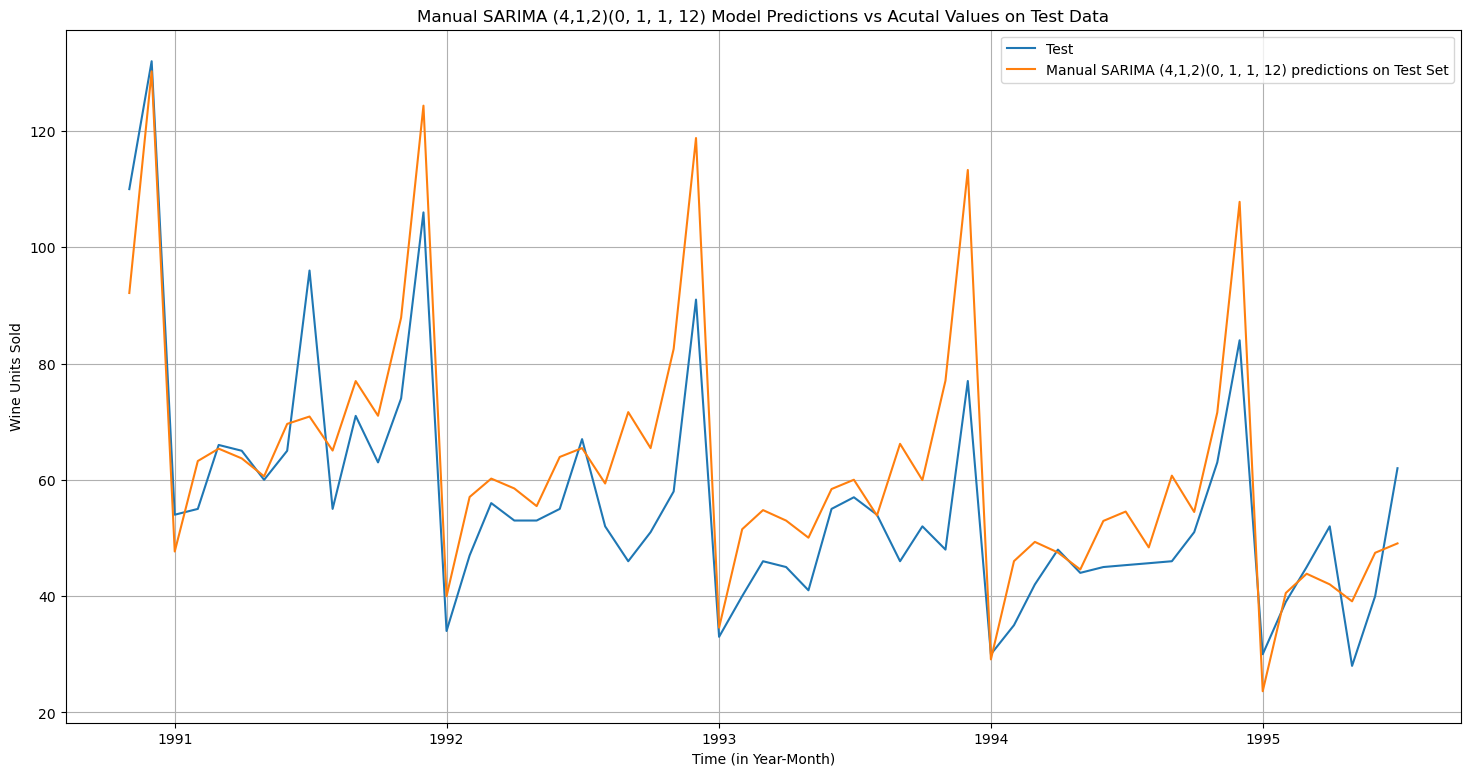

In [187]:
## Plotting on Test data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

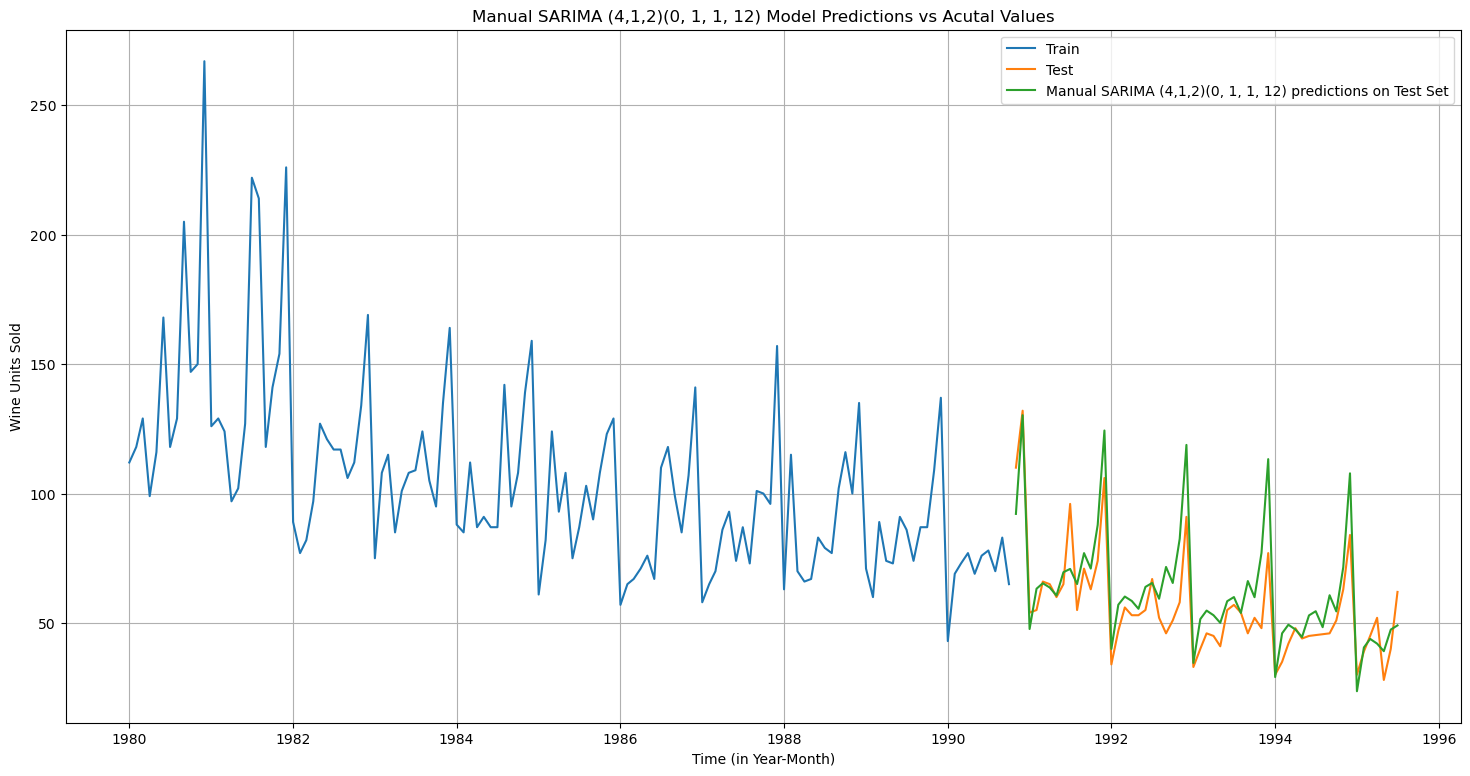

In [188]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [189]:
Manual_Sarima_FullModel = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order= (4, 1, 2), 
                                seasonal_order= (0, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_fullmodel_manual_sarima = Manual_Sarima_FullModel.fit(maxiter=1000)
print(results_fullmodel_manual_sarima.summary())

C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -658.936
Date:                              Sun, 17 Nov 2024   AIC                           1333.871
Time:                                      12:39:29   BIC                           1358.423
Sample:                                  01-01-1980   HQIC                          1343.841
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8240      0.083     -9.941      0.000      -0.986      -0.662
ar.L2          0.04

In [190]:
predicted_manual_sarima_full_data = results_fullmodel_manual_sarima.get_forecast(steps=12)
predicted_manual_sarima_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  48.269778  15.053216      18.766018      77.773539
1995-09-01  44.985412  15.830585      13.958036      76.012787
1995-10-01  45.474816  15.888941      14.333064      76.616568
1995-11-01  54.808063  15.898941      23.646712      85.969414
1995-12-01  81.906511  15.913690      50.716251     113.096772

In [191]:
predicted_manual_sarima_df = predicted_manual_sarima_full_data.summary_frame(alpha=0.05)
predicted_manual_sarima_df

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  48.269778  15.053216      18.766018      77.773539
1995-09-01  44.985412  15.830585      13.958036      76.012787
1995-10-01  45.474816  15.888941      14.333064      76.616568
1995-11-01  54.808063  15.898941      23.646712      85.969414
1995-12-01  81.906511  15.913690      50.716251     113.096772
1996-01-01  25.672601  16.199695      -6.078218      57.423420
1996-02-01  33.896224  16.307891       1.933345      65.859103
1996-03-01  40.048792  16.589891       7.533203      72.564382
1996-04-01  44.384553  16.657923      11.735624      77.033482
1996-05-01  31.339899  16.872301      -1.729204      64.409003
1996-06-01  39.916744  16.946426       6.702360      73.131129
1996-07-01  52.374070  17.156444      18.748056      86.000083

In [192]:
rmse_manual_sarima_full = metrics.mean_squared_error(df['Rose'],results_fullmodel_manual_sarima.fittedvalues,squared=False)

rmse_manual_sarima_full

32.21828184508663

In [193]:
# Getting the predictions for the 12 months into the future
prediction_manual_sarima_full = results_fullmodel_manual_sarima.forecast(steps=12)
prediction_manual_sarima_full.tail(12)

1995-08-01    48.269778
1995-09-01    44.985412
1995-10-01    45.474816
1995-11-01    54.808063
1995-12-01    81.906511
1996-01-01    25.672601
1996-02-01    33.896224
1996-03-01    40.048792
1996-04-01    44.384553
1996-05-01    31.339899
1996-06-01    39.916744
1996-07-01    52.374070
Freq: MS, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1800x900 with 0 Axes>

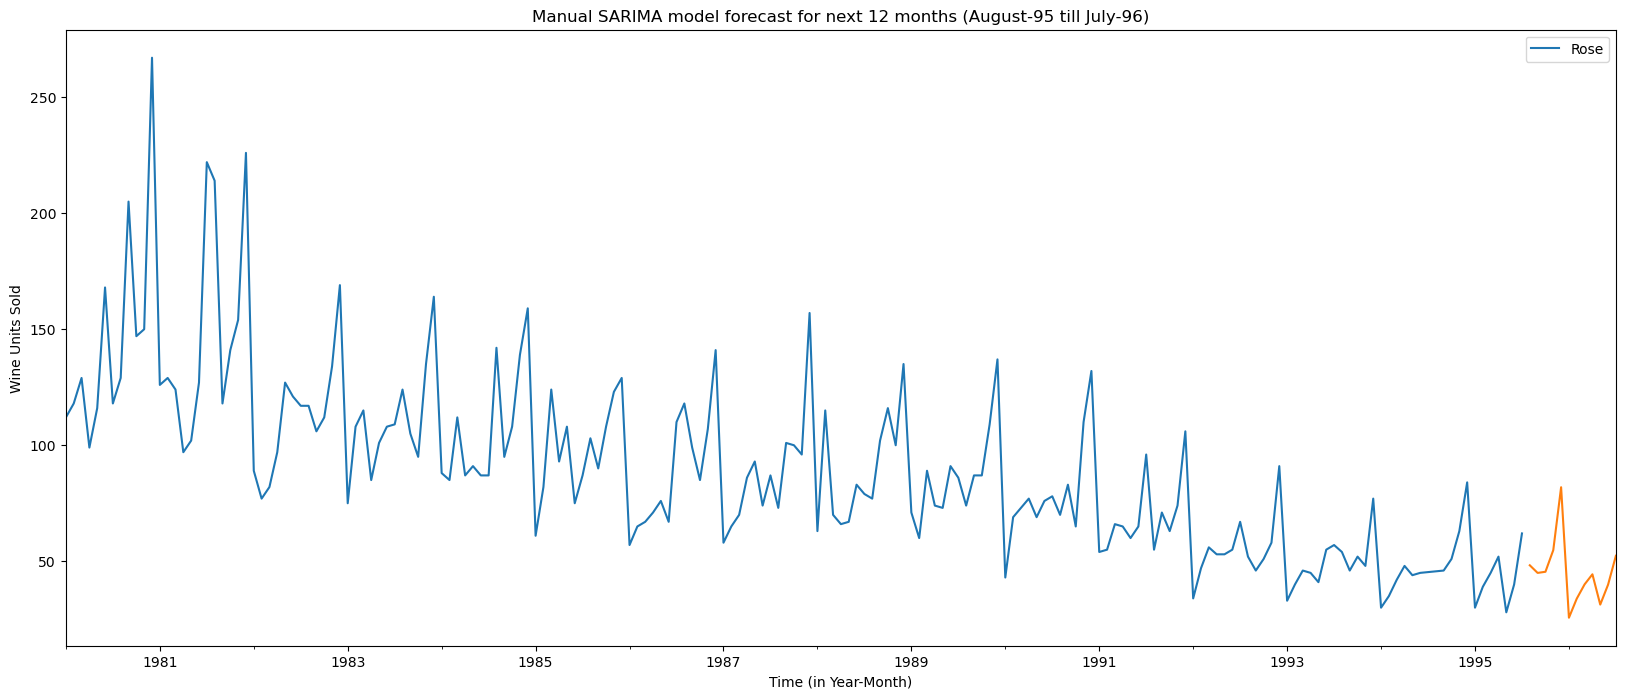

In [194]:
plt.figure(figsize=(18,9))
df.plot()
prediction_manual_sarima_full.plot();
plt.title('Manual SARIMA model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

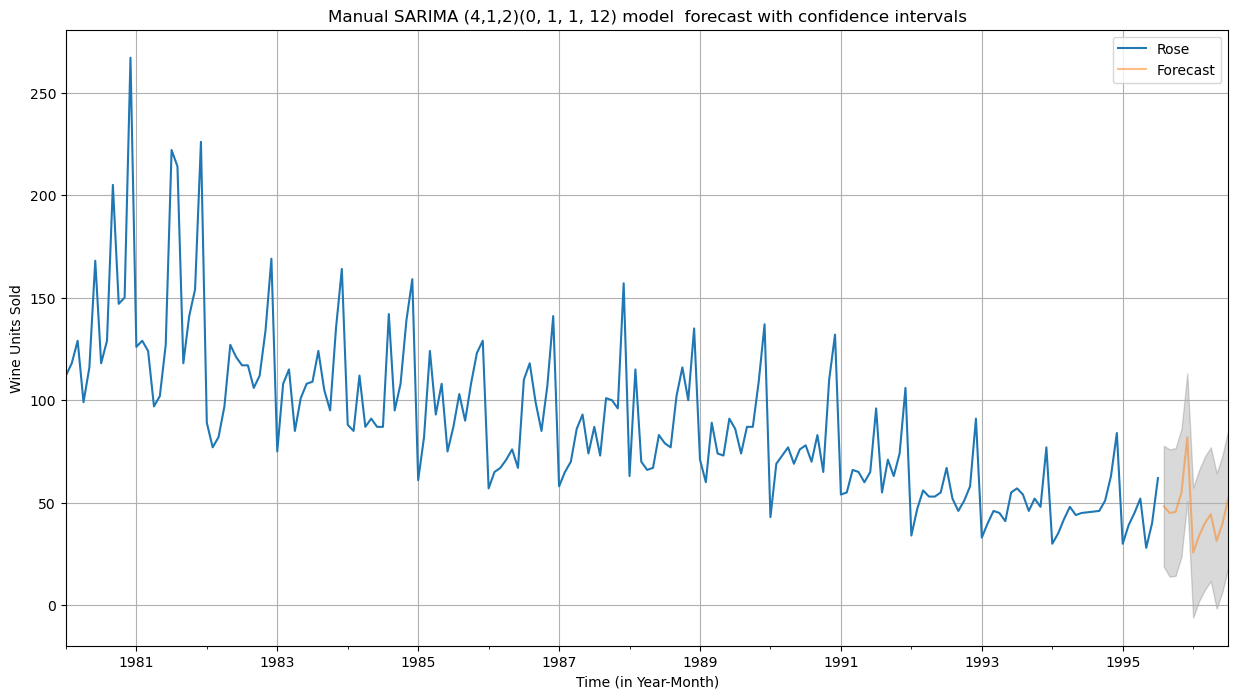

In [195]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_manual_sarima_df['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='k', alpha=.15)
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model  forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

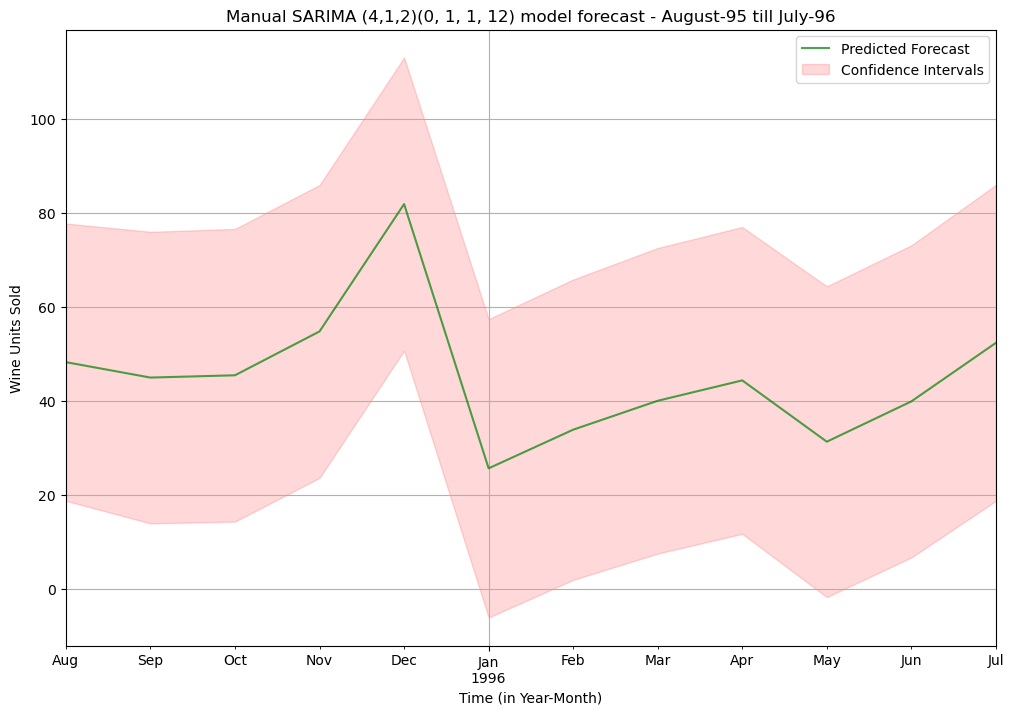

In [196]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = predicted_manual_sarima_df['mean'].plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()